In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.4.2
Numpy version: 1.21.5
Seaborn version: 0.11.2
Matplotlib version: 3.5.1
Statsmodels version: 0.13.2


In [4]:
df_spar = pd.read_csv("Sparkling.csv")
df_rose = pd.read_csv("Rose.csv")

In [5]:
df_spar.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [6]:
df_spar.duplicated().sum()

0

In [7]:
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [8]:
df_rose.duplicated().sum()

0

In [9]:
df_spar = pd.read_csv("Sparkling.csv",parse_dates=['YearMonth'],index_col = 'YearMonth')
df_rose = pd.read_csv("Rose.csv",parse_dates=['YearMonth'],index_col = 'YearMonth')

In [10]:
df_spar.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [11]:
df_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [12]:
df_rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [13]:
df_spar.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

There is total of 187 records from 1980 to 1995 of wine types Rose and sparkling

In [14]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [15]:
df_spar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [16]:
df_rose.duplicated().sum()

90

In [17]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [18]:
print(df_rose[df_rose['Rose'].isnull()])

            Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN


In [19]:
df_spar.isnull().sum()

Sparkling    0
dtype: int64

Observation :
We see there are 2 missing values in the Rose wine type for july and august 1994.
There is no missing values in the Sparkling data.

## Imputing missing values in Rose wine data

In [20]:
df_rose['Rose']=df_rose['Rose'].ffill()

In [21]:
df_rose.isnull().sum()

Rose    0
dtype: int64

In [22]:
df_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [23]:
df_rose.describe()

Rose
count  187.000000
mean    89.909091
std     39.244440
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

Minimum number of sales of Rose wine type is 28 while the maximum sales count is 267.Average count of sales of Rose wine is nearly 90.

In [24]:
df_rose[df_rose['Rose']==267]

Rose
YearMonth        
1980-12-01  267.0

In [25]:
df_rose[df_rose['Rose']==28]

Rose
YearMonth       
1995-05-01  28.0

We see maximum sales of Rose wine type happened in Dec 1980 while minimum sales happened in May-1995.

In [26]:
df_spar.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

Minimum number of sales of Sparkling wine type is 1070 while the maximum sales count is 7242.Average count of sales of Rose wine is nearly 2402.

In [27]:
df_spar[df_spar['Sparkling']==1070]

Sparkling
YearMonth            
1995-01-01       1070

In [28]:
df_spar[df_spar['Sparkling']==7242]

Sparkling
YearMonth            
1987-12-01       7242

We see maximum sales of Sparkling wine type happened in Dec 1987 while minimum sales happened in Jan-1995.

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

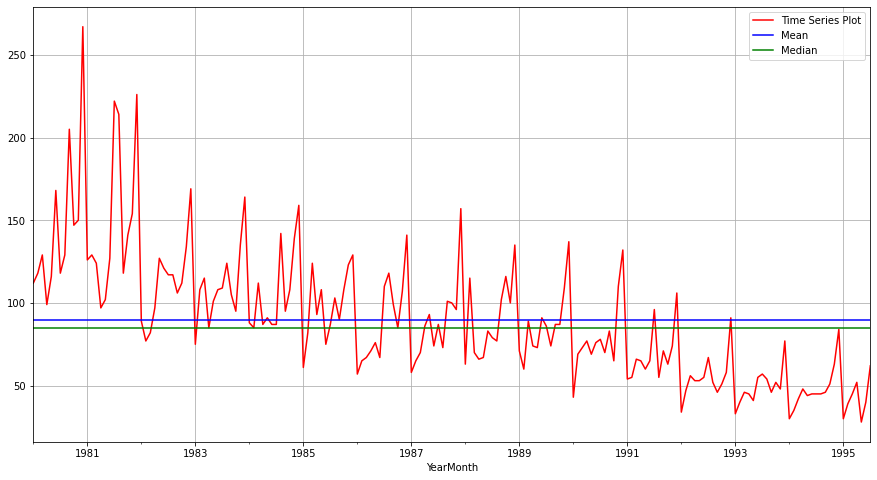

In [30]:
df_rose.plot(color='Red')
plt.axhline(df_rose['Rose'].mean(),color='Blue')
plt.axhline(df_rose['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);


Observation:
There is a slight downward trend with seasonality associated. Average sales and most of the sales are almost same .i.e Mean and median are almost near to each other.

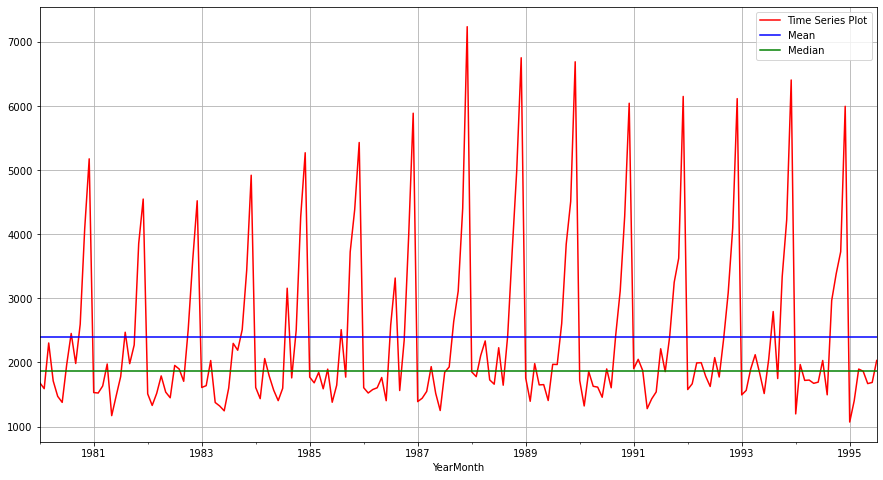

In [31]:
df_spar.plot(color='Red')
plt.axhline(df_spar['Sparkling'].mean(),color='Blue')
plt.axhline(df_spar['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);


Observation:
There is a some upward and downward trend with some seasonality associated. Most of the sales count is around 1990.

## Yearly boxplot

E:\Anaconda-GL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


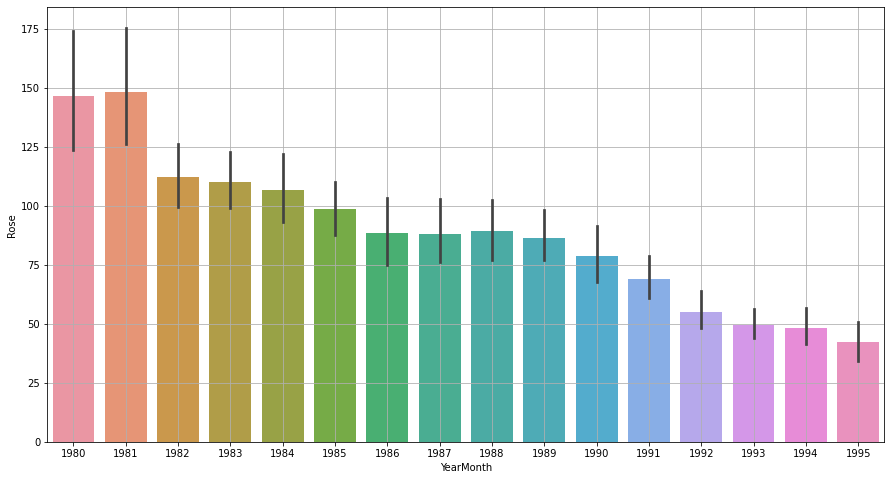

In [32]:
sns.barplot(df_rose.index.year,df_rose.Rose,data=df_rose)
plt.grid();

Observation:
1. Downward trend in the sales count of the Rose winetype.
2. Max sales count is in the year 1981 while the least is in the year 1995

    

E:\Anaconda-GL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


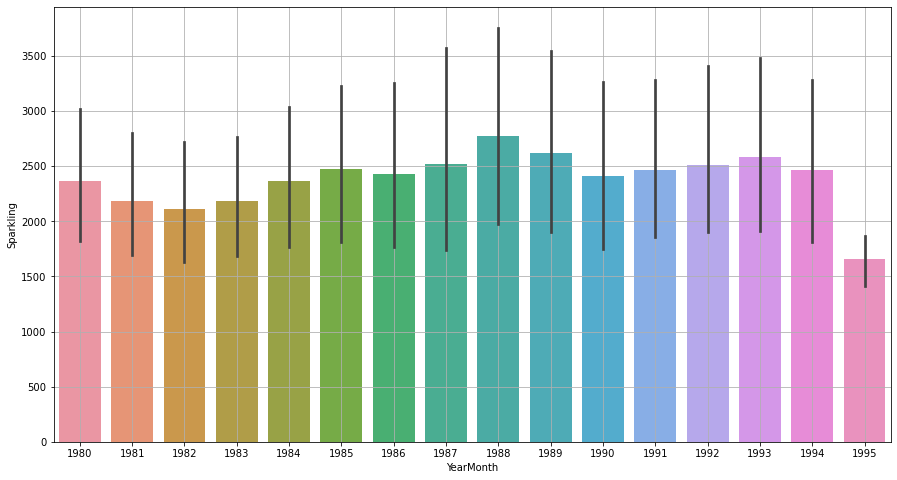

In [33]:
sns.barplot(df_spar.index.year,df_spar.Sparkling,data=df_spar)
plt.grid();

Observation:
1. Polynomial trend in the sales count of the Sparkling winetype.
2. Max sales count is in the year 1988 while the least is in the year 1995


## Monthly Boxplot

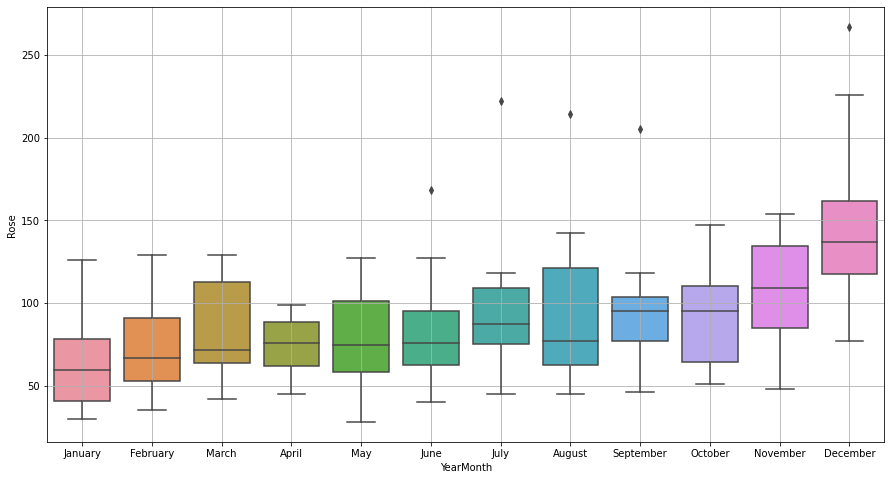

In [34]:
sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'])
plt.grid();

Observation:
    1) We can observe there are some outliers in the month pf June,July,August,September and December in Rose wine type.
    2) Highest sales happened in the month of December while the least in January across various years.

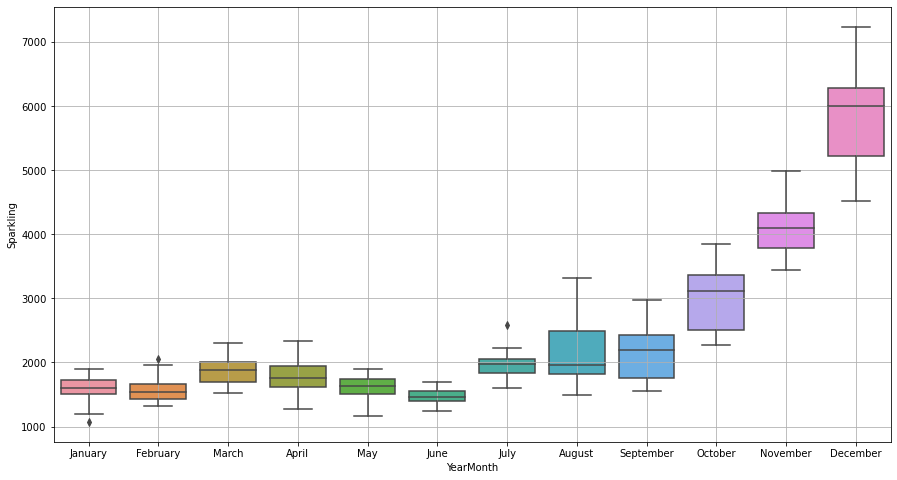

In [35]:
sns.boxplot(x = df_spar.index.month_name(),y = df_spar['Sparkling'])
plt.grid();

Onservation:
    1) We can observe there are some outliers in the month pf January,February and July in Sparkling wine type.
    2) Highest sales happened in the month of December while the least in June across various years.

## Plot a time series monthplot to understand sales of Rose and Sparkling wines across different years and within different months across years.

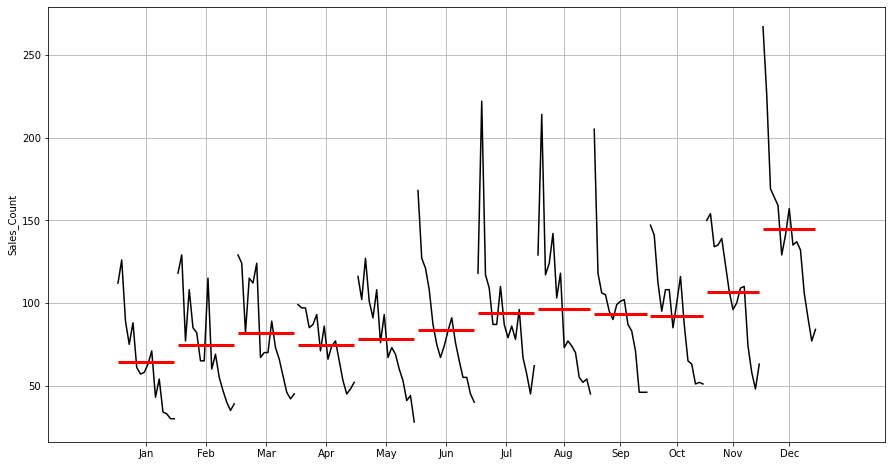

In [36]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_rose['Rose'],ylabel='Sales_Count')
plt.grid();

Observations:
This plot shows us the behaviour of the Time Series ('Rose sales' in this case) across various months. The red line is the median value.

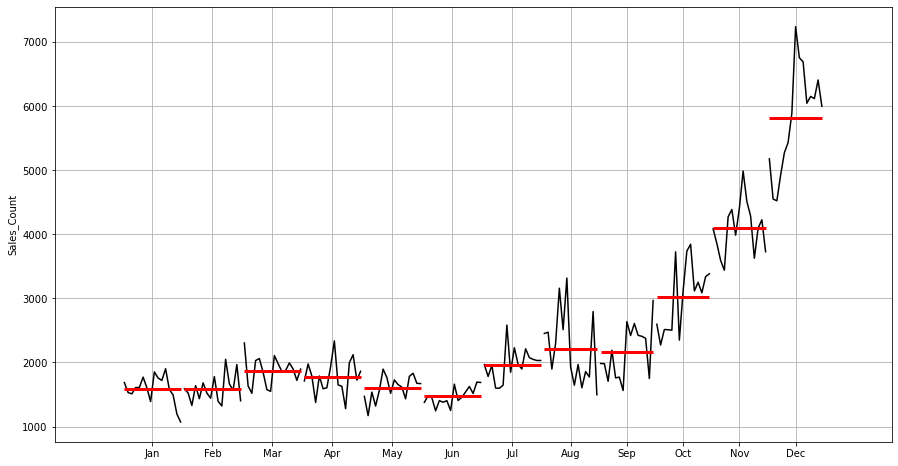

In [37]:
month_plot(df_spar['Sparkling'],ylabel='Sales_Count')
plt.grid();

## Quarterly plot

E:\Anaconda-GL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


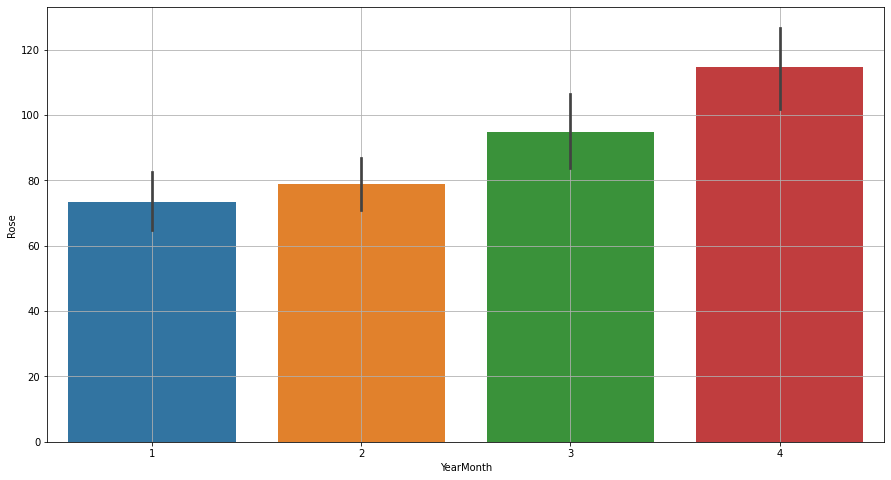

In [38]:
sns.barplot(df_rose.index.quarter,df_rose.Rose,data=df_rose)
plt.grid();

Observations:
Most of the sales is observed in the 4th quarter.
Less number of sales is observed in the 1st quarter.

E:\Anaconda-GL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


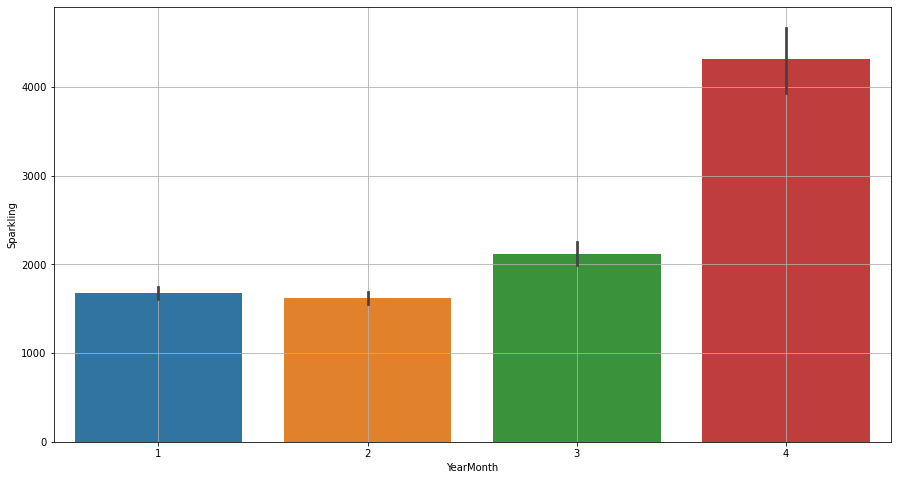

In [39]:
sns.barplot(df_spar.index.quarter,df_spar.Sparkling,data=df_spar)
plt.grid();

Observations:
Most of the sales is observed in the 4th quarter.
Less number of sales is observed in the 2nd quarter.

## Monthly sales graph across years

In [40]:
Monthly_Rose_across_years = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month_name(), index = df_rose.index.year)
Monthly_Rose_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981        97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982        97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983        85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984        87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985        93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986        71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987        86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988        66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989        74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990        77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991        65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992        53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993        45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994        48.0    45.0      84.0      35.0     30.0   45.0   45.0   42.0   
1995        52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980       116.0     150.0    147.0      205.0  
1981       102.0     154.0    141.0      118.0  
1982       127.0     134.0    112.0      106.0  
1983       101.0     135.0     95.0      105.0  
1984        91.0     139.0    108.0       95.0  
1985       108.0     123.0    108.0       90.0  
1986        76.0     107.0     85.0       99.0  
1987        93.0      96.0    100.0      101.0  
1988        67.0     100.0    116.0      102.0  
1989        73.0     109.0     87.0       87.0  
1990        69.0     110.0     65.0       83.0  
1991        60.0      74.0     63.0       71.0  
1992        53.0      58.0     51.0       46.0  
1993        41.0      48.0     52.0       46.0  
1994        44.0      63.0     51.0       46.0  
1995        28.0       NaN      NaN        NaN

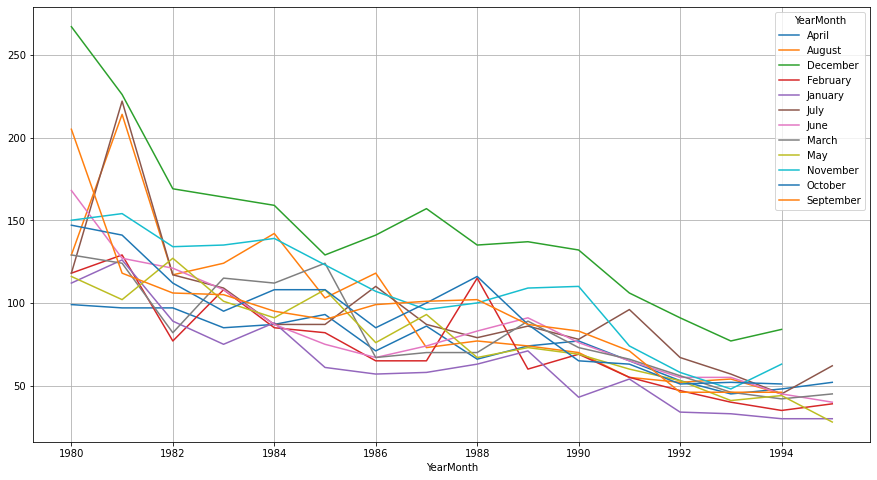

In [41]:
Monthly_Rose_across_years.plot()
plt.grid()

Observations:
    Least June month
    Maximum December month

In [42]:
Monthly_Spar_across_years = pd.pivot_table(df_spar, values = 'Sparkling', columns = df_spar.index.month_name(), index = df_spar.index.year)
Monthly_Spar_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

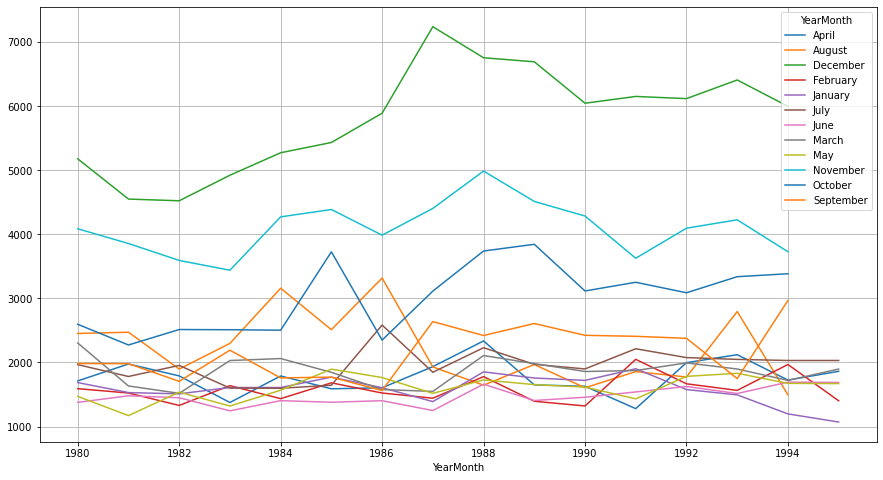

In [43]:
Monthly_Spar_across_years.plot()
plt.grid()

Observations: Least sales are observed in these months -May,Feb,June and November 
    Maximum sales in December month

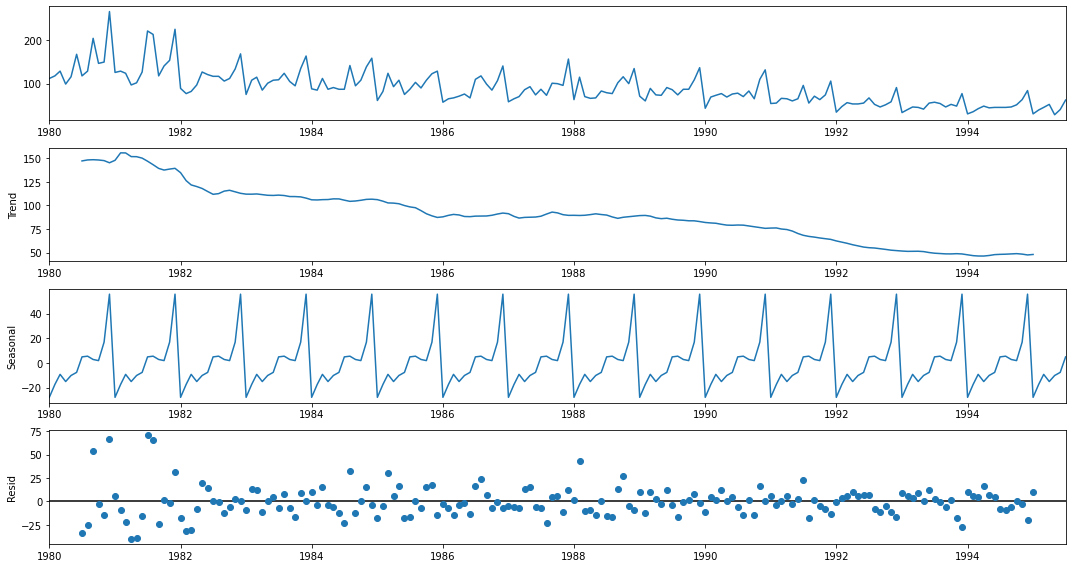

In [44]:
decomposition = seasonal_decompose(df_rose,model='additive')
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.903092
1980-02-01   -17.431663
1980-03-01    -9.279878
1980-04-01   -15.092378
1980-05-01   -10.190592
1980-06-01    -7.672735
1980-07-01     4.880241
1980-08-01     5.460797
1980-09-01     2.780241
1980-10-01     1.877464
1980-11-01    16.852464
1980-12-01    55.719130
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.963575
1980-08-01   -24.585797
1980-09-01    53.844759
1980-10-01    -2.960797
1980-11-01   -14.269130
1980-12-01    66.15587

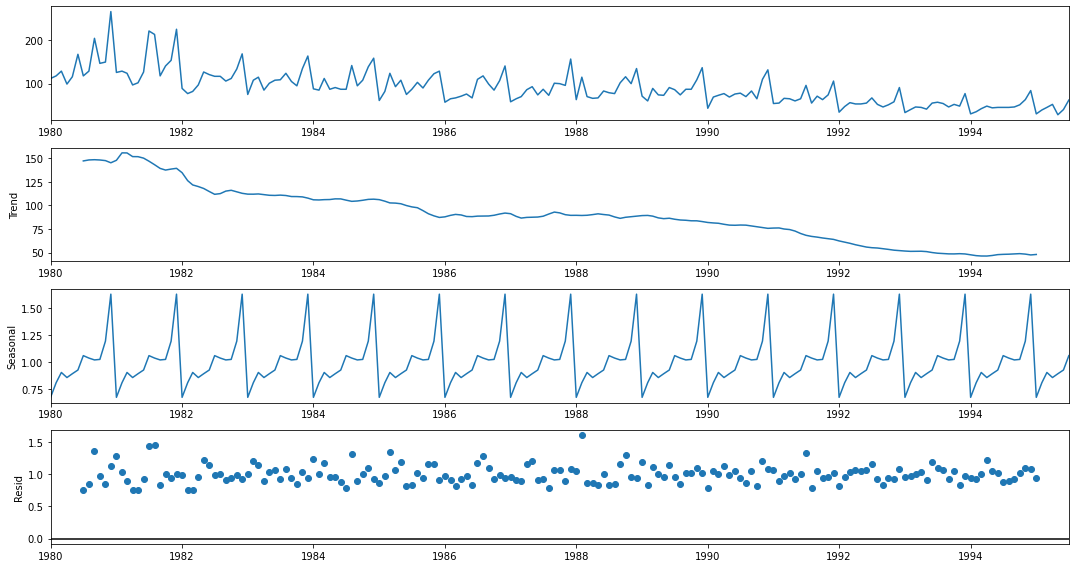

In [46]:
decomposition = seasonal_decompose(df_rose,model='multiplicative')
decomposition.plot();

Observations:
    We see there is downward trend with seasonality and residuals are around 1 in multiplicative series.

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670182
1980-02-01    0.806224
1980-03-01    0.901278
1980-04-01    0.854154
1980-05-01    0.889531
1980-06-01    0.924099
1980-07-01    1.057682
1980-08-01    1.035066
1980-09-01    1.017753
1980-10-01    1.022688
1980-11-01    1.192494
1980-12-01    1.628848
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758514
1980-08-01    0.841382
1980-09-01    1.357534
1980-10-01    0.970661
1980-11-01    0.853274
1980-12-01    1.129506
Name: resid, dtype: fl

Observations:
    We see there is declining trend with seasonality and residuals are around 0 in additive model.

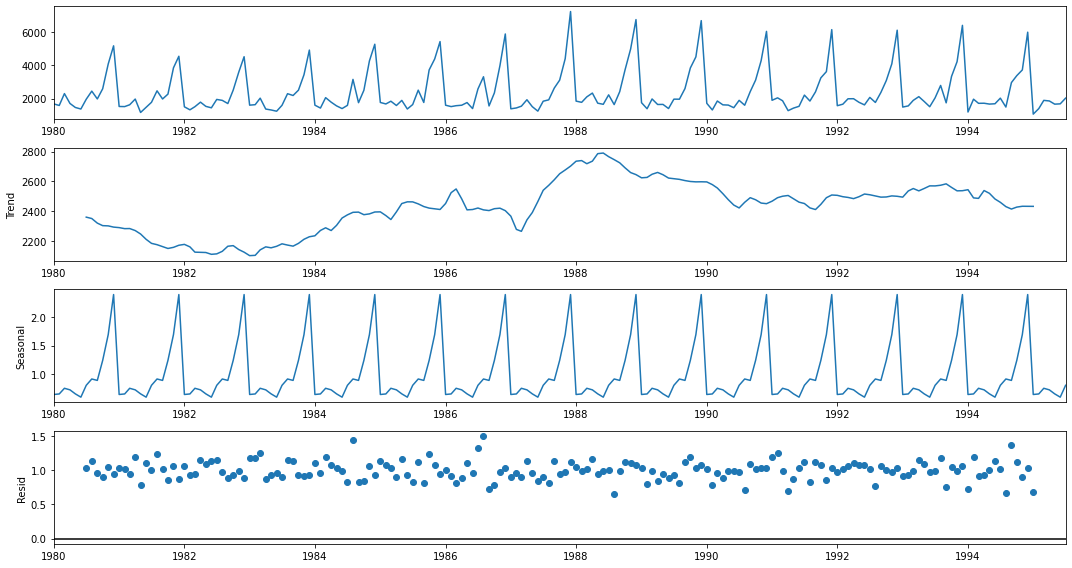

In [48]:
decomposition = seasonal_decompose(df_spar,model='multiplicative')
decomposition.plot();

Observations:
    We see there is no particular trend i.e upward or downward with seasonality and residuals are around 1 in multiplicative series.

In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

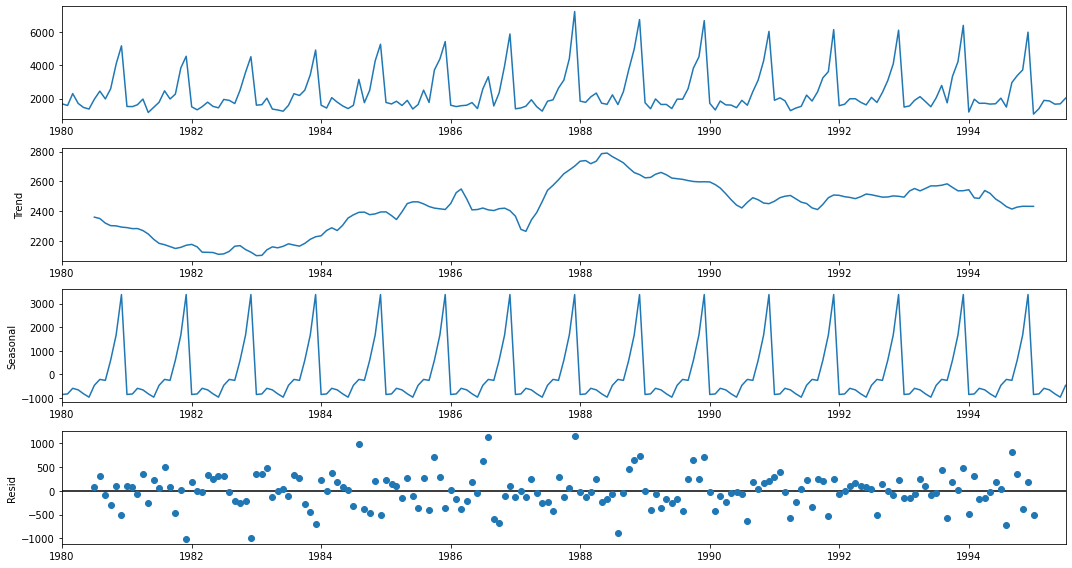

In [50]:
decomposition = seasonal_decompose(df_spar,model='additive')
decomposition.plot();

Observations:
    We see there is no particular trend i.e upward or downward with seasonality and residuals are around 0 in additive series.

In [51]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


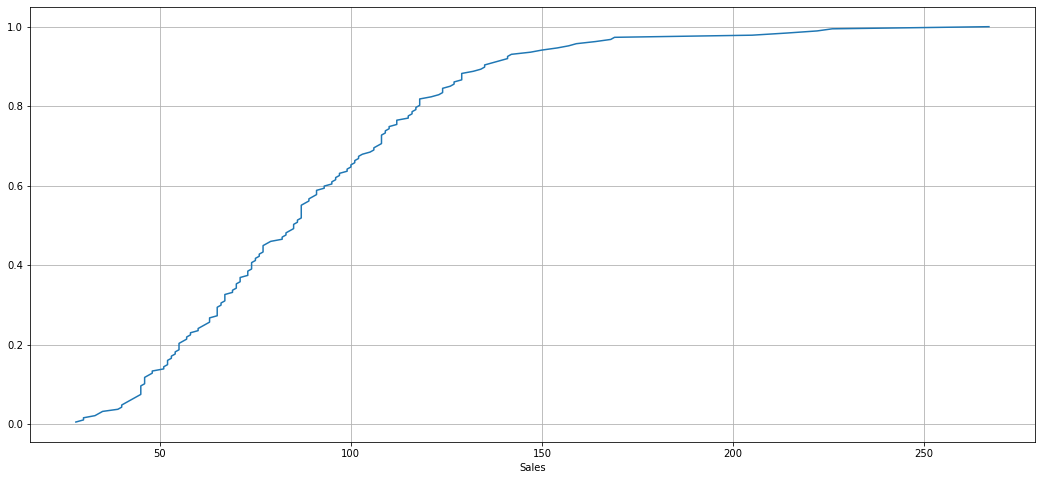

In [52]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

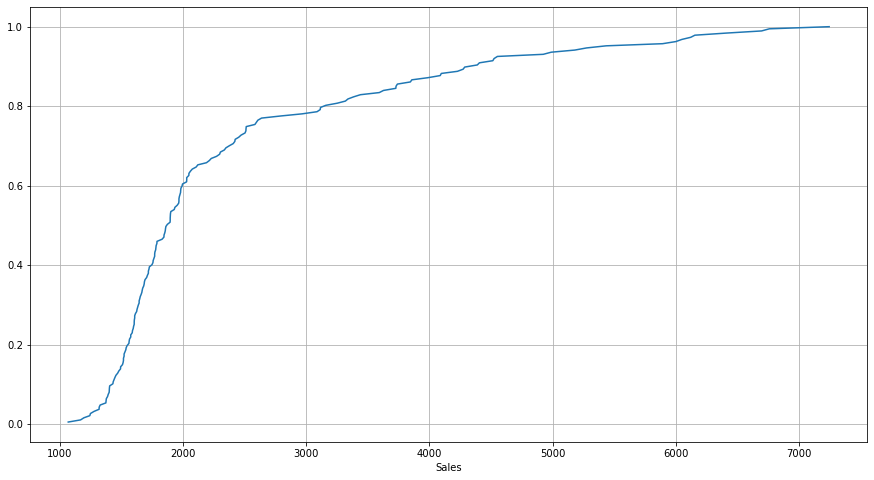

In [53]:
cdf = ECDF(df_spar['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [54]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

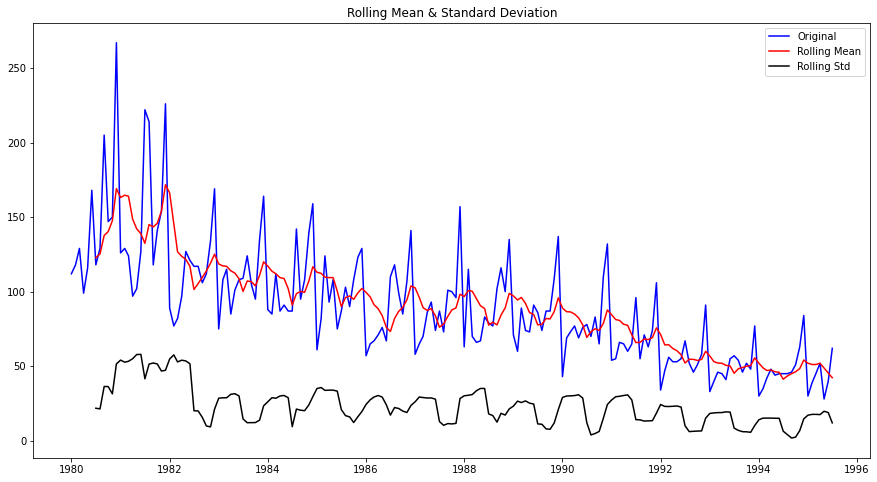

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [55]:
test_stationarity(df_rose['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

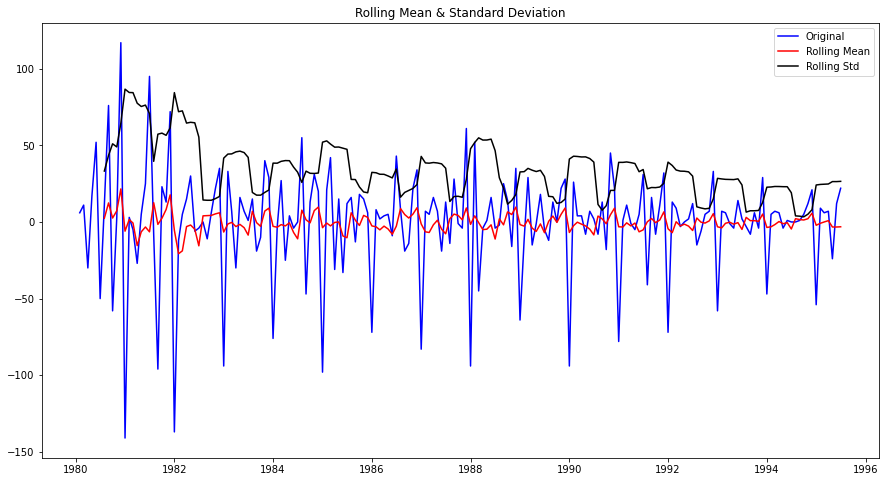

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [56]:
test_stationarity(df_rose['Rose'].diff().dropna())

when alpha =0.05,p value is less than 0.05 hence timeseries is stationary


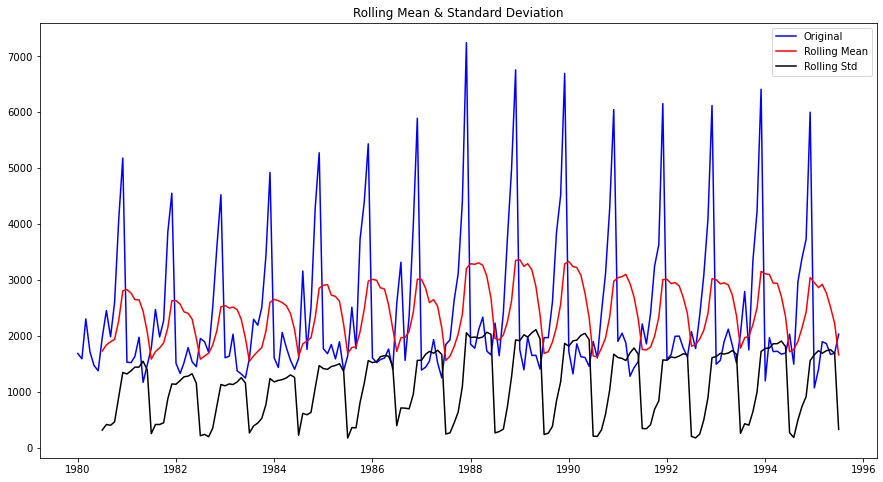

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [57]:
test_stationarity(df_spar['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.
Taking the difference of order 1 and verifying if data is stationary or not.

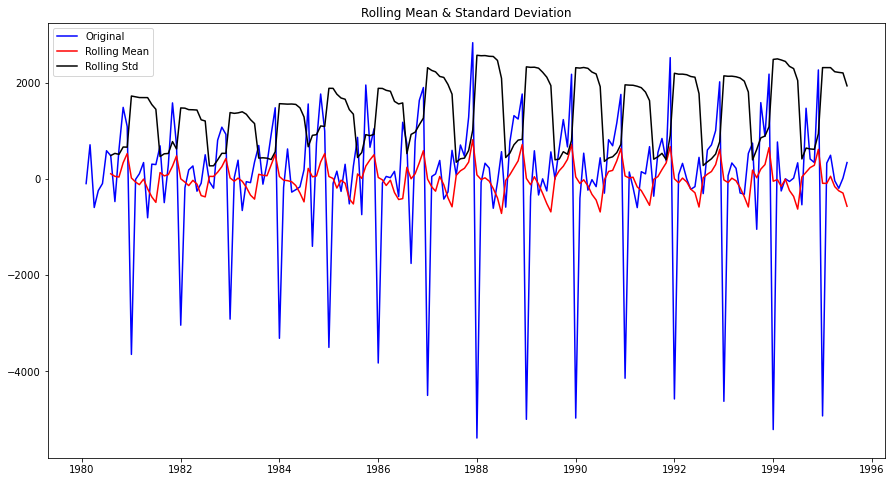

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [58]:
test_stationarity(df_spar['Sparkling'].diff().dropna())

when alpha =0.05,p value is less than 0.05 hence timeseries is stationary


## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

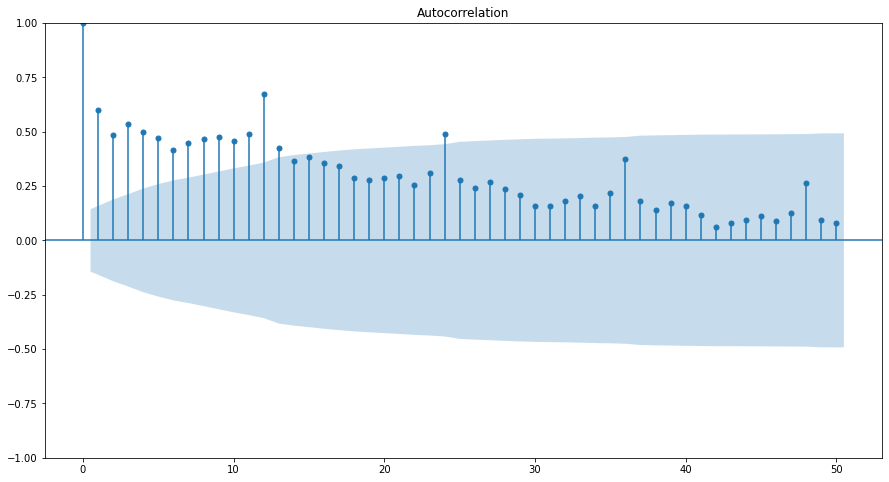

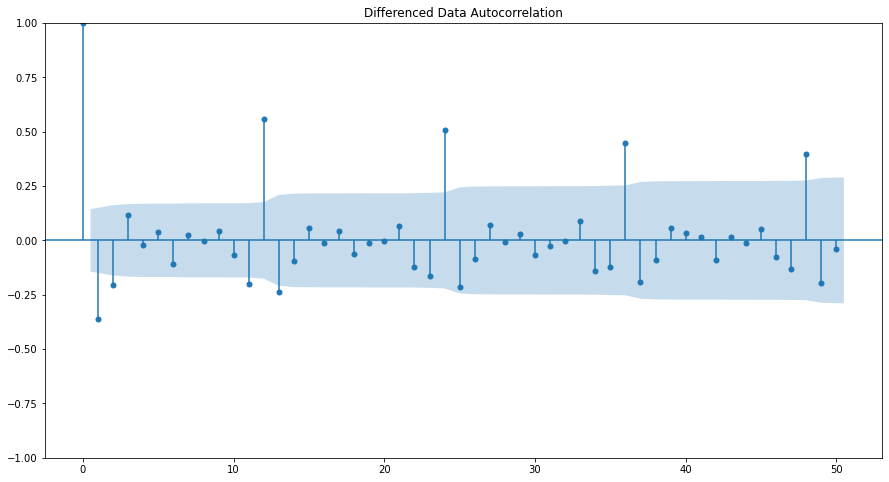

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


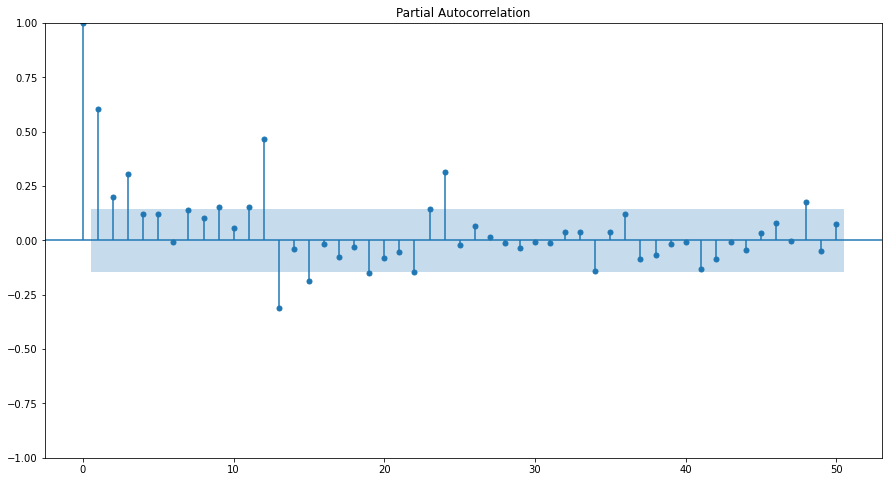

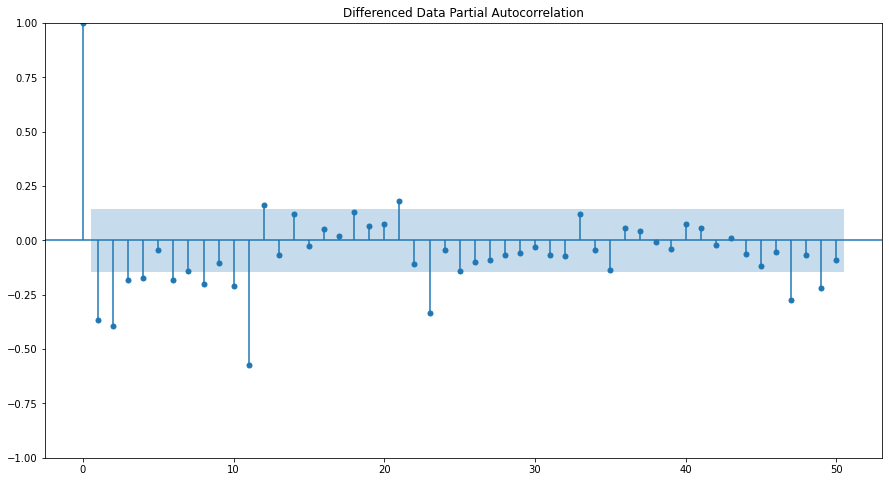

In [60]:
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From above plots we can see there is some seasonality in the data.

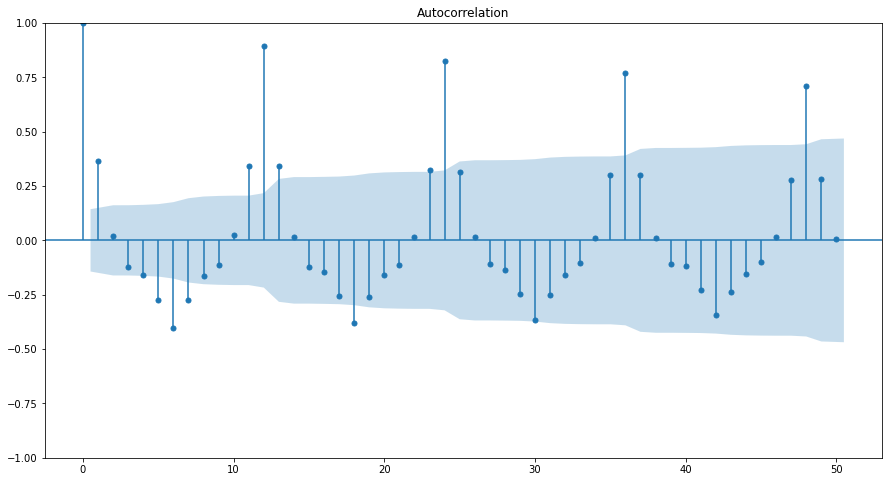

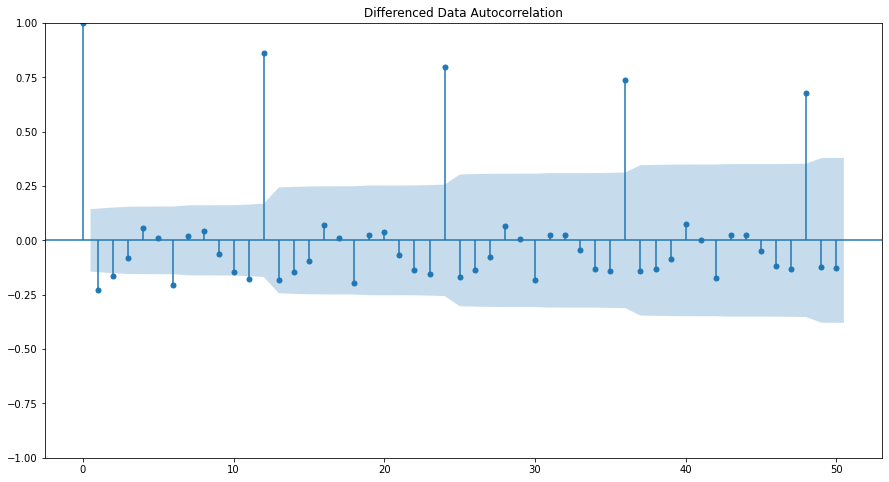

In [61]:
plot_acf(df_spar['Sparkling'],lags=50)
plot_acf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


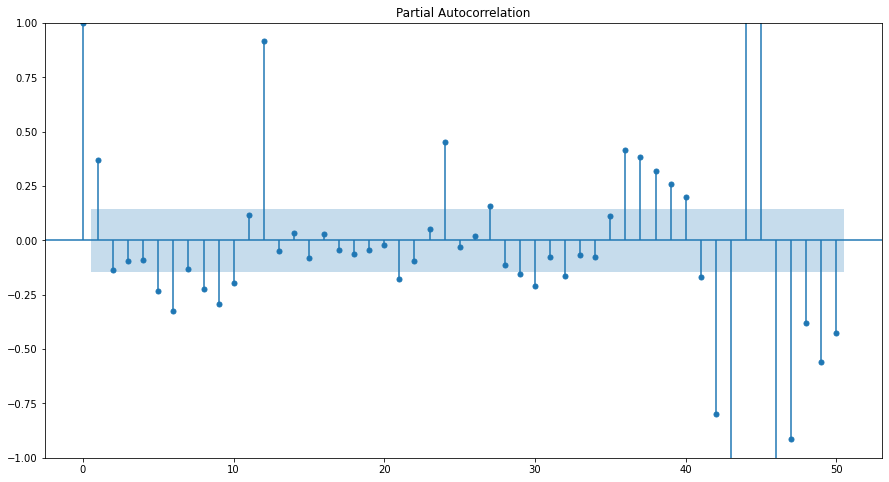

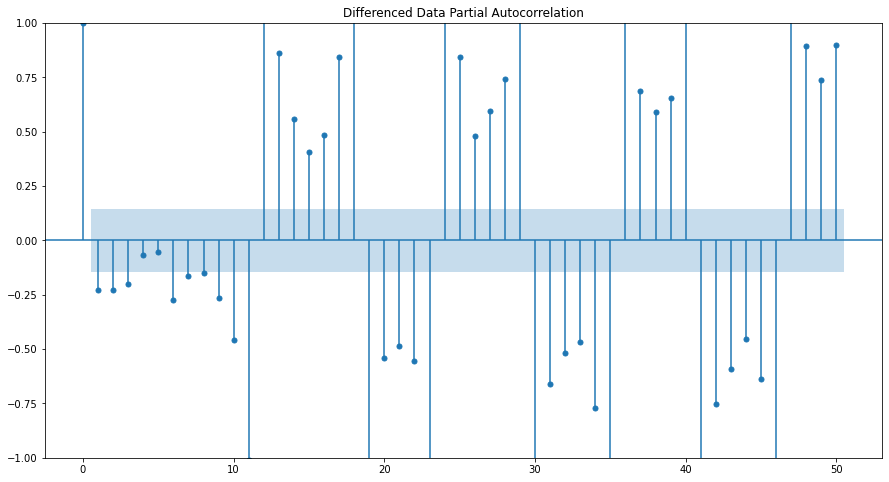

In [62]:
plot_pacf(df_spar['Sparkling'],lags=50)
plot_pacf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

There is some seasonality in the data

## Split the data into train and test and plot the training and test data.

 Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [63]:
train_rose=df_rose[df_rose.index.year < 1991]
test_rose=df_rose[df_rose.index.year >= 1991]
train_spar = df_spar[df_spar.index.year < 1991]
test_spar = df_spar[df_spar.index.year >= 1991]

In [64]:
from IPython.display import display
print("Rose wine:")
print('First few rows of Training Data')
display(train_rose.head())
print('Last few rows of Training Data')
display(train_rose.tail())
print('First few rows of Test Data')
display(test_rose.head())
print('Last few rows of Test Data')
display(test_rose.tail())
print("\nSparkling wine:")
print('First few rows of Training Data')
display(train_spar.head())
print('Last few rows of Training Data')
display(train_spar.tail())
print('First few rows of Test Data')
display(test_spar.head())
print('Last few rows of Test Data')
display(test_spar.tail())

Rose wine:
First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


Sparkling wine:
First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [65]:
print("train_rose.shape:",train_rose.shape)
print("test_rose.shape:",test_rose.shape)
print("train_spar.shape:",train_spar.shape)
print("test_spar.shape:",test_spar.shape)

train_rose.shape: (132, 1)
test_rose.shape: (55, 1)
train_spar.shape: (132, 1)
test_spar.shape: (55, 1)


Checking for stationarity of training datasets

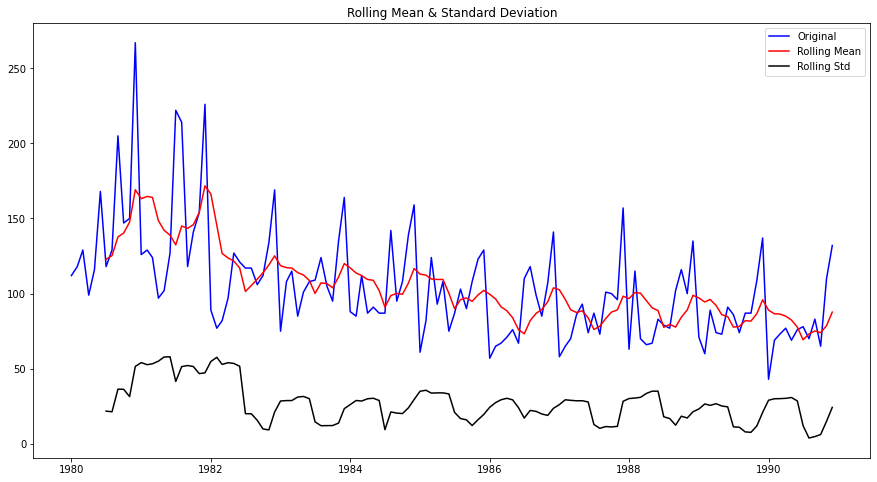

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [66]:
test_stationarity(train_rose['Rose'])

Training dataset of Rose wine is not stationary

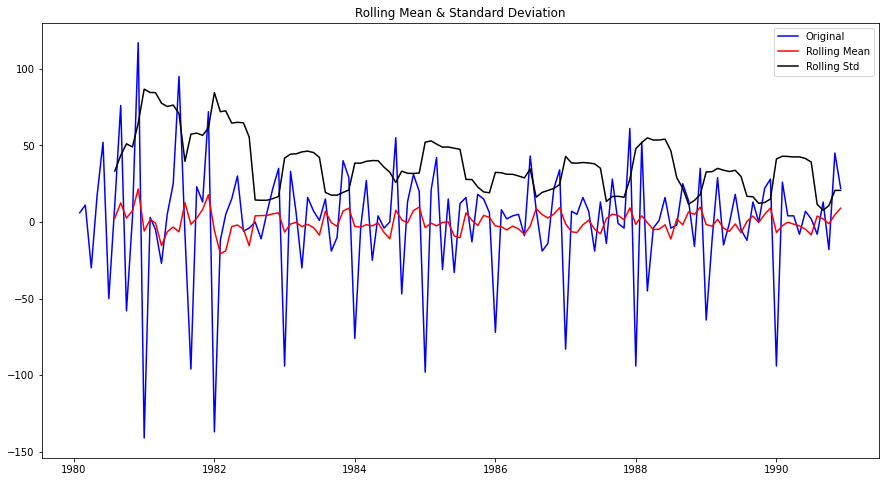

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [67]:
test_stationarity(train_rose['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

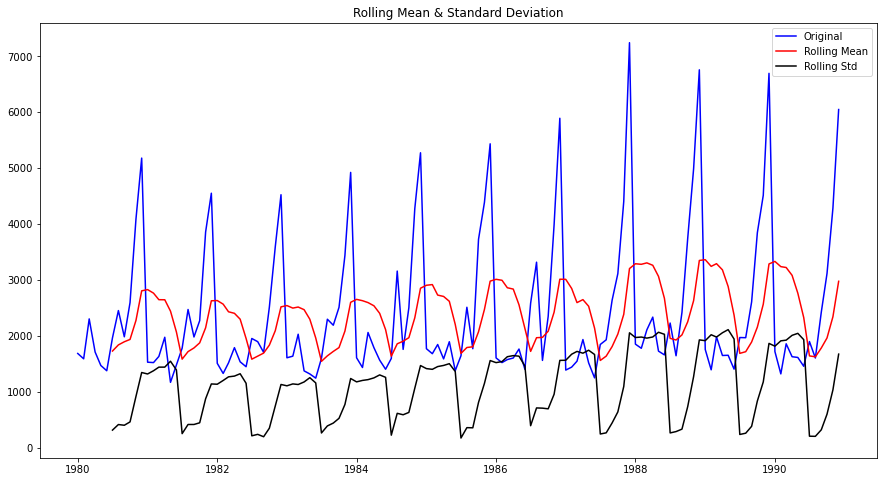

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [68]:
test_stationarity(train_spar['Sparkling'])

Training dataset of Sparkling wine is not stationary

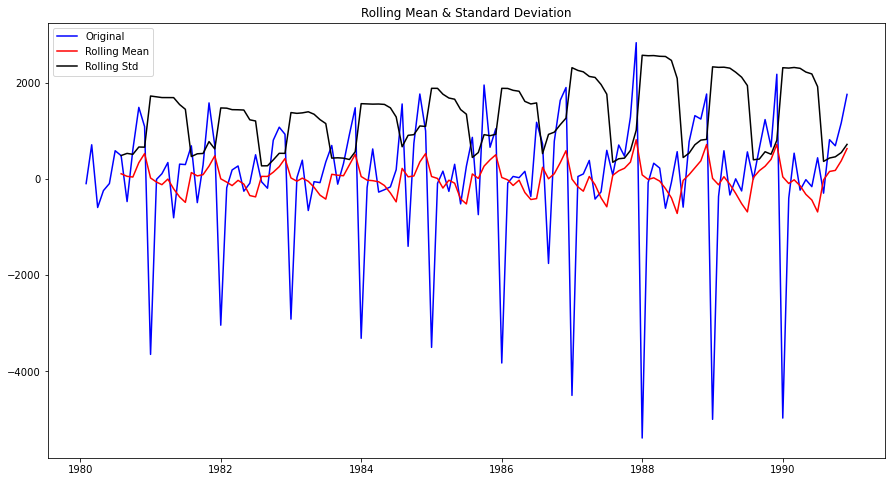

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [69]:
test_stationarity(train_spar['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

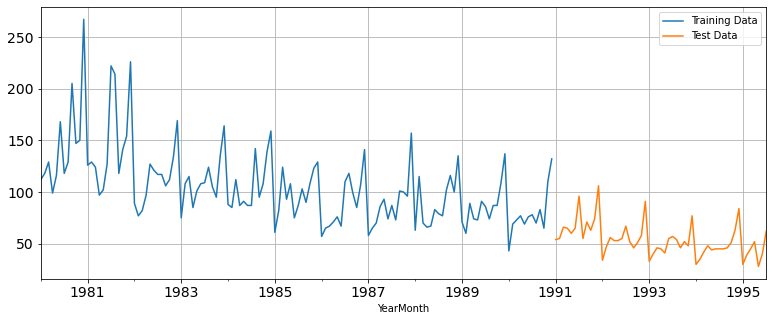

In [70]:
train_rose['Rose'].plot(figsize=(13,5), fontsize=14)
test_rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

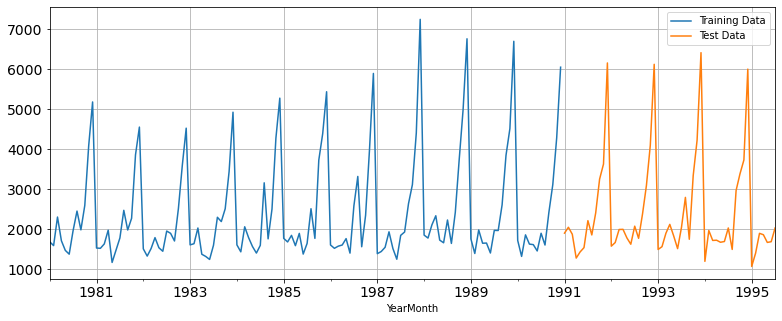

In [71]:
train_spar['Sparkling'].plot(figsize=(13,5), fontsize=14)
test_spar['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

Linear Regression:

In [72]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+43 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [73]:
LR_train_R = train_rose.copy()
LR_test_R = test_rose.copy()
LR_train_S = train_spar.copy()
LR_test_S = test_spar.copy()
LR_train_R['time'] = train_time
LR_test_R['time'] = test_time
LR_train_S['time'] = train_time
LR_test_S['time'] = test_time

print("Data from Rose wine type")
print('First few rows of Training Data','\n',LR_train_R.head(),'\n')
print('Last few rows of Training Data','\n',LR_train_R.tail(),'\n')
print('First few rows of Test Data','\n',LR_test_R.head(),'\n')
print('Last few rows of Test Data','\n',LR_test_R.tail(),'\n')
print("\nData from Sparkilng wine type")
print('First few rows of Training Data','\n',LR_train_S.head(),'\n')
print('Last few rows of Training Data','\n',LR_train_S.tail(),'\n')
print('First few rows of Test Data','\n',LR_test_S.head(),'\n')
print('Last few rows of Test Data','\n',LR_test_S.tail(),'\n')

Data from Rose wine type
First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 


Data from Sparkilng wine type
First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-0

Train and test data for building LR model is ready

In [74]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

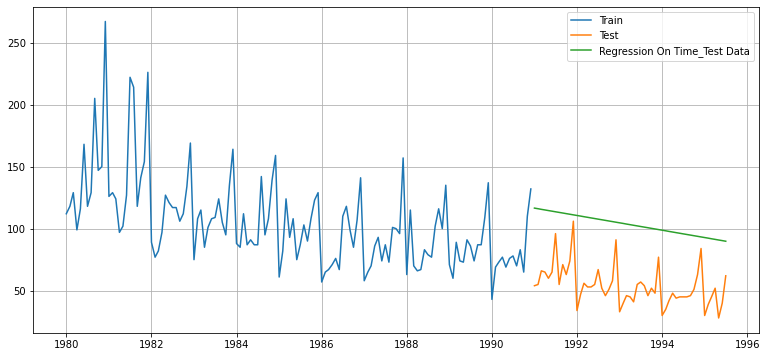

In [75]:
LR.fit(LR_train_R[['time']],LR_train_R['Rose'].values)
test_predictions_model1         = LR.predict(LR_test_R[['time']])
LR_test_R['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LR_test_R['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [76]:
from sklearn import metrics
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 51.451


Test RMSE-Rose
RegressionOnTime        51.45105

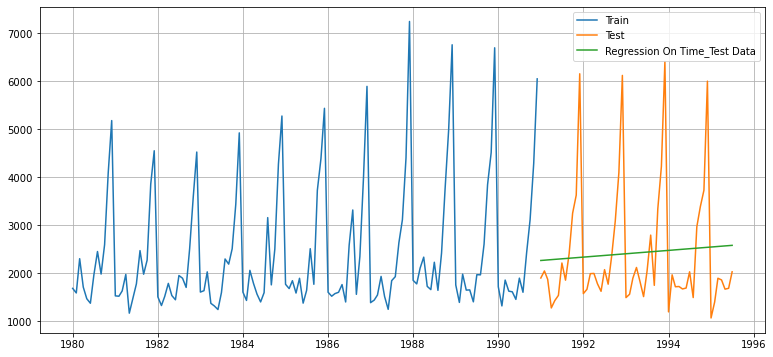

In [77]:
LR1 = LinearRegression()
LR1.fit(LR_train_S[['time']],LR_train_S['Sparkling'].values)
test_predictions_model2        = LR1.predict(LR_test_S[['time']])
LR_test_S['RegOnTime'] = test_predictions_model2

plt.figure(figsize=(13,6))
plt.plot( train_spar['Sparkling'], label='Train')
plt.plot(test_spar['Sparkling'], label='Test')
plt.plot(LR_test_S['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [78]:
rmse_model1_test1 = metrics.mean_squared_error(test_spar['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test1))
resultsDf1 = pd.DataFrame({'Test RMSE-Sparkling': [rmse_model1_test1]},index=['RegressionOnTime'])
resultsDf['Test RMSE-Sparkling'] = resultsDf1
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime        51.45105          1275.867052

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [79]:
NaiveModel_train_R = train_rose.copy()
NaiveModel_test_R = test_rose.copy()
NaiveModel_train_S = train_spar.copy()
NaiveModel_test_S = test_spar.copy()

In [80]:
NaiveModel_test_R['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_R['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

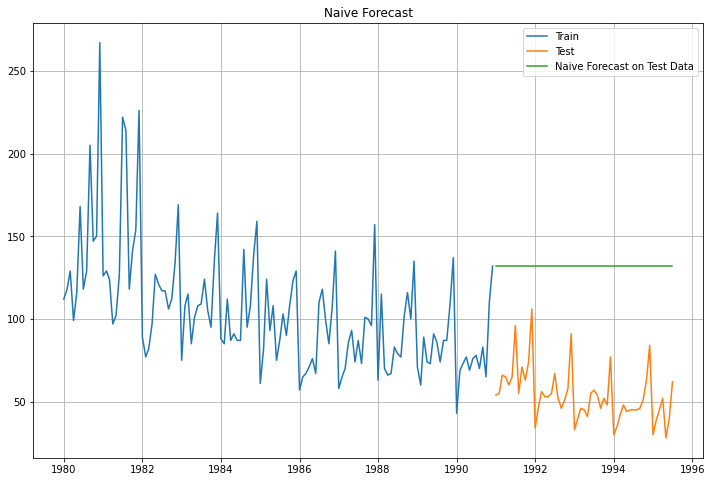

In [81]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_R['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test_R['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [82]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_R['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
resultsDf_2 = pd.DataFrame({'Test RMSE-Rose': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime        51.45105          1275.867052
NaiveModel              79.73855                  NaN

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64


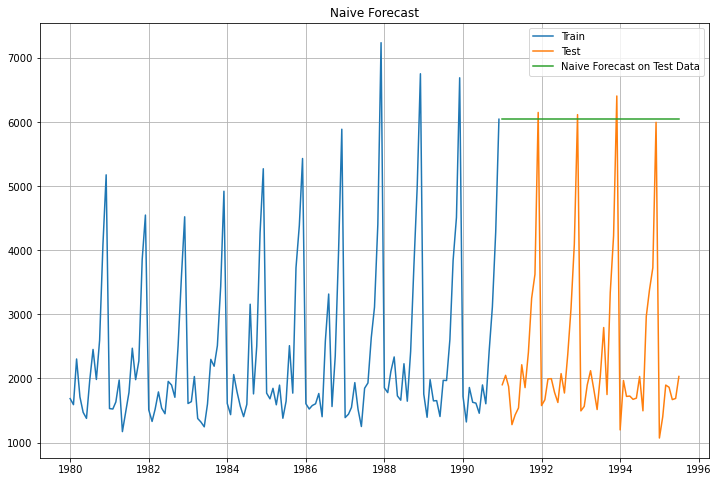

In [83]:
NaiveModel_test_S['naive'] = np.asarray(train_spar['Sparkling'])[len(np.asarray(train_spar['Sparkling']))-1]
print(NaiveModel_test_S['naive'].head())
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_S['Sparkling'], label='Train')
plt.plot(test_spar['Sparkling'], label='Test')
plt.plot(NaiveModel_test_S['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [84]:
## Test Data - RMSE

rmse_model2_test2 = metrics.mean_squared_error(test_spar['Sparkling'],NaiveModel_test_S['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test2))
resultsDf['Test RMSE-Sparkling']['NaiveModel'] = rmse_model2_test2
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime        51.45105          1275.867052
NaiveModel              79.73855          3864.279352

Method 3: Simple Average

In [85]:
SimpleAverage_train_R = train_rose.copy()
SimpleAverage_test_R = test_rose.copy()
SimpleAverage_train_S = train_spar.copy()
SimpleAverage_test_S = test_spar.copy()

In [86]:
SimpleAverage_test_R['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test_S['mean_forecast'] = train_spar['Sparkling'].mean()
print(SimpleAverage_test_R.head())
print(SimpleAverage_test_S.head())

            Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394
            Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303


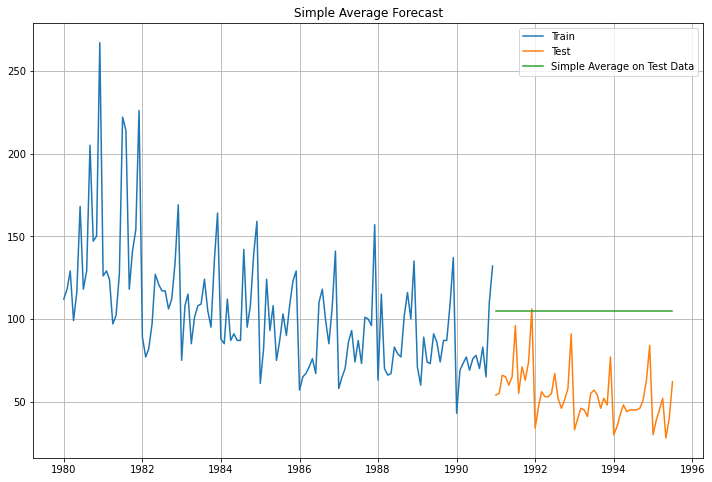

In [87]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train_R['Rose'], label='Train')
plt.plot(SimpleAverage_test_R['Rose'], label='Test')
plt.plot(SimpleAverage_test_R['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

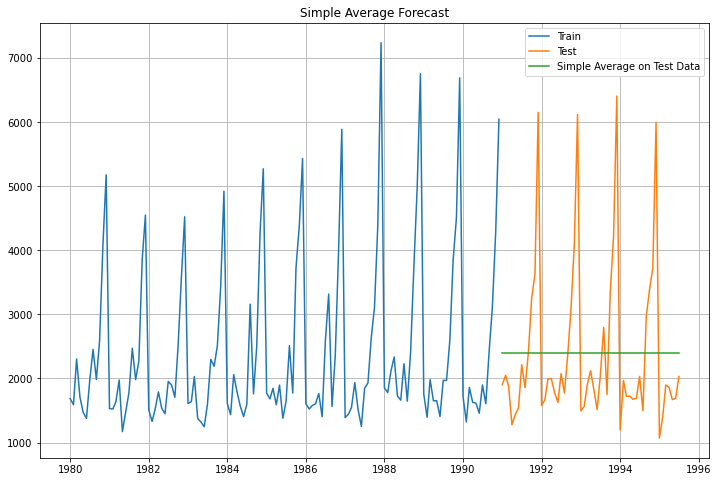

In [88]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train_S['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_S['Sparkling'], label='Test')
plt.plot(SimpleAverage_test_S['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [89]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test_R['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
resultsDf_2 = pd.DataFrame({'Test RMSE-Rose': [rmse_model2_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 53.481


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime          51.45105          1275.867052
NaiveModel                79.73855          3864.279352
SimpleAverageModel        79.73855                  NaN

In [90]:
## Test Data - RMSE

rmse_model3_test1 = metrics.mean_squared_error(test_spar['Sparkling'],SimpleAverage_test_S['mean_forecast'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test1))
resultsDf['Test RMSE-Sparkling']['SimpleAverageModel'] = rmse_model3_test1
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.082


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime          51.45105          1275.867052
NaiveModel                79.73855          3864.279352
SimpleAverageModel        79.73855          1275.081804

Moving Average model

In [91]:
MA_R = df_rose.copy()
MA_S = df_spar.copy()

In [92]:
MA_R['Trailing_2'] = MA_R['Rose'].rolling(2).mean()
MA_R['Trailing_4'] = MA_R['Rose'].rolling(4).mean()
MA_R['Trailing_6'] = MA_R['Rose'].rolling(6).mean()
MA_R['Trailing_9'] = MA_R['Rose'].rolling(9).mean()

MA_R.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

In [93]:
MA_S['Trailing_2'] = MA_S['Sparkling'].rolling(2).mean()
MA_S['Trailing_4'] = MA_S['Sparkling'].rolling(4).mean()
MA_S['Trailing_6'] = MA_S['Sparkling'].rolling(6).mean()
MA_S['Trailing_9'] = MA_S['Sparkling'].rolling(9).mean()

MA_R.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

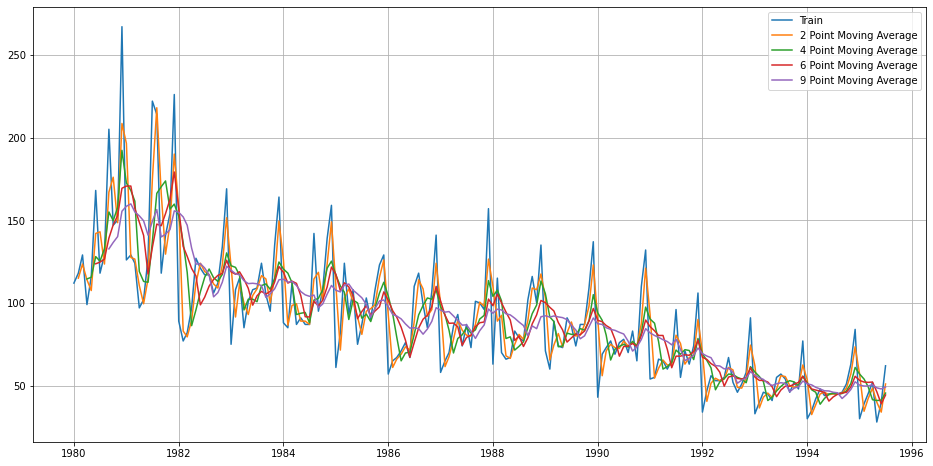

In [94]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MA_R['Rose'], label='Train')
plt.plot(MA_R['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_R['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_R['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MA_R['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

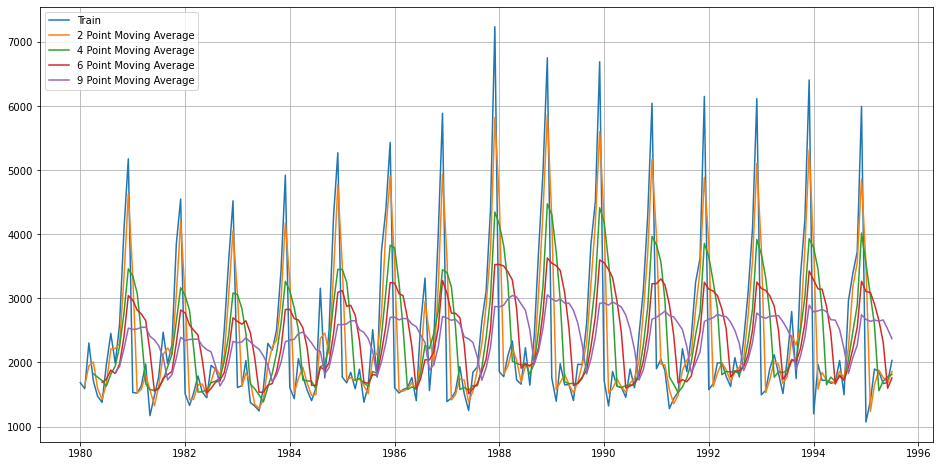

In [95]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MA_S['Sparkling'], label='Train')
plt.plot(MA_S['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_S['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_S['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MA_S['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [96]:
MAverage_train_R = MA_R[MA_R.index.year < 1991]
MAverage_test_R = MA_R[MA_R.index.year >= 1991]
MAverage_train_S = MA_S[MA_S.index.year < 1991]
MAverage_test_S = MA_S[MA_S.index.year >= 1991]

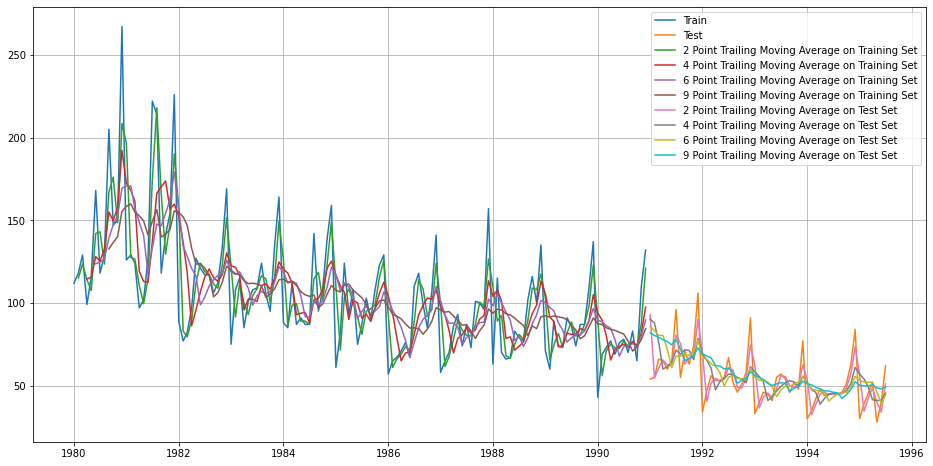

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MAverage_train_R['Rose'], label='Train')
plt.plot(MAverage_test_R['Rose'], label='Test')

plt.plot(MAverage_train_R['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_R['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_R['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_R['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MAverage_test_R['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_R['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_R['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_R['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

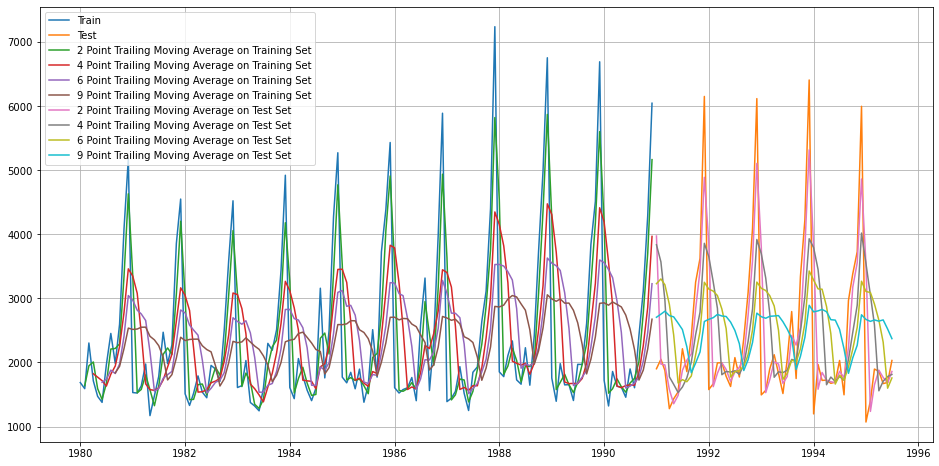

In [98]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MAverage_train_S['Sparkling'], label='Train')
plt.plot(MAverage_test_S['Sparkling'], label='Test')

plt.plot(MAverage_train_S['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_S['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_S['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MAverage_train_S['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MAverage_test_S['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_S['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_S['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MAverage_test_S['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [99]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_rose['Rose'],MAverage_test_R['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_rose['Rose'],MAverage_test_R['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_rose['Rose'],MAverage_test_R['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_rose['Rose'],MAverage_test_R['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.731 


In [100]:
resultsDf_4 = pd.DataFrame({'Test RMSE-Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime                  51.451050          1275.867052
NaiveModel                        79.738550          3864.279352
SimpleAverageModel                79.738550          1275.081804
2pointTrailingMovingAverage       11.529409                  NaN
4pointTrailingMovingAverage       14.455221                  NaN
6pointTrailingMovingAverage       14.572009                  NaN
9pointTrailingMovingAverage       14.731209                  NaN

In [101]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_spar['Sparkling'],MAverage_test_S['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_spar['Sparkling'],MAverage_test_S['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_spar['Sparkling'],MAverage_test_S['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_spar['Sparkling'],MAverage_test_S['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))


resultsDf['Test RMSE-Sparkling']['2pointTrailingMovingAverage'] = rmse_model4_test_2
resultsDf['Test RMSE-Sparkling']['4pointTrailingMovingAverage'] = rmse_model4_test_4
resultsDf['Test RMSE-Sparkling']['6pointTrailingMovingAverage'] = rmse_model4_test_6
resultsDf['Test RMSE-Sparkling']['9pointTrailingMovingAverage'] = rmse_model4_test_9

resultsDf

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 


Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime                  51.451050          1275.867052
NaiveModel                        79.738550          3864.279352
SimpleAverageModel                79.738550          1275.081804
2pointTrailingMovingAverage       11.529409           813.400684
4pointTrailingMovingAverage       14.455221          1156.589694
6pointTrailingMovingAverage       14.572009          1283.927428
9pointTrailingMovingAverage       14.731209          1346.278315

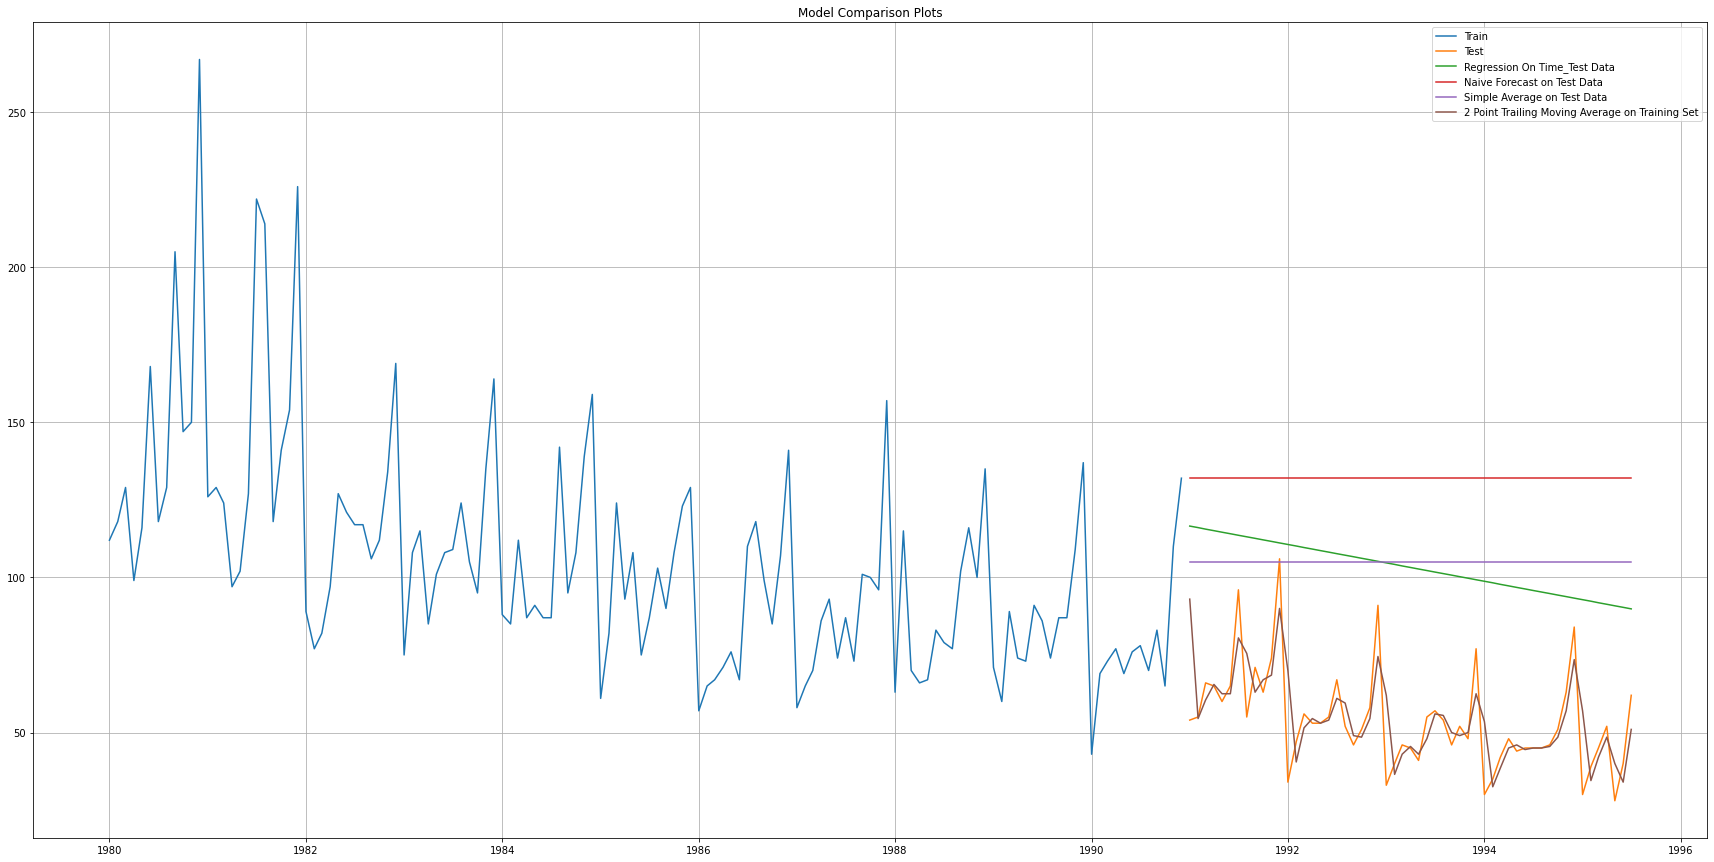

In [102]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,15))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(LR_test_R['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test_R['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_R['mean_forecast'], label='Simple Average on Test Data')

plt.plot(MAverage_test_R['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

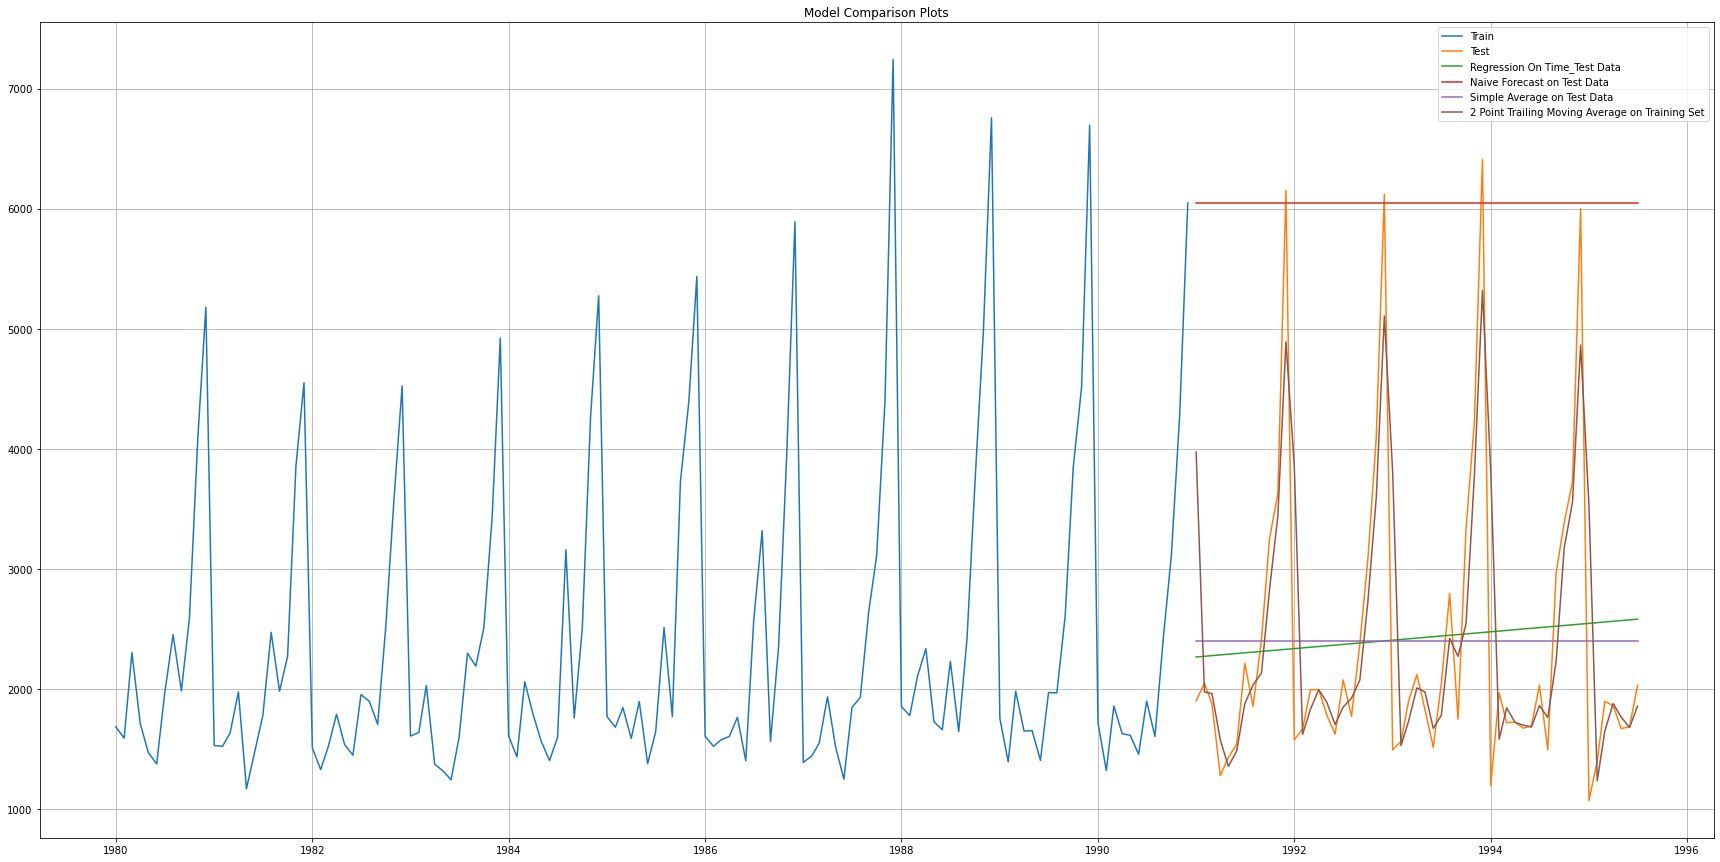

In [103]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,15))
plt.plot(train_spar['Sparkling'], label='Train')
plt.plot(test_spar['Sparkling'], label='Test')

plt.plot(LR_test_S['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test_S['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_S['mean_forecast'], label='Simple Average on Test Data')

plt.plot(MAverage_test_S['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [104]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [105]:
SES_train_R = train_rose.copy()
SES_test_R = test_rose.copy()
SES_train_S = train_spar.copy()
SES_test_S = test_spar.copy()

In [106]:
model_SES_R = SimpleExpSmoothing(SES_train_R['Rose'])
model_SES_S = SimpleExpSmoothing(SES_train_S['Sparkling'])

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
model_SES_autofit_R = model_SES_R.fit(optimized=True)
model_SES_autofit_S = model_SES_S.fit(optimized=True)

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
print("Model parameters for Rose wine type:\n",model_SES_autofit_R.params)
print("\nModel parameters for Sparkling wine type:\n",model_SES_autofit_S.params)

Model parameters for Rose wine type:
 {'smoothing_level': 0.0987499363908956, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 134.38688235486416, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

Model parameters for Sparkling wine type:
 {'smoothing_level': 0.049606598807459476, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1818.5047538435326, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [109]:
SES_test_R['predict'] = model_SES_autofit_R.forecast(steps=len(test_rose))
SES_test_S['predict'] = model_SES_autofit_S.forecast(steps=len(test_spar))

In [110]:
print(SES_test_R.head())

            Rose  predict
YearMonth                
1991-01-01  54.0   87.105
1991-02-01  55.0   87.105
1991-03-01  66.0   87.105
1991-04-01  65.0   87.105
1991-05-01  60.0   87.105


In [111]:
print(SES_test_S.head())

            Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339


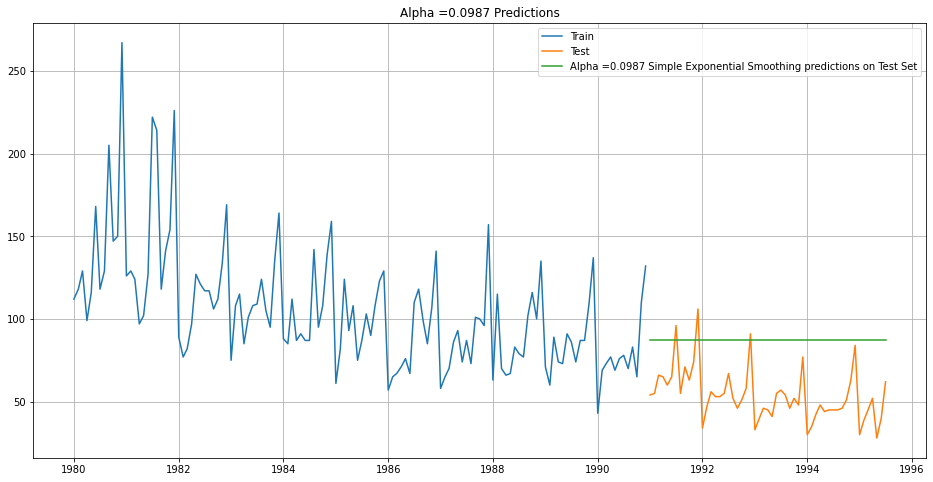

In [112]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_R['Rose'], label='Train')
plt.plot(SES_test_R['Rose'], label='Test')

plt.plot(SES_test_R['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

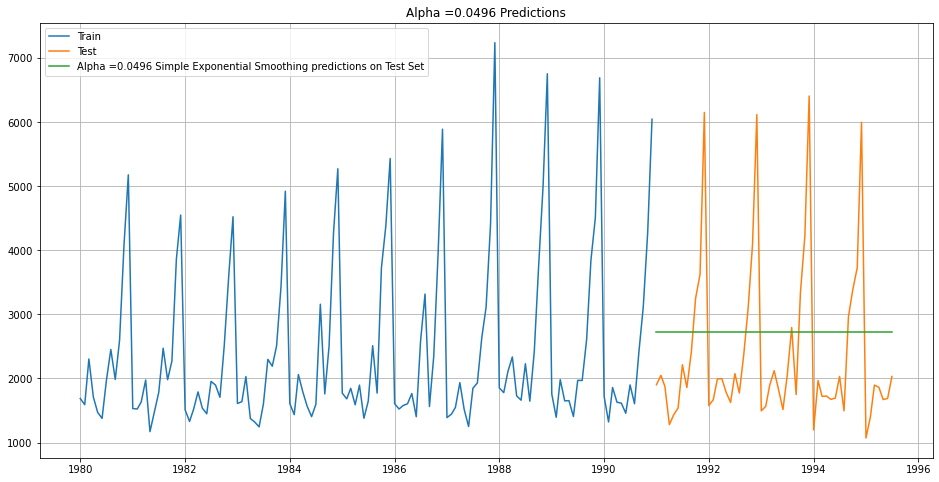

In [113]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_S['Sparkling'], label='Train')
plt.plot(SES_test_S['Sparkling'], label='Test')

plt.plot(SES_test_S['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

In [114]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test_R['Rose'],SES_test_R['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Rose wine Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
rmse_model5_test_12 = metrics.mean_squared_error(SES_test_S['Sparkling'],SES_test_S['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Sparkling wine Test Data, RMSE is %3.3f" %(rmse_model5_test_12))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Rose wine Test Data, RMSE is 36.817
For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Sparkling wine Test Data, RMSE is 1316.035


In [115]:
resultsDf_5 = pd.DataFrame({'Test RMSE-Rose': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

resultsDf_51 = pd.DataFrame({'Test RMSE-Sparkling': [rmse_model5_test_12]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_51])
resultsDf

Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime                              51.451050          1275.867052
NaiveModel                                    79.738550          3864.279352
SimpleAverageModel                            79.738550          1275.081804
2pointTrailingMovingAverage                   11.529409           813.400684
4pointTrailingMovingAverage                   14.455221          1156.589694
6pointTrailingMovingAverage                   14.572009          1283.927428
9pointTrailingMovingAverage                   14.731209          1346.278315
Alpha=0.0987,SimpleExponentialSmoothing       36.816905                  NaN
Alpha=0.0496,SimpleExponentialSmoothing             NaN          1316.034674

In [116]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [117]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES_R.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_R['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_R['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train_R['Rose'],SES_train_R['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test_R['Rose'],SES_test_R['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2278751442.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2278751442.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2278751442.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2278751442.py:10: FutureWarning: The frame.append method is deprecated and will be removed from p

In [118]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.848694
1           0.2   31.979391  41.382452
2           0.3   32.470164  47.525251
3           0.4   33.035130  53.787686
4           0.5   33.682839  59.661932
5           0.6   34.441171  64.991324
6           0.7   35.323261  69.718108
7           0.8   36.334596  73.793865
8           0.9   37.482782  77.159094

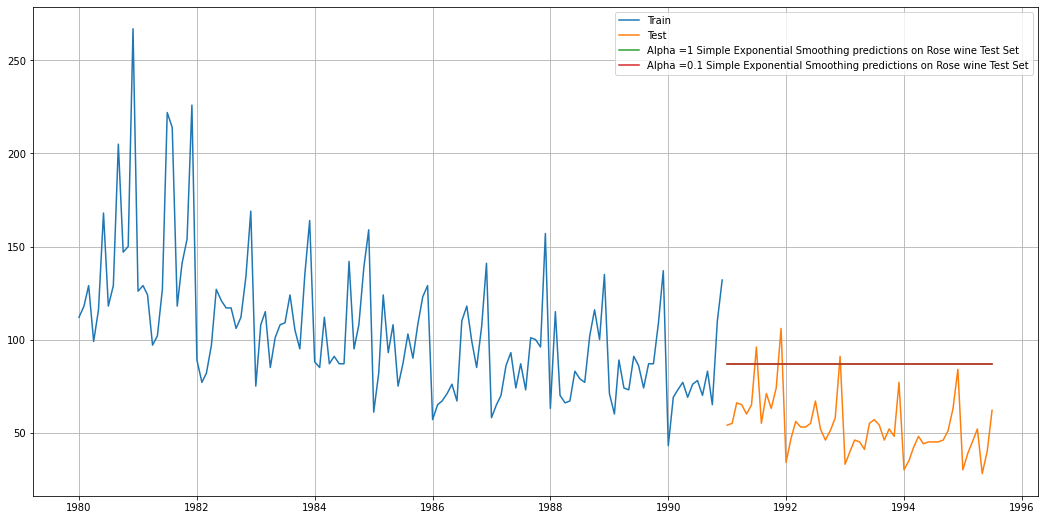

In [119]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_R['Rose'], label='Train')
plt.plot(SES_test_R['Rose'], label='Test')

plt.plot(SES_test_R['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Rose wine Test Set')

plt.plot(SES_test_R['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Rose wine Test Set')



plt.legend(loc='best')
plt.grid();

In [120]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE-Rose': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime                              51.451050          1275.867052
NaiveModel                                    79.738550          3864.279352
SimpleAverageModel                            79.738550          1275.081804
2pointTrailingMovingAverage                   11.529409           813.400684
4pointTrailingMovingAverage                   14.455221          1156.589694
6pointTrailingMovingAverage                   14.572009          1283.927428
9pointTrailingMovingAverage                   14.731209          1346.278315
Alpha=0.0987,SimpleExponentialSmoothing       36.816905                  NaN
Alpha=0.0496,SimpleExponentialSmoothing             NaN          1316.034674
Alpha=0.1,SimpleExponentialSmoothing          36.848694                  NaN

In [121]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_61 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES_S.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_S['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_S['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train_S['Sparkling'],SES_train_S['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test_S['Sparkling'],SES_test_S['predict',i],squared=False)
    
    resultsDf_61 = resultsDf_61.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\741400772.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_61 = resultsDf_61.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\741400772.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_61 = resultsDf_61.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\741400772.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_61 = resultsDf_61.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\741400772.py:13: FutureWarning: The frame.append method is deprecated and will be removed from

In [122]:
resultsDf_61.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

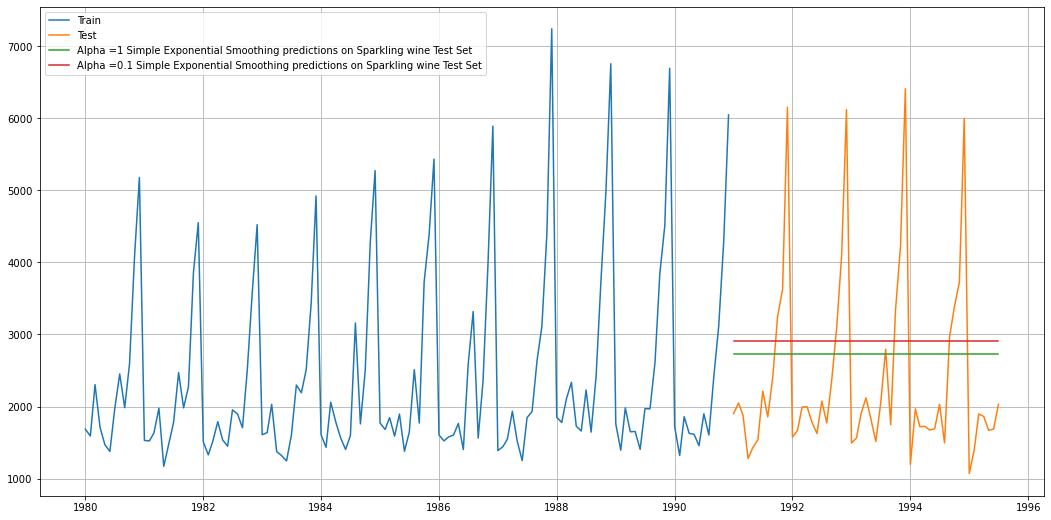

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_S['Sparkling'], label='Train')
plt.plot(SES_test_S['Sparkling'], label='Test')

plt.plot(SES_test_S['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Sparkling wine Test Set')

plt.plot(SES_test_S['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Sparkling wine Test Set')



plt.legend(loc='best')
plt.grid();

In [124]:
RMSE_S = [resultsDf_61.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]

In [125]:
resultsDf['Test RMSE-Sparkling']['Alpha=0.1,SimpleExponentialSmoothing'] = RMSE_S[0]
resultsDf

Test RMSE-Rose  Test RMSE-Sparkling
RegressionOnTime                              51.451050          1275.867052
NaiveModel                                    79.738550          3864.279352
SimpleAverageModel                            79.738550          1275.081804
2pointTrailingMovingAverage                   11.529409           813.400684
4pointTrailingMovingAverage                   14.455221          1156.589694
6pointTrailingMovingAverage                   14.572009          1283.927428
9pointTrailingMovingAverage                   14.731209          1346.278315
Alpha=0.0987,SimpleExponentialSmoothing       36.816905                  NaN
Alpha=0.0496,SimpleExponentialSmoothing             NaN          1316.034674
Alpha=0.1,SimpleExponentialSmoothing          36.848694          1375.393398

Double Exponential Smoothing (Holt's Model)

In [126]:
DES_train_R = train_rose.copy()
DES_test_R = test_rose.copy()
DES_train_S = train_spar.copy()
DES_test_S = test_spar.copy()

In [127]:
model_DES_R = Holt(DES_train_R['Rose'])
model_DES_S = Holt(DES_train_S['Sparkling'])

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [128]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [129]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES_R.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_R['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_R['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train_R['Rose'],DES_train_R['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test_R['Rose'],DES_test_R['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\729849719.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train


In [130]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
1            0.3          0.4   37.393239  358.775361
2            0.3          0.5   38.888325  451.834692
3            0.3          0.6   40.280670  536.978631
4            0.3          0.7   41.403518  601.640840
..           ...          ...         ...         ...
59           1.0          0.6   51.831610  801.704637
60           1.0          0.7   54.497039  841.917005
61           1.0          0.8   57.365879  853.989973
62           1.0          0.9   60.474309  834.735365
63           1.0          1.0   63.873454  780.103991

[64 rows x 4 columns]

In [131]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.591922
8            0.4          0.3   36.749123  339.330850
1            0.3          0.4   37.393239  358.775361
16           0.5          0.3   37.433314  394.296935
24           0.6          0.3   38.348984  439.320331

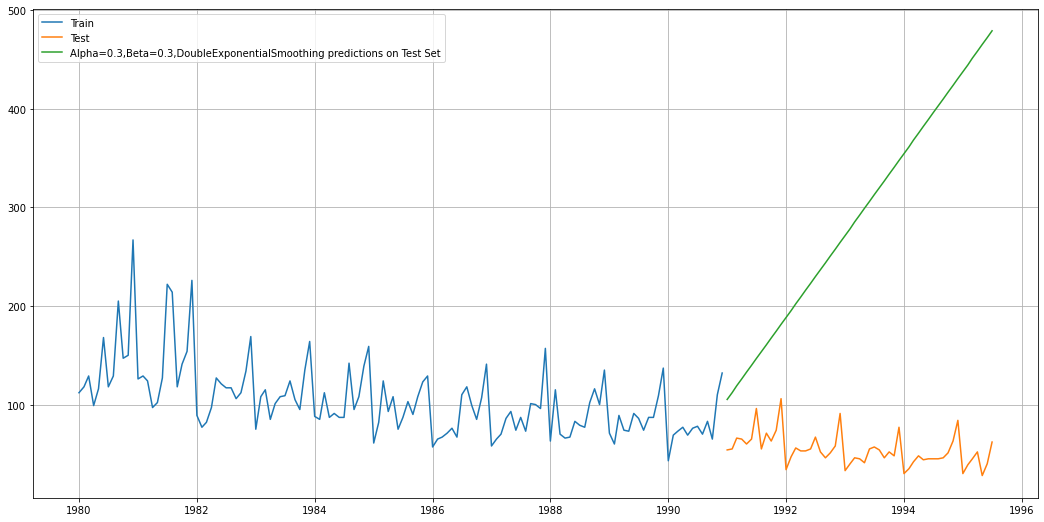

In [132]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_R['Rose'], label='Train')
plt.plot(DES_test_R['Rose'], label='Test')

plt.plot(DES_test_R['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [133]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE-Rose': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                    51.451050   
NaiveModel                                          79.738550   
SimpleAverageModel                                  79.738550   
2pointTrailingMovingAverage                         11.529409   
4pointTrailingMovingAverage                         14.455221   
6pointTrailingMovingAverage                         14.572009   
9pointTrailingMovingAverage                         14.731209   
Alpha=0.0987,SimpleExponentialSmoothing             36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                   NaN   
Alpha=0.1,SimpleExponentialSmoothing                36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing      265.591922   

                                               Test RMSE-Sparkling  
RegressionOnTime                                       1275.867052  
NaiveModel                                             3864.279352  
SimpleAverageModel                                     1275.081804  
2pointTrailingMovingAverage                             813.400684  
4pointTrailingMovingAverage                            1156.589694  
6pointTrailingMovingAverage                            1283.927428  
9pointTrailingMovingAverage                            1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                        NaN  
Alpha=0.0496,SimpleExponentialSmoothing                1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                   1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing                  NaN

In [134]:
resultsDf_71 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES_S.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_S['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_S['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train_S['Sparkling'],DES_train_S['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test_S['Sparkling'],DES_test_S['predict',i,j],squared=False)
        
        resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\1540712998.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_71 = resultsDf_71.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train


In [135]:
resultsDf_71.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

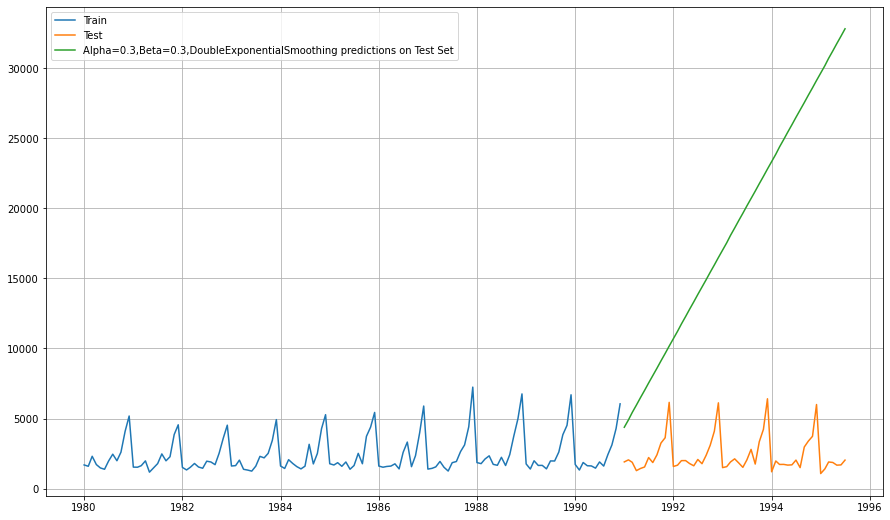

In [136]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,9))
plt.plot(DES_train_S['Sparkling'], label='Train')
plt.plot(DES_test_S['Sparkling'], label='Test')

plt.plot(DES_test_S['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [137]:
RMSE_S = [resultsDf_61.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]
resultsDf['Test RMSE-Sparkling']['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'] = RMSE_S[0]
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                    51.451050   
NaiveModel                                          79.738550   
SimpleAverageModel                                  79.738550   
2pointTrailingMovingAverage                         11.529409   
4pointTrailingMovingAverage                         14.455221   
6pointTrailingMovingAverage                         14.572009   
9pointTrailingMovingAverage                         14.731209   
Alpha=0.0987,SimpleExponentialSmoothing             36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                   NaN   
Alpha=0.1,SimpleExponentialSmoothing                36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing      265.591922   

                                               Test RMSE-Sparkling  
RegressionOnTime                                       1275.867052  
NaiveModel                                             3864.279352  
SimpleAverageModel                                     1275.081804  
2pointTrailingMovingAverage                             813.400684  
4pointTrailingMovingAverage                            1156.589694  
6pointTrailingMovingAverage                            1283.927428  
9pointTrailingMovingAverage                            1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                        NaN  
Alpha=0.0496,SimpleExponentialSmoothing                1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                   1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing          1375.393398

Triple Exponential Smoothing (Holt - Winter's Model)

In [138]:
TES_train_R = train_rose.copy()
TES_test_R = test_rose.copy()
TES_train_S = train_spar.copy()
TES_test_S = test_spar.copy()

In [139]:
model_TES_R = ExponentialSmoothing(TES_train_R['Rose'],trend='additive',seasonal='multiplicative',freq='MS')
model_TES_S = ExponentialSmoothing(TES_train_S['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

In [140]:
model_TES_autofit = model_TES_R.fit()
model_TES_autofit.params

{'smoothing_level': 0.07043989932631503,
 'smoothing_trend': 0.04650301769213779,
 'smoothing_seasonal': 4.039590252509318e-06,
 'damping_trend': nan,
 'initial_level': 146.61279022991906,
 'initial_trend': -0.8811320443785916,
 'initial_seasons': array([0.76750223, 0.87046378, 0.95125375, 0.8313741 , 0.93493001,
        1.01837326, 1.11984632, 1.191993  , 1.12850536, 1.10509424,
        1.28822129, 1.77635939]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [141]:
model_TES_autofit1 = model_TES_S.fit()
model_TES_autofit1.params

{'smoothing_level': 0.11101677395783265,
 'smoothing_trend': 0.049316382632581326,
 'smoothing_seasonal': 0.3624389131056697,
 'damping_trend': nan,
 'initial_level': 2356.4978867323553,
 'initial_trend': -9.787302694315414,
 'initial_seasons': array([0.7135243 , 0.68298624, 0.90486849, 0.8056077 , 0.65585195,
        0.65409923, 0.88620874, 1.13360552, 0.91938008, 1.21194659,
        1.87102251, 2.37567892]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [142]:
## Prediction on the test data

TES_test_R['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose))
TES_test_R.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.403015
1991-02-01  55.0     63.768569
1991-03-01  66.0     69.467268
1991-04-01  65.0     60.520787
1991-05-01  60.0     67.843106

In [143]:
## Prediction on the test data

TES_test_S['auto_predict'] = model_TES_autofit1.forecast(steps=len(test_rose))
TES_test_S.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.916886
1991-02-01       2049   1356.651239
1991-03-01       1874   1763.347842
1991-04-01       1279   1656.524156
1991-05-01       1432   1542.384105

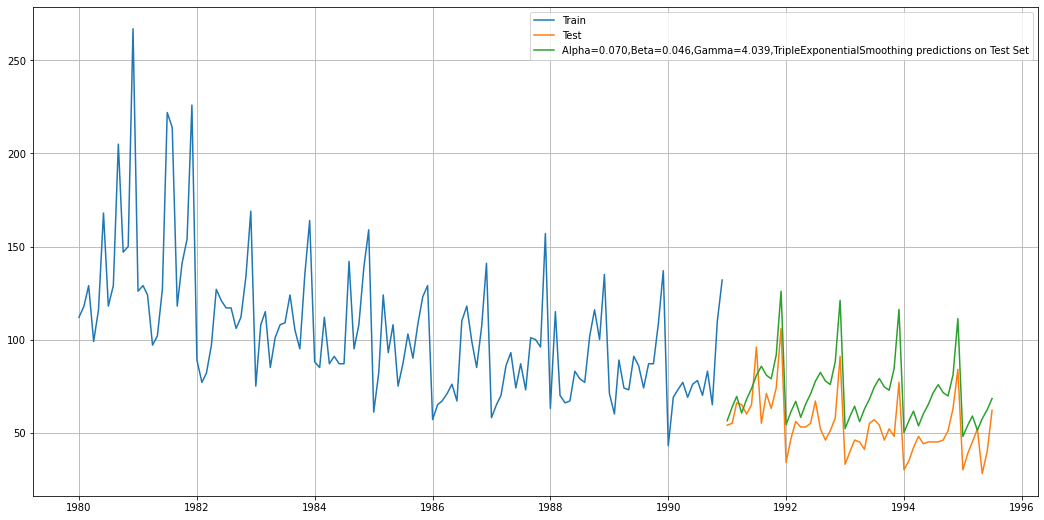

In [144]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_R['Rose'], label='Train')
plt.plot(TES_test_R['Rose'], label='Test')

plt.plot(TES_test_R['auto_predict'], label='Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

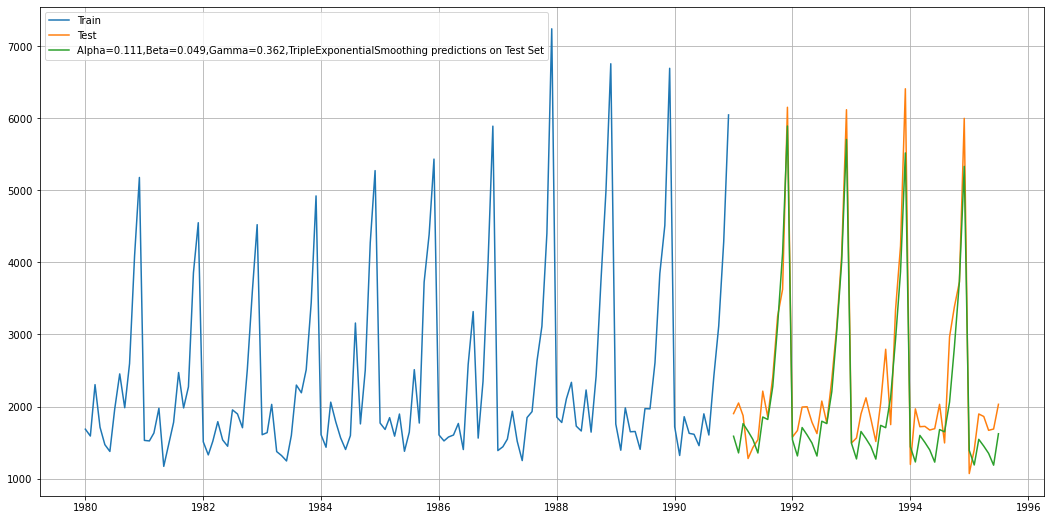

In [145]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_S['Sparkling'], label='Train')
plt.plot(TES_test_S['Sparkling'], label='Test')

plt.plot(TES_test_S['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [146]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test_R['Rose'],TES_test_R['auto_predict'],squared=False)
print("For Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExponentialSmoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExponentialSmoothing forecast on the Test Data,  RMSE is 20.359


In [147]:
rmse_model6_test_12 = metrics.mean_squared_error(TES_test_S['Sparkling'],TES_test_S['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_12))

For Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing forecast on the Test Data,  RMSE is 402.947


In [148]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE-Rose': [rmse_model6_test_1]}
                           ,index=['Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN

In [149]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE-Sparkling': [rmse_model6_test_12]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854

In [150]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [151]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_R.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train_R['Rose'],TES_train_R['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test_R['Rose'],TES_test_R['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_R['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_R['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4032754131.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

In [152]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE    Test RMSE
0             0.3          0.3           0.3     23.344917    19.695316
1             0.3          0.3           0.4     24.588120    10.158543
2             0.3          0.3           0.5     26.190281    31.729420
3             0.3          0.3           0.6     28.250682    81.317489
4             0.3          0.3           0.7     30.948221   153.221305
..            ...          ...           ...           ...          ...
507           1.0          1.0           0.6   2140.632923  6630.670675
508           1.0          1.0           0.7   3091.001599  9721.159235
509           1.0          1.0           0.8   2438.212926  2573.837848
510           1.0          1.0           0.9  28835.801100  3522.898638
511           1.0          1.0           1.0   1577.905281  3104.657151

[512 rows x 5 columns]

In [153]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1             0.3          0.3           0.4   24.588120  10.158543
9             0.3          0.4           0.4   25.599445  10.361475
80            0.4          0.5           0.3   26.917917  13.375197
24            0.3          0.6           0.3   25.815213  15.497246
194           0.6          0.3           0.5   31.758130  17.249825

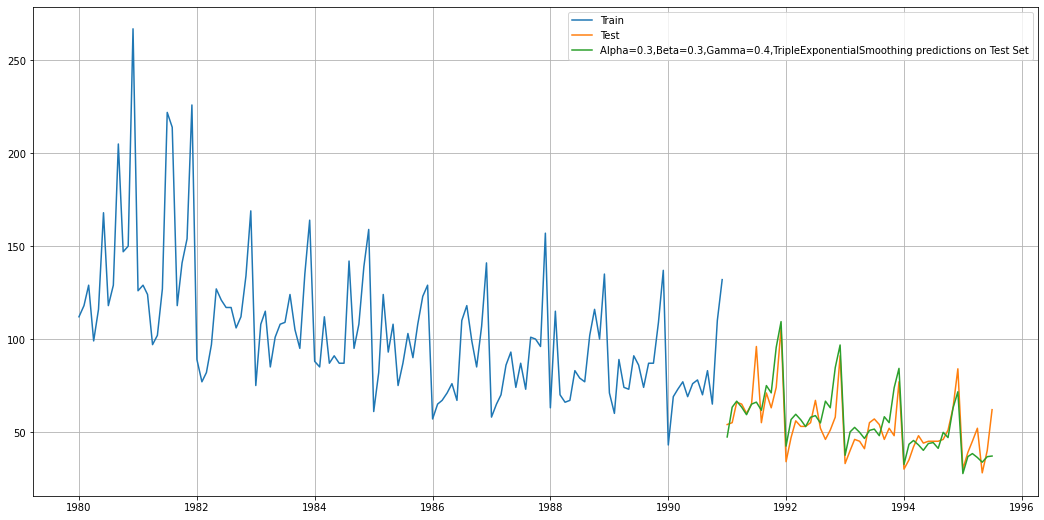

In [154]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_R['Rose'], label='Train')
plt.plot(TES_test_R['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_R['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [155]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE-Rose': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN

In [156]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_21 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_S.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train_S['Sparkling'],TES_train_S['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test_S['Sparkling'],TES_test_S['predict',i,j,k],squared=False)
            
            resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
            
            
            

            
 




resultsDf_8_21           

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will 

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will 

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will 

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will 

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_S['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_S['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_21 = resultsDf_8_21.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\192957370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3  3.977973e+02  3.613973e+02
1             0.3          0.3           0.4  4.009853e+02  9.073380e+02
2             0.3          0.3           0.5  4.107568e+02  1.592630e+03
3             0.3          0.3           0.6  4.293935e+02  2.329189e+03
4             0.3          0.3           0.7  4.600390e+02  3.202986e+03
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  1.882994e+05  4.386054e+06
508           1.0          1.0           0.7  2.660015e+05  8.649577e+06
509           1.0          1.0           0.8  1.101923e+06  2.700435e+05
510           1.0          1.0           0.9  7.695708e+04  2.472201e+05
511           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[512 rows x 5 columns]

In [157]:
resultsDf_8_21.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  397.797318  361.397300
17            0.3          0.5           0.4  452.801424  512.542557
376           0.8          1.0           0.3  790.740655  580.266110
66            0.4          0.3           0.5  448.661280  592.153132
8             0.3          0.4           0.3  415.172097  605.110479

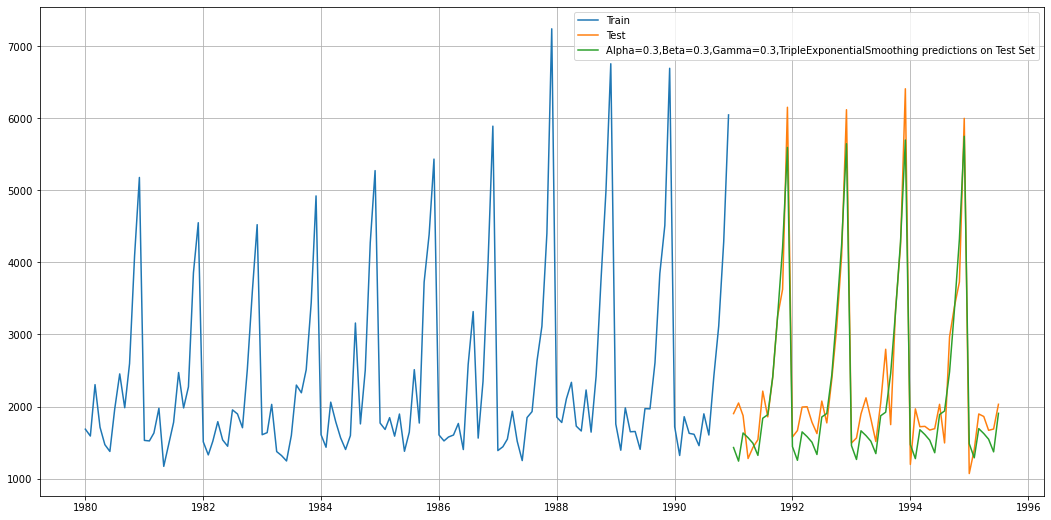

In [158]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_S['Sparkling'], label='Train')
plt.plot(TES_test_S['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_S['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [159]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE-Sparkling': [resultsDf_8_21.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300

### Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [160]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [161]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_R = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_S = pd.DataFrame(columns=['param', 'AIC'])

In [162]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:1279.671528853576
ARIMA(1, 1, 0) - AIC:1317.3503105381506


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 1) - AIC:1280.574229538005


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:1279.8707234231915


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 0) - AIC:1298.6110341605


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1281.507862186848


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\3100624765.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_R = ARIMA_AIC_R.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [163]:
for param in pdq:
    ARIMA_model1 = ARIMA(train_spar['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    

ARIMA(0, 1, 0) - AIC:1281.87072222647
ARIMA(0, 1, 1) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:1281.87072222647
ARIMA(1, 1, 0) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:1281.87072222647
ARIMA(2, 1, 0) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1281.87072222647


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\4025801556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_S = ARIMA_AIC_S.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [164]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_R.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)   1280.57423
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [165]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_S.sort_values(by='AIC',ascending=True)

param          AIC
0  (0, 1, 0)  1281.870722
1  (0, 1, 1)  1281.870722
2  (0, 1, 2)  1281.870722
3  (1, 1, 0)  1281.870722
4  (1, 1, 1)  1281.870722
5  (1, 1, 2)  1281.870722
6  (2, 1, 0)  1281.870722
7  (2, 1, 1)  1281.870722
8  (2, 1, 2)  1281.870722

In [167]:
auto_ARIMA_R = ARIMA(train_rose['Rose'], order=(0,1,2),freq='MS')

results_auto_ARIMA_R = auto_ARIMA_R.fit()

print(results_auto_ARIMA_R.summary())

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 25 Dec 2022   AIC                           1279.672
Time:                        07:12:30   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

In [168]:
auto_ARIMA_S = ARIMA(train_spar['Sparkling'], order=(0,1,0),freq='MS')

results_auto_ARIMA_S = auto_ARIMA_S.fit()

print(results_auto_ARIMA_R.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 25 Dec 2022   AIC                           1279.672
Time:                        07:12:31   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [191]:
predicted_auto_ARIMA_R = results_auto_ARIMA_R.forecast(steps=len(test_rose))

rmse_R = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA_R,squared=False)
print(rmse_R)
resultsDf_arima = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['ARIMA_R(0,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_arima])

resultsDf

37.32704924190657


Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN

In [192]:
predicted_auto_ARIMA_S = results_auto_ARIMA_S.forecast(steps=len(test_spar))

rmse_S = metrics.mean_squared_error(test_spar['Sparkling'],predicted_auto_ARIMA_S,squared=False)
print(rmse_S)
resultsDf_arima = pd.DataFrame({'Test RMSE-Sparkling': [rmse_S]}
                           ,index=['ARIMA_S(0,1,0)'])

resultsDf = pd.concat([resultsDf,resultsDf_arima])

resultsDf

3864.2793518443914


Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352

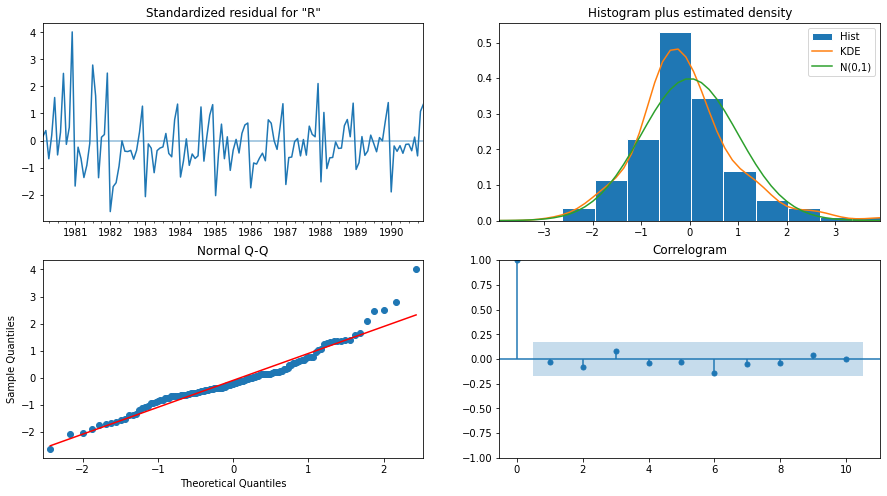

In [182]:
results_auto_ARIMA_R.plot_diagnostics();

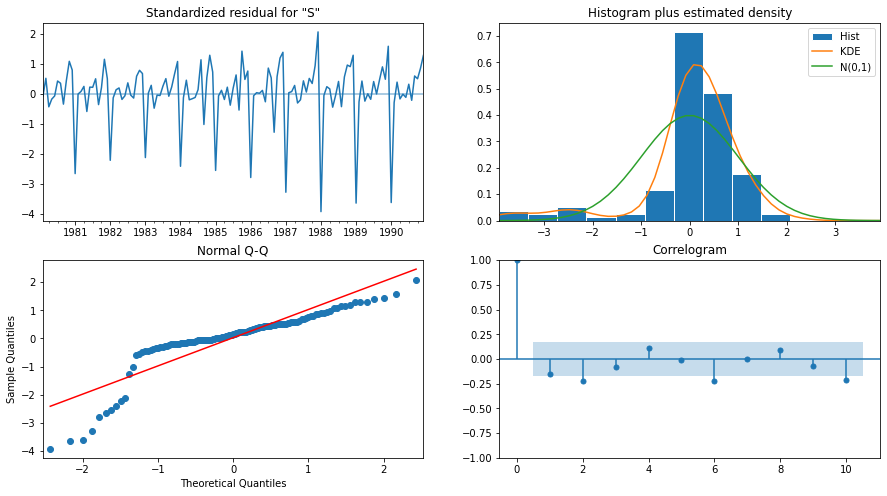

In [172]:
results_auto_ARIMA_S.plot_diagnostics();

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


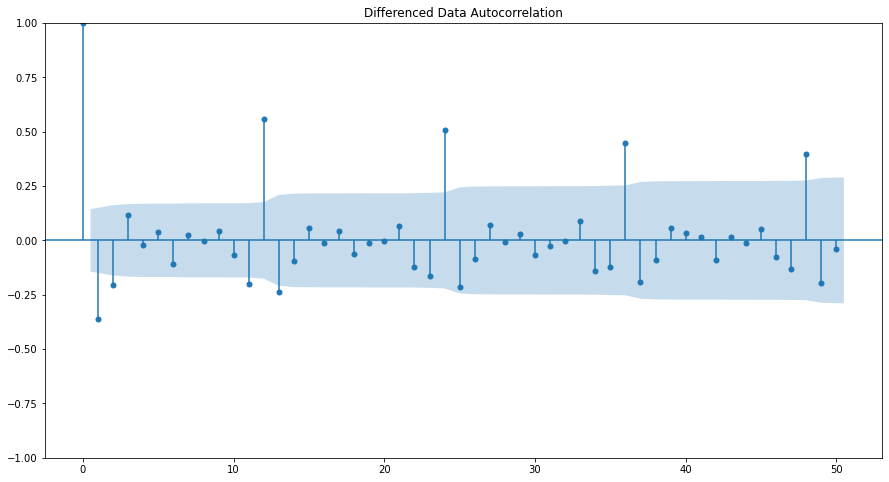

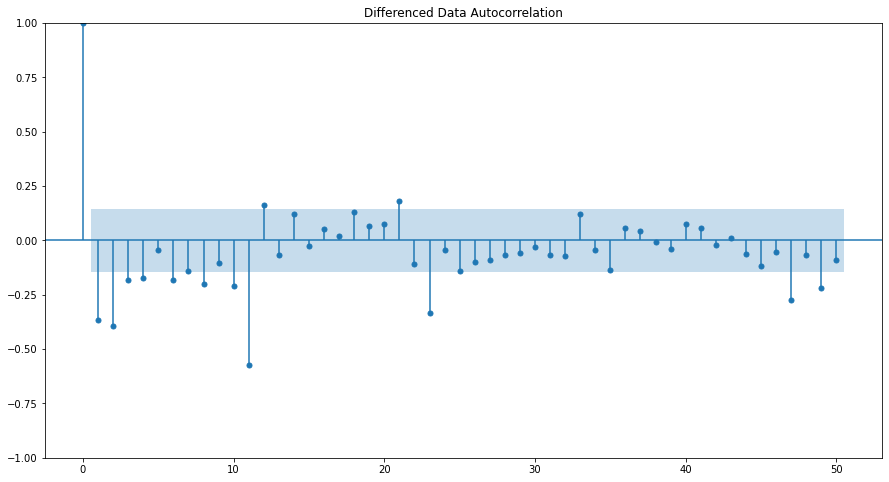

In [173]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that PACF plot cuts-off at lag 2 and ACF plot cuts-off at lag 2.


In [174]:
manual_ARIMA_R = ARIMA(train_rose['Rose'], order=(2,1,2),freq='MS')

results_manual_ARIMA_R = manual_ARIMA_R.fit()

print(results_manual_ARIMA_R.summary())

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 25 Dec 2022   AIC                           1281.871
Time:                        07:13:19   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

In [195]:
predicted_manual_ARIMA_R = results_manual_ARIMA_R.forecast(steps=len(test_rose))

rmse_R = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_R,squared=False)
print(rmse_R)
resultsDf_arima = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['ARIMA_R(2,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_arima])

resultsDf

36.89183151549836


Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN

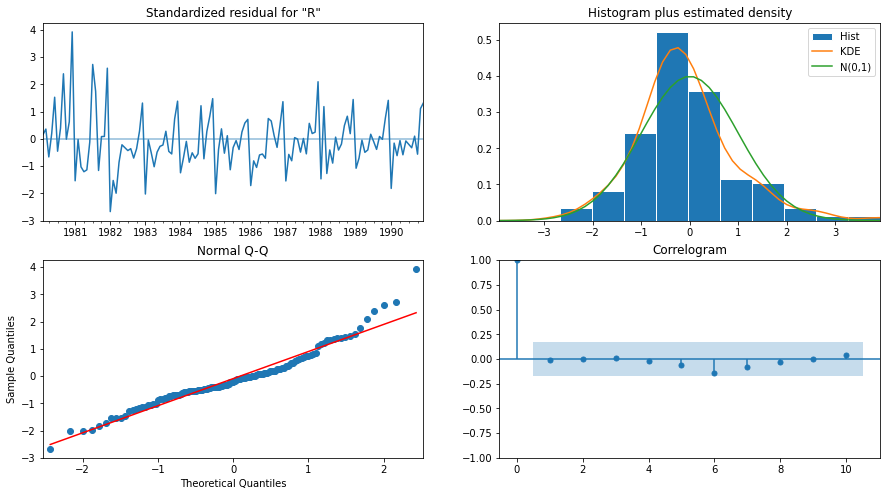

In [179]:
results_manual_ARIMA_R.plot_diagnostics();

We get similar model by looking at the ACF and PACF plots

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


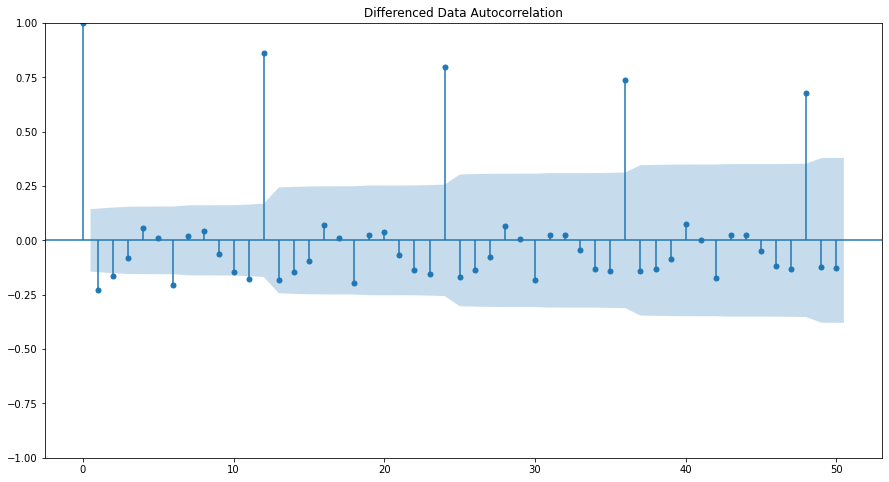

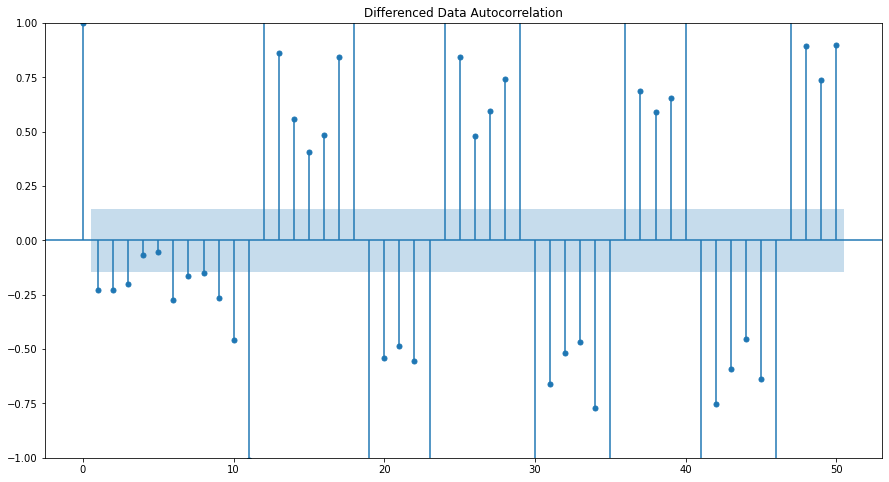

In [184]:
plot_acf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Observation:
 
 p value from PACF plot is 1 as we can see there is sharp decline from the original to lag 1
 
 
 q value from ACF plot is 2 as we can see there is sharp decline from the original to lag 2
    

In [185]:
manual_ARIMA_S = ARIMA(train_spar['Sparkling'], order=(1,1,2),freq='MS')

results_manual_ARIMA_S = manual_ARIMA_S.fit()

print(results_manual_ARIMA_S.summary())

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1113.264
Date:                Sun, 25 Dec 2022   AIC                           2234.527
Time:                        07:22:07   BIC                           2246.028
Sample:                    01-01-1980   HQIC                          2239.200
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2171      0.316      0.688      0.492      -0.402       0.836
ma.L1         -0.6943      0.385     -1.803      0.071      -1.449       0.060
ma.L2         -0.2852      0.372     -0.767      0.4

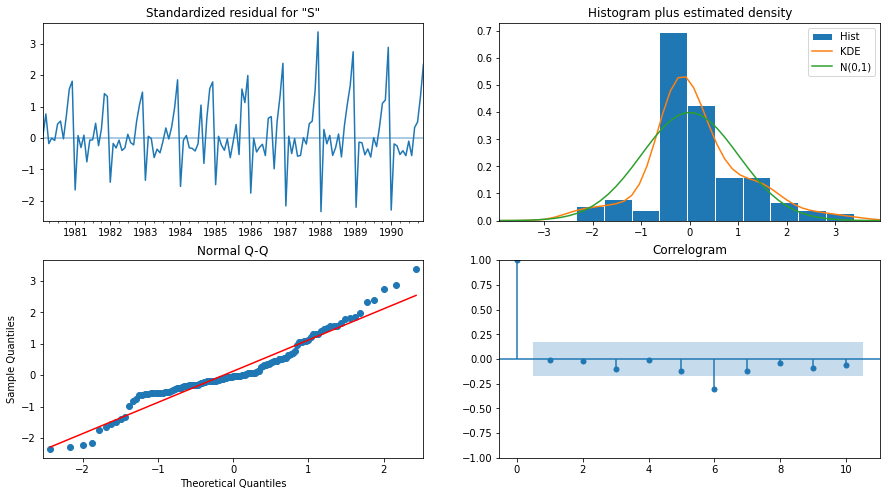

In [199]:
results_manual_ARIMA_S.plot_diagnostics();

In [198]:
predicted_manual_ARIMA_S = results_manual_ARIMA_S.forecast(steps=len(test_rose))

rmse_S = metrics.mean_squared_error(test_spar['Sparkling'],predicted_manual_ARIMA_S,squared=False)
print(rmse_S)
resultsDf_arima = pd.DataFrame({'Test RMSE-Sparkling': [rmse_S]}
                           ,index=['ARIMA_S(1,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_arima])

resultsDf

1316.5973196738469


Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   
ARIMA_S(1,1,2)                                                 NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN  
ARIMA_S(1,1,2)                                              1316.597320

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

    Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

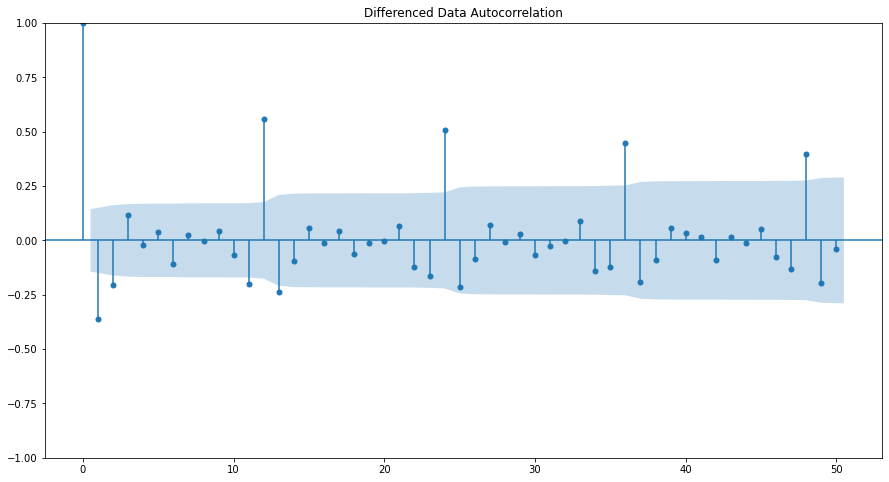

In [200]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From above plot, we can see some seasonality at 1 and 12.
We will run our auto SARIMA models by setting seasonality both as 1 and 12.

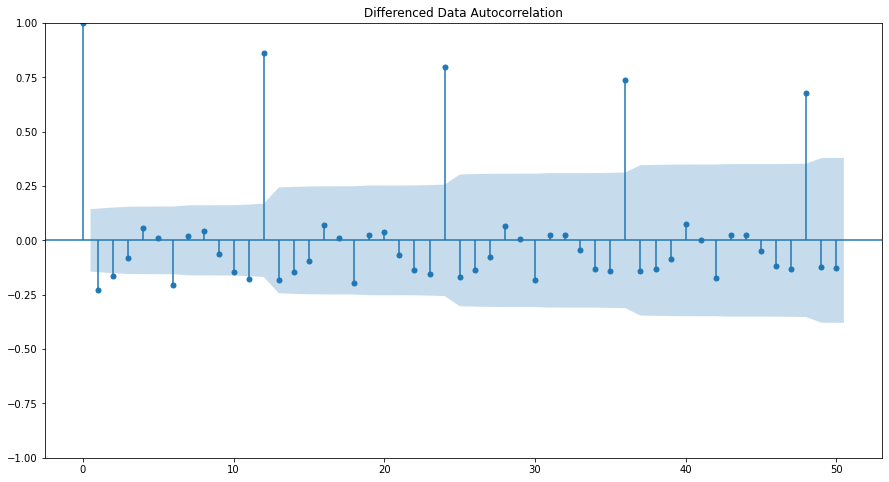

In [201]:
plot_acf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [202]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 1, 0)(0, 1, 0, 6)
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (1, 0, 0)(1, 0, 0, 6)
Model: (1, 0, 1)(1, 0, 1, 6)
Model: (1, 0, 2)(1, 0, 2, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (2, 0, 0)(2, 0, 0, 6)
Model: (2, 0, 1)(2, 0, 1, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)


In [203]:
SARIMA_AIC_R = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_R

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [204]:
SARIMA_AIC_S = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_S

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [205]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:1607.5307543879908


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:1470.1087725948707
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:1295.5685990043908
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:1320.0985789105328


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:1166.6525964307123


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:1069.7407069273654
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:1324.009325026564


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:1206.9316940921765


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed

SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:1128.5808515388155
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:1128.961846229569
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:1122.1453394743182


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:1030.9463542784051
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:1116.8862968380438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:1117.3862628719296


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:1074.3240137122955
SARIMA(0, 0, 0)x(2, 1, 0, 6) - AIC:1073.2580938219023


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 1, 6) - AIC:1065.6257757310138


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 2, 6) - AIC:1032.860233603395
SARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC:1481.8198652085207


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 6) - AIC:1382.4694113540816


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 6) - AIC:1240.1590265903083
SARIMA(0, 0, 1)x(0, 1, 0, 6) - AIC:1304.934739807571


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 1, 6) - AIC:1148.06533072284


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 2, 6) - AIC:1043.6039698072077
SARIMA(0, 0, 1)x(1, 0, 0, 6) - AIC:1315.815473274203


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 6) - AIC:1190.5107756713173


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 6) - AIC:1110.8350705931803
SARIMA(0, 0, 1)x(1, 1, 0, 6) - AIC:1121.0537524383763


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:1106.0736252074


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 2, 6) - AIC:1006.8030357759696


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 6) - AIC:1111.2472841293204


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 6) - AIC:1111.5449351952118


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 6) - AIC:1063.284619076937


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 0, 6) - AIC:1061.3045422365333


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 1, 6) - AIC:1050.5924095941657


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 2, 6) - AIC:1008.7288393235885
SARIMA(0, 0, 2)x(0, 0, 0, 6) - AIC:1426.844549797179


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 1, 6) - AIC:1334.5146977231889


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 6) - AIC:1195.2157440294425
SARIMA(0, 0, 2)x(0, 1, 0, 6) - AIC:1294.8257356581805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 1, 6) - AIC:1139.9864855067829


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 2, 6) - AIC:1019.9659533096789


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 6) - AIC:1315.5282974007098


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 6) - AIC:1183.7258939440637


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 6) - AIC:1102.6252946611062
SARIMA(0, 0, 2)x(1, 1, 0, 6) - AIC:1121.0458749397594


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 1, 6) - AIC:1097.1705985834924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 2, 6) - AIC:978.7784667579258


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 6) - AIC:1109.5936902214917


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 6) - AIC:1111.613516044834


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 6) - AIC:1054.9504039510223


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 0, 6) - AIC:1063.2310137090108


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 1, 6) - AIC:1051.5355488114706


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 2, 6) - AIC:980.5075960880712
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182701
SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:1362.6525264440118
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:1185.4374421231141


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:1085.2221765540348
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149036
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721824

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1170.9535453581325


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1159.5733055635214


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 6) - AIC:1055.7799647569614
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515272


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426230857
SARIMA(0, 1, 0)x(2, 1, 0, 6) - AIC:1087.9645416255682


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 6) - AIC:1063.3058015292695


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 6) - AIC:1057.8948377569516
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:1305.2519512333429


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 1, 6) - AIC:1133.3738796963337


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 6) - AIC:1020.0141544703108
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745042


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.85641240307


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 0, 6) - AIC:1120.2500944610824


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 6) - AIC:1103.560405061759


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 6) - AIC:966.6575188978438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455187368924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082621323


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 6) - AIC:1044.9512756528734


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 6) - AIC:1031.8316130543044


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 6) - AIC:968.6572434543771
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:1251.6675430541052


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1192.0017194563159


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1081.8324069560294
SARIMA(0, 1, 2)x(0, 1, 0, 6) - AIC:1289.8020614611255

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 1, 2)x(0, 1, 1, 6) - AIC:1118.5152527420512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 6) - AIC:1011.7971460123646


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1222.0132244495628


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1153.8519348207237


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1061.4359846052967


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 0, 6) - AIC:1114.7930088760784


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 6) - AIC:1088.6804705397783


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 6) - AIC:956.6204529547578


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1089.0244978807243


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1090.226507190902


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1043.6002611507047


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 6) - AIC:1032.7548920154168


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 6) - AIC:1019.3339537158076


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 6) - AIC:958.6204355364465
SARIMA(1, 0, 0)x(0, 0, 0, 6) - AIC:1331.2484844349851
SARIMA(1, 0, 0)x(0, 0, 1, 6) - AIC:1272.464386494384


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 6) - AIC:1150.8830440541697
SARIMA(1, 0, 0)x(0, 1, 0, 6) - AIC:1315.0242325232443


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 1, 6) - AIC:1156.5219595989226


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 2, 6) - AIC:1055.747793240442
SARIMA(1, 0, 0)x(1, 0, 0, 6) - AIC:1273.4437794067671


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 1, 6) - AIC:1200.3004668548324


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 6) - AIC:1122.7432206663855


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 0, 6) - AIC:1115.5907231012316


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 1, 6) - AIC:1117.5989288118851


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 2, 6) - AIC:1019.9873186921513


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 0, 6) - AIC:1105.227408200255


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 6) - AIC:1101.7540521080473


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 6) - AIC:1072.5662680688106


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 0, 6) - AIC:1036.6348278322703


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 1, 6) - AIC:1037.113680927138


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 2, 6) - AIC:1021.8828881790039


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 0, 6) - AIC:1268.426754766425


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 1, 6) - AIC:1208.9990551905862


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 6) - AIC:1101.725788010903


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 0, 6) - AIC:1288.5302645220886


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 1, 6) - AIC:1149.833757614462


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 2, 6) - AIC:1043.785896680465


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 0, 6) - AIC:1217.2736479276682


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 6) - AIC:1188.0977395171824


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 6) - AIC:1091.4784544450408


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 0, 6) - AIC:1111.2054712413994


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 1, 6) - AIC:1103.440891342759


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 2, 6) - AIC:1005.7635735713911


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:1092.4494415522806


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:1101.704357589322


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:1061.5491259448615


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 0, 6) - AIC:1033.6054113561877


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 1, 6) - AIC:1034.4196623990438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 2, 6) - AIC:1007.7417928136747


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 0, 6) - AIC:1258.765624239391


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 6) - AIC:1198.3531618710783


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 6) - AIC:1086.0398079766449


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 0, 6) - AIC:1290.1708084351615


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 1, 6) - AIC:1135.704799065406


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 2, 6) - AIC:1021.9061746089002


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 6) - AIC:1216.643242762698


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 6) - AIC:1188.171509896335


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 6) - AIC:1081.4739938220102


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 0, 6) - AIC:1112.3000339652026


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 1, 6) - AIC:1095.1334465867749


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:961.7307610447367


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 6) - AIC:1085.7398857366607


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 6) - AIC:1086.5319031178


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:1055.5510675246835


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 0, 6) - AIC:1034.88154255584


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 1, 6) - AIC:1022.080691101339


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:963.5065792115906
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.8763225267387


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1135.549810581563
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:1348.9168051973143


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:1174.4494600670894


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:1076.7421093656922
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1250.6246888229643


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.600959591789


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696522199
SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:1154.9090724406442


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 6) - AIC:1150.651170476654


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 6) - AIC:1043.6410415352786
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1123.2830148980045


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.9425392417033


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1105.9092655265274


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 0, 6) - AIC:1072.641815505971


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 6) - AIC:1057.9003966814282


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 6) - AIC:1045.590029000101
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1262.1840064255512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1201.5037144424373


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1093.6044317606406
SARIMA(1, 1, 1)x(0, 1, 0, 6) - AIC:1300.0001789289936


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 6) - AIC:1129.452079499064


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 6) - AIC:1019.1406742826804


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1213.623314313084


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.4240004378366


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.2585834383774


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 0, 6) - AIC:1108.984181220687


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 6) - AIC:1100.1116608671457


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 6) - AIC:995.514276651883


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1083.9006911266763


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1083.1711266750854


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.778469726035


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 6) - AIC:1022.8607690062504
SARIMA(1, 1, 1)x(2, 1, 1, 6) - AIC:1016.7565703676912


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 6) - AIC:966.3984365835107
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1251.9495040706083


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.2804057586875


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1083.806626663081


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 0, 6) - AIC:1273.2776925538606


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 6) - AIC:1114.9758234932824


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 6) - AIC:1013.654459400552


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1213.2183953752997


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.4829112789796


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437951036


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 6) - AIC:1102.6972630936834


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 6) - AIC:1086.0656759639583


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 6) - AIC:959.0677359757749


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1081.93937597139


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1091.7082921203094


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.6558175251794


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 6) - AIC:1018.7511489716148


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 6) - AIC:1017.4504939267489


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 6) - AIC:960.6825964858836
SARIMA(2, 0, 0)x(0, 0, 0, 6) - AIC:1308.2736030498356
SARIMA(2, 0, 0)x(0, 0, 1, 6) - AIC:1259.1810565422556

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(2, 0, 0)x(0, 0, 2, 6) - AIC:1144.427111755926
SARIMA(2, 0, 0)x(0, 1, 0, 6) - AIC:1307.0081798048043


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 1, 6) - AIC:1158.5218697215064


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 2, 6) - AIC:1057.1219345485667
SARIMA(2, 0, 0)x(1, 0, 0, 6) - AIC:1250.971089674725


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 1, 6) - AIC:1192.7377207267214


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 6) - AIC:1123.5484237411795
SARIMA(2, 0, 0)x(1, 1, 0, 6) - AIC:1105.559948200896


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 1, 6) - AIC:1107.466944858553


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 2, 6) - AIC:1021.7734820635857


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 0, 6) - AIC:1092.3973993484087


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 6) - AIC:1088.497365866074


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 6) - AIC:1064.4601742639456


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 0, 6) - AIC:1022.8281533389172


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 1, 6) - AIC:1024.077872088908


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 2, 6) - AIC:1010.8062937497793


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 0, 6) - AIC:1266.3761681135602


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 6) - AIC:1208.9018266431035


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 6) - AIC:1097.5566195038357


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 0, 6) - AIC:1290.5302554578886


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 1, 6) - AIC:1145.6141470237844


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 2, 6) - AIC:1044.0781091766994


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 6) - AIC:1207.5750767020807


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 6) - AIC:1198.888229280741


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 6) - AIC:1099.5903558916555


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 0, 6) - AIC:1103.3295662660378


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 1, 6) - AIC:1104.5534757290138


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 2, 6) - AIC:1005.7204108762328


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 6) - AIC:1080.9563599034952


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 6) - AIC:1077.6771204788668


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 6) - AIC:1063.598754194503
SARIMA(2, 0, 1)x(2, 1, 0, 6) - AIC:1020.8396403371261


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 1, 6) - AIC:1020.2762323666014


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 2, 6) - AIC:1007.703944764394


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 6) - AIC:1258.680177670859


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 6) - AIC:1198.0730669333598


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 2, 6) - AIC:1087.990531489915


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 0, 6) - AIC:1280.8058231052564


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 1, 6) - AIC:1136.4907054447842


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 2, 6) - AIC:1024.382430818191


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 6) - AIC:1207.8468440310342


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 6) - AIC:1184.433771118583


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 6) - AIC:1079.9267059600304


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 0, 6) - AIC:1105.5028111136571


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 1, 6) - AIC:1097.557718020032


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 2, 6) - AIC:965.1724642104787


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 6) - AIC:1097.8798009341704


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 6) - AIC:1079.5060716132753


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:1057.0850426531697


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 0, 6) - AIC:1022.9051053811247


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 1, 6) - AIC:1022.6457610395819


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 2, 6) - AIC:965.0449912934496
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.9630734540376

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220648
SARIMA(2, 1, 0)x(0, 1, 0, 6) - AIC:1326.3778292561644


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 6) - AIC:1164.1463002969065


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 6) - AIC:1055.4053674844074
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1219.0664587882022


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1186.6130717491483


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.670248069001
SARIMA(2, 1, 0)x(1, 1, 0, 6) - AIC:1123.1399941411084


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 6) - AIC:1108.6984531990836


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 6) - AIC:1020.2443308002416
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026224

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081209


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.6114741188271


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 6) - AIC:1017.6352581452746


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 6) - AIC:1009.1315131987536


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 6) - AIC:987.7054243621878
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.2315231798757

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.4126986467863


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1092.4754616553782


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 0, 6) - AIC:1301.64193482403


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 6) - AIC:1130.5761025580757


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 6) - AIC:1019.6917143996557


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.833586239409


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919129907


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.8188703387068


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 6) - AIC:1095.4750537470136


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 6) - AIC:1093.9698140113376


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 6) - AIC:966.3987584277864


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092236


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.47816273863


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.673460753054


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 6) - AIC:996.5671248716612


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 6) - AIC:989.8750414803516


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 6) - AIC:968.5764358661099


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146664


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691928519664


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033342614


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:1278.7390338508817


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1116.929906594319


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1011.1384016831419


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510934


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.728327285829


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103219798706


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 6) - AIC:1094.6959813000083


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 6) - AIC:1084.493856666765


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:957.8063008529391


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457924263


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.07717989258


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.220389068626


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 6) - AIC:994.972416986104


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 6) - AIC:1004.9745950086676


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:959.8061484534393


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\760138806.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [206]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:2316.256197115824

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:2084.3553624892675
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:2280.5252252009495


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:2037.2896362435104


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:1856.002469568174
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:2281.456630175153


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:2151.9152340116134


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:1965.4168492680474
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:1802.0949415896628
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:1789.9415660771467


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:1681.266213084294
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:1804.0548045292603


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:1805.8994990342674


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:1769.0961403011538
SARIMA(0, 0, 0)x(2, 1, 0, 6) - AIC:1716.669931393362


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 1, 6) - AIC:1718.6406413297395


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 2, 6) - AIC:1686.0432131554596
SARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC:2337.1070158960865


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 6) - AIC:2222.463712251805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 6) - AIC:2003.7236716476502
SARIMA(0, 0, 1)x(0, 1, 0, 6) - AIC:2227.2202182842598


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 1, 6) - AIC:1989.3797828220784


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 2, 6) - AIC:1821.8724221600974
SARIMA(0, 0, 1)x(1, 0, 0, 6) - AIC:2231.778094792657


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 6) - AIC:2101.6054289026083


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 6) - AIC:1922.4995851257447


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 0, 6) - AIC:1797.6759883975362


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:1770.1725840344718


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 2, 6) - AIC:1664.9993617238033


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 6) - AIC:1799.1639359422481


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 6) - AIC:1800.4834950606587


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 6) - AIC:1751.479106539192


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 0, 6) - AIC:1709.8805623287801


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 1, 6) - AIC:1711.0162134609363


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 2, 6) - AIC:1666.7319453428104
SARIMA(0, 0, 2)x(0, 0, 0, 6) - AIC:2278.5069170271317


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 1, 6) - AIC:2175.5518711824657


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 6) - AIC:1968.9134005784301
SARIMA(0, 0, 2)x(0, 1, 0, 6) - AIC:2192.849464333351


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 1, 6) - AIC:1976.3913585061164


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 2, 6) - AIC:1808.797532372112


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 6) - AIC:2215.8578814111843


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 6) - AIC:2087.6478045276267


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 6) - AIC:1909.4093238906146


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 0, 6) - AIC:1799.3527938269353


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 1, 6) - AIC:1755.5690058322095


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 2, 6) - AIC:1653.3507319289383


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 6) - AIC:1801.1895728852119


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 6) - AIC:1802.119004453368


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 6) - AIC:1738.364344877318


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 0, 6) - AIC:1711.21648873957


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 1, 6) - AIC:1712.3622835520014


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 2, 6) - AIC:1655.0671939545452
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171631


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689147
SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:2262.9835238897754


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:2018.778420692755


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:1859.2938415854665
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430662


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111229876
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1838.4913791966653
SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1825.5404759865864


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 6) - AIC:1717.6099198651696
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751069


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780566193
SARIMA(0, 1, 0)x(2, 1, 0, 6) - AIC:1747.6671722882743


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 6) - AIC:1746.2224663338006


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be remo

SARIMA(0, 1, 0)x(2, 1, 2, 6) - AIC:1719.0964190617922
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082793


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.18763395401
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:2243.355144109236


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 1, 6) - AIC:1999.5210480231156


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 6) - AIC:1831.8220003825484
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785636


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813841


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274341191


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 0, 6) - AIC:1797.8405622217633


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 6) - AIC:1763.5428066423192


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 6) - AIC:1705.3188491710437


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103987035


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933251297


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414775362275


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 6) - AIC:1706.3182101680093


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 6) - AIC:1703.6706463292285


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 6) - AIC:1656.6759351533226
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168707


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215874


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151460139786
SARIMA(0, 1, 2)x(0, 1, 0, 6) - AIC:2198.734152445978

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 1, 2)x(0, 1, 1, 6) - AIC:1960.6368563883657


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 6) - AIC:1796.0064404520035
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689235395


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111270441595


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963212354879


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 0, 6) - AIC:1791.076079184036


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 6) - AIC:1744.5296521364498


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 6) - AIC:1640.9306518906578


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079049135


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190985559679


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.88881770897


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 6) - AIC:1700.2693791082622


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 6) - AIC:1700.2230368761652


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 6) - AIC:1642.424405232817
SARIMA(1, 0, 0)x(0, 0, 0, 6) - AIC:2263.0761053927263
SARIMA(1, 0, 0)x(0, 0, 1, 6) - AIC:2165.271503431032


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 6) - AIC:1966.9223059502724
SARIMA(1, 0, 0)x(0, 1, 0, 6) - AIC:2247.8453573693973


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 1, 6) - AIC:2005.5124802089128


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 2, 6) - AIC:1838.7537582023858
SARIMA(1, 0, 0)x(1, 0, 0, 6) - AIC:2162.081249782926


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 1, 6) - AIC:2116.022818119725


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 6) - AIC:1939.6906698276537


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 0, 6) - AIC:1783.5115188300522


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 1, 6) - AIC:1785.0534639177417


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 2, 6) - AIC:1679.23189577768
SARIMA(1, 0, 0)x(2, 0, 0, 6) - AIC:1785.4177329935808


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 6) - AIC:1787.0334478876068


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 6) - AIC:1765.5286589020893


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 0, 6) - AIC:1697.3026970892454


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 1, 6) - AIC:1698.7689257563113


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 2, 6) - AIC:1681.081160538051
SARIMA(1, 0, 1)x(0, 0, 0, 6) - AIC:2246.1179487258914
SARIMA(1, 0, 1)x(0, 0, 1, 6) - AIC:2147.2434535384086


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 6) - AIC:1933.6855432404218
SARIMA(1, 0, 1)x(0, 1, 0, 6) - AIC:2228.76937908008


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 1, 6) - AIC:1991.0482381554673


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 2, 6) - AIC:1823.8723341492573


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 0, 6) - AIC:2138.2566588387817


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 6) - AIC:2112.811177717812


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 6) - AIC:1924.4931088384055


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 0, 6) - AIC:1784.5649983449748


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 1, 6) - AIC:1771.8572437012256


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 2, 6) - AIC:1665.1406934227616


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 6) - AIC:1783.3396747133793


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 6) - AIC:1784.9051354976054


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 6) - AIC:1751.7314122018286


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 0, 6) - AIC:1695.6997935409718


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 1, 6) - AIC:1703.3340970657814


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 2, 6) - AIC:1669.8265840725435


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 0, 6) - AIC:2204.033527642746


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 6) - AIC:2104.5739684348364


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 6) - AIC:1901.9628500464648
SARIMA(1, 0, 2)x(0, 1, 0, 6) - AIC:2189.4740176806704


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 1, 6) - AIC:1974.861060619057


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 2, 6) - AIC:1808.9305309930824


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 6) - AIC:2129.256012634616


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 6) - AIC:2090.9755640358085


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 6) - AIC:1856.7658088844241


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 0, 6) - AIC:1783.635202637076


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 1, 6) - AIC:1757.3909587880662


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:1654.295419030255


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 6) - AIC:1784.6616000654235


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 6) - AIC:1793.8567723034532


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:1739.265416266107


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 0, 6) - AIC:1697.342553624617


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 1, 6) - AIC:1699.4637960359473


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be remo

SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:1655.9715937773824
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.078268308231


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.365224547727
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:2263.080729551281


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:2018.2022955296593


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:1854.7450090968905
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.9813685261656


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.588946836254


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:1811.9491517589227


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 6) - AIC:1813.3969765044546


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 6) - AIC:1702.762658196802


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977987667


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.830160282754


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715272535655


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 0, 6) - AIC:1724.0273963960299


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 6) - AIC:1723.641272979543


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 6) - AIC:1704.205290532277
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.934049154585


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520742433


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381403684
SARIMA(1, 1, 1)x(0, 1, 0, 6) - AIC:2221.427528137727


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 6) - AIC:1979.7987657978583


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 6) - AIC:1824.673928487773


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.66712097314


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.6125665592758


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.0775238801943


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 0, 6) - AIC:1776.3196207747067


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 6) - AIC:1760.4963381620464


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 6) - AIC:1655.5837863611112


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417670619944


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222557985341


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1743.379778153373


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 6) - AIC:1688.4959865553014


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 6) - AIC:1690.3773302219265


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 6) - AIC:1657.2920248997807
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.4633450504216


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.132092446328


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347839352996
SARIMA(1, 1, 2)x(0, 1, 0, 6) - AIC:2186.3822110213937


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 6) - AIC:1962.5422493078836


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 6) - AIC:1798.868497751796


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551026982


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.147698865012


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1838.975595458151


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 6) - AIC:1777.790155967724


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 6) - AIC:1746.0373135599787


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 6) - AIC:1662.2466560179055


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.4229389343343


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.258400254448


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1727.6708655540572


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 6) - AIC:1686.2979594645585


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 6) - AIC:1685.5580995017804


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 6) - AIC:1642.0729114754363
SARIMA(2, 0, 0)x(0, 0, 0, 6) - AIC:2247.5681896119777
SARIMA(2, 0, 0)x(0, 0, 1, 6) - AIC:2165.7342375874046


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 2, 6) - AIC:1967.2518915863047
SARIMA(2, 0, 0)x(0, 1, 0, 6) - AIC:2229.0306785363946


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 1, 6) - AIC:2005.5358301511699


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 2, 6) - AIC:1840.0776943869598
SARIMA(2, 0, 0)x(1, 0, 0, 6) - AIC:2145.3073172260797


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 1, 6) - AIC:2099.241237054129


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 6) - AIC:1941.0185989612405


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 0, 6) - AIC:1770.8481613510937


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 1, 6) - AIC:1772.8552757077139


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 2, 6) - AIC:1681.1927962173222


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 0, 6) - AIC:1772.7736602486098


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 6) - AIC:1774.420635879341


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 6) - AIC:1753.864396708789


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 0, 6) - AIC:1684.0442749469184


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 1, 6) - AIC:1685.691662887662


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 2, 6) - AIC:1669.1650406999634


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 0, 6) - AIC:2222.2155292028456


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 6) - AIC:2122.954928006424


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 6) - AIC:1970.4890524701116


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 0, 6) - AIC:2214.5289733046166


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 1, 6) - AIC:1980.3198695562733


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 2, 6) - AIC:1820.9242958090904


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 6) - AIC:2114.65485170237


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 6) - AIC:2099.529525605155


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 6) - AIC:1957.385825539475


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 0, 6) - AIC:1768.7455919118972


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 1, 6) - AIC:1770.6575219537156


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 2, 6) - AIC:1667.1532849113978


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 6) - AIC:1770.184365399935


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 6) - AIC:1771.8929406685586


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 6) - AIC:1756.6823507346771


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 0, 6) - AIC:1686.9865448269084


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 1, 6) - AIC:1683.564613626973


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 2, 6) - AIC:1670.6101094245994


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 6) - AIC:2205.370818017814


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 6) - AIC:2106.165302965415


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 2, 6) - AIC:1955.6190074148456


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 0, 6) - AIC:2202.1997555937783


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 1, 6) - AIC:1970.7861341395221


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 2, 6) - AIC:1827.459706275297


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 6) - AIC:2114.6064238627823


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 6) - AIC:2063.585102621911


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 6) - AIC:1943.9115189247652


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 0, 6) - AIC:1770.6813578552888


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 1, 6) - AIC:1756.9069084958278


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 2, 6) - AIC:1654.2675634859688


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 6) - AIC:1772.0027494727724


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 6) - AIC:1773.813665809985


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:1739.886670944068


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 0, 6) - AIC:1685.0269870785473


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 1, 6) - AIC:1678.4635061941376


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 2, 6) - AIC:1652.201656960662
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.3576991201085


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.156142608302
SARIMA(2, 1, 0)x(0, 1, 0, 6) - AIC:2236.8706311352903


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 6) - AIC:2011.3446321274932


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 6) - AIC:1844.1413503436875
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.90717863182


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.1700712291704


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.633692251132


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 0, 6) - AIC:1781.2487561863543


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 6) - AIC:1780.4024033304272


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 6) - AIC:1687.9709453142982


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.7357821012044


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160204858


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.3426710444842


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 6) - AIC:1692.3249883415772


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 6) - AIC:1697.2798825534828


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 6) - AIC:1674.5402195415356
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.858613145455

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058222904


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1903.0416542544078
SARIMA(2, 1, 1)x(0, 1, 0, 6) - AIC:2238.401157289164


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 6) - AIC:1979.042701435162


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 6) - AIC:1829.8756428026732


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2088.1336363677433


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1997.3692883159931


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1852.7806244580372


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 6) - AIC:1759.9697023101319


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 6) - AIC:1761.8174022187952


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 6) - AIC:1656.5933382614512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1761.2675125917162


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.2674862489218


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.0407545155103


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 6) - AIC:1674.764863670962


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 6) - AIC:1677.9823517672644


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 6) - AIC:1658.3951404471638


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681146070703


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7780949629387


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875403912285


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:2165.233656085318


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1964.4774618491265


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1789.9555941402166


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.1102222209834


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058950324154


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.043380518027


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 6) - AIC:1758.537359261221


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 6) - AIC:1745.9063486363018


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:1642.3033040660853


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2825239915696


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267436175067


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1925816594248


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 6) - AIC:1673.6085542085204


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 6) - AIC:1679.1942833580633


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:1643.8938986443425


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [207]:
print("SARIMA-ROSE")
print(SARIMA_AIC_R.sort_values(by=['AIC']).head())
print("SARIMA-SPARKLING")
print(SARIMA_AIC_S.sort_values(by=['AIC']).head())

SARIMA-ROSE
         param      seasonal         AIC
101  (0, 1, 2)  (1, 1, 2, 6)  956.620453
317  (2, 1, 2)  (1, 1, 2, 6)  957.806301
107  (0, 1, 2)  (2, 1, 2, 6)  958.620436
209  (1, 1, 2)  (1, 1, 2, 6)  959.067736
323  (2, 1, 2)  (2, 1, 2, 6)  959.806148
SARIMA-SPARKLING
         param      seasonal          AIC
101  (0, 1, 2)  (1, 1, 2, 6)  1640.930652
215  (1, 1, 2)  (2, 1, 2, 6)  1642.072911
317  (2, 1, 2)  (1, 1, 2, 6)  1642.303304
107  (0, 1, 2)  (2, 1, 2, 6)  1642.424405
323  (2, 1, 2)  (2, 1, 2, 6)  1643.893899


In [208]:
auto_SARIMA_6_R = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_R = auto_SARIMA_6_R.fit(maxiter=1000)
print(results_auto_SARIMA_6_R.summary())

print("\n---------------------------------------------------------------------------------------------------\n")
auto_SARIMA_6_S = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_S = auto_SARIMA_6_S.fit(maxiter=1000)
print(results_auto_SARIMA_6_S.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -472.310
Date:                           Sun, 25 Dec 2022   AIC                            956.620
Time:                                   07:57:28   BIC                            972.823
Sample:                                        0   HQIC                           963.192
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8657      0.129     -6.711      0.000      -1.119      -0.613
ma.L2         -0.2372      0.105     -2.259

In [209]:
predicted_auto_SARIMA_6_R = results_auto_SARIMA_6_R.get_forecast(steps=len(test_rose))
predicted_auto_SARIMA_6_S = results_auto_SARIMA_6_S.get_forecast(steps=len(test_spar))

In [210]:
predicted_auto_SARIMA_6_R.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  53.797129  17.253805      19.980293      87.613965
1  61.864553  17.996842      26.591391      97.137715
2  71.875042  18.068928      36.460594     107.289491
3  65.918789  18.143006      30.359152     101.478427
4  73.882398  18.216782      38.178162     109.586634

In [211]:
predicted_auto_SARIMA_6_S.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1454.041494  394.405463     681.020992    2227.061997
1  1175.348432  405.336540     380.903412    1969.793452
2  1765.062199  407.050215     967.258437    2562.865960
3  1555.578744  408.758637     754.426536    2356.730951
4  1354.370710  410.459956     549.883979    2158.857442

In [212]:
rmse_R = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_6_R.predicted_mean,squared=False)
print(rmse_R)

18.444903490541183


In [213]:
rmse_S = metrics.mean_squared_error(test_spar['Sparkling'],predicted_auto_SARIMA_6_S.predicted_mean,squared=False)
print(rmse_S)

558.3451676502552


In [214]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['SARIMA(0,1,2)(1,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])


resultsDf['Test RMSE-Sparkling']['SARIMA(0,1,2)(1,1,2,6)'] = rmse_S

resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   
ARIMA_S(1,1,2)                                                 NaN   
SARIMA(0,1,2)(1,1,2,6)                                   18.444903   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN  
ARIMA_S(1,1,2)                                              1316.597320  
SARIMA(0,1,2)(1,1,2,6)                                       558.345168

We can see there is a huge difference in RMSE values after including the seasonal parameters as well.


In [215]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [216]:
SARIMA_AIC_R = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_R
SARIMA_AIC_S = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_S

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.8879796320082

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.6939671247785
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1132.3491004641107


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:973.2839647242491


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.2632583150796
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.3275443872928


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135802203


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.5166315527407
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:982.5608243528003


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848776


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:821.1204806447555
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162017

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:941.4830987726822


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:931.526865432934


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:828.5116218528785


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:822.873693550873


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:814.9165423120705
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1481.8198652085207


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1253.5306740985486


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1091.9969256581835
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1114.4201348795293


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:943.270675018411


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:808.6737781664672


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1115.8133005129794


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1060.2945962259664


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:930.2924268946401


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:965.5355307631665


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:945.1937466326109


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:810.673609699889


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:933.4715560630016


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:935.4909416467331


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:915.7694579492646


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:825.9927196500906


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:821.7035173542934


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:803.5464657683353
SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:1426.844549797179


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:1196.6906693611666


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:1021.9681627947118
SARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:1106.2419987934873


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:929.9087508223179


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:800.4805045656437


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:1115.1844523155805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1052.0368666105492


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:924.7028094684383


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:961.71750363384


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:933.3024776192739


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:802.3231410467059


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:934.6776296751041


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:936.6693492425935


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:907.1203055485655


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:826.830403910101


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:823.358023127164


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:794.5290230826598
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.43752963809
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301616336


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776164
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385133


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753112
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658806


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601574


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654766
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069755


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945764


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374413


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729150582


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244222069
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383737


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562003


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717556


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809266747
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918273

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094719


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483303473


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655532362


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520087


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670297883


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535973


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461663


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988258382839


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.319435015867


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555760409315


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715078526
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541052


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526497


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617701
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.6598024291904


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:904.5003488472205


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.0140955703658


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843414253


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933535266


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913485986


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923362807


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:915.2731134090521


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237144294386


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257999


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545027051


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679541


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438178317


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.1158488729102


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:774.9691194213581
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1331.2484844349851


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1151.0575345324914


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:982.3796351777562
SARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1126.4293733922236


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:946.759015432745


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:817.4401018103721


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1110.0221824205657


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1069.9003937667903


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:939.2540977365528
SARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:949.6125768619675

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:951.4417764882079


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:819.2496831536524


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:924.5479554990291


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:926.543350328544


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:924.3230411644815


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:816.7049922389203


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:813.2596466915237


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:814.755801217265


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1268.426754766425


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1103.1321127964486


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:929.5160703238399
SARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1113.8462721057103

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:923.4469293593095


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:803.1790697491044


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1093.3626437493756


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1058.9610680600733


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:932.035565484906


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:937.5476879892379


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:925.4415478149813


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:802.6808830372553


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:916.2903570921078


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:934.0304479825882


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:916.3527709729362


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:807.9105439377954


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:803.8435632378047


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:791.1083610741342


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:1258.765624239391


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1088.1787444744589


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:919.2998936205828


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:1105.2936494497458


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:909.4621533072581


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:787.0708545354582


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1087.0915029392656


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1054.8823471434362


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:915.1352128477766


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:934.4242986995736


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:919.5722540698924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:788.387752295902


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:914.687388006784


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:932.0304674033107


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:900.2563834013222


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:809.102379933348


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:808.5333665649682


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:780.9929672117651
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585703

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257692
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842017


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547532


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.8398832821265
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804594


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502875


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948131
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:962.9698535735898


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934823526


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:830.3075804966927


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664081


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661066


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071405


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808091147


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261102785235


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.0437253125656
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063865
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464400183

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.0453844988201


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856574


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031946


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135663


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.354942851076


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.2974216823709


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920638200443


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.1929706682932


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060841053


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470754


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.67257959368


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.947425832062


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.906543632621


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:783.8990984222855
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706083


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100938


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402564023


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.3571024832959


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:906.4966907625825


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.983273888013


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760923415676


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211372638


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318502445277


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870392438113


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818411506


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7843970224083


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196755776


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827696248


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6871902939635


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382052143987


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171144190092


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401077958097
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:1308.2736030498356


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1144.0819681754579


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:975.8159073680395
SARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:1116.4420654124233


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:947.1418397552353


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:819.209052839573
SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:1097.8439350586093

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1061.828904007487


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:940.2282324930745


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC:940.3454236219332


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:942.1613088639256


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:821.0430855649901


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:916.459554112868


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:918.410100723992


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:916.2460072988356


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:807.9245922112199


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 1, 12) - AIC:803.5277251793602


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:805.1550107861381


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:1266.3761681135602


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:1098.6978036651947


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:929.3546355073976
SARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:1114.8308429124606


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:919.6392265971405


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:801.1525218018097


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1082.0734166872924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1064.321727677828


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:935.0198988023014


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:926.0468856928367


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:928.0265317226457


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:801.8858906930795


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:907.2785304699408


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:908.8841918497798


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:915.834507366926


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:798.1114882588248


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:792.9872107714473


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:792.4979537038375


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:1258.680177670859


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:1090.161997264955
SARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:921.2986597828948


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:1104.7821564648966


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC:910.2624729544856


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 2, 12) - AIC:788.9535290753236


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:1079.422177499426


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1054.4431526480785


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:916.8453485200067


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:927.6079830222807


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:912.2374642201572


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:790.2847496384297


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:908.8951379021503


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:910.368495489687


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:909.4196178253706


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 0, 12) - AIC:800.1065827986548


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:791.1959079501198


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:780.7169447369579
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711353


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829942
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1133.2467704396622


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:949.5332566880736


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:827.1933387102804
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575928


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641144


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559188


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:950.2637728228693


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.2623518887137


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.7198703927177


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645292


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801383793


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280808


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.2969261794727


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:808.5100914916964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.0074804178438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231798757


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472070285


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1107.1166362359631


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236479116401


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.2799626278161


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101487


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471207455


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.242491282261


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.3197036268139


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020908634


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001391359


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608103718


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369351


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866290438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753934173


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928052245525


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335691531017


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146664


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311119025


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.482396482074


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130504149


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
E:\Anaconda-GL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409488173618
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713702683


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354389918


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488800573


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705668160798


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932509728194


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.8280777849169


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441947588


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781891281805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.668798085787


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442942653


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036522806238


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:776.9961007685944


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\42993880.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_R = SARIMA_AIC_R.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [217]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2094.7855992114833


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1815.8304643430722
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1786.4850411919438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542691


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1428.135742313846
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1802.3841958898233


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.99029579516


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1602.6508528653992
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1615.044590751547


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1598.2582087359217


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.7362167409356
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1616.3804986882142


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1612.0535874417385


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:1596.0861886337161
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:1441.2182003596358


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1443.0752316171533


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:1429.1328452768316
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2337.1070158960865


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2007.1951040610784


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1745.427845382605
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1767.3920589947845


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1577.8120190075063


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:1410.156721534831


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1797.4983102896588


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1748.1570066207087


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:1581.9181740929462
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1610.586075547254

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1579.6084311161776


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:1411.897809995438


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:1612.3592687798853


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:1609.5847958812165


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:1580.390233439373
SARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:1437.685577414657

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:1439.5176129796741


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:1412.4865441210425
SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:2278.5069170271317

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:1969.343998257676


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:1718.5070177724722
SARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:1752.5326115472924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:1566.0280736779491


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:1397.0370208740433


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:1799.5097261042447


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1734.274032331573


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:1568.0594646523405


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:1612.0322932097731


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:1568.0079278923827


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:1398.924575687305


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:1613.763144473988


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:1611.5931826323545


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:1567.8457904648026


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:1439.2912397919424


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:1441.131534773455


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:1399.6460720792572
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845235


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236896
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678827


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574254419
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791317
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908187717


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307725
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158602903


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920822
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866588


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553655766
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566528


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573263777
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828523


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.663923422999


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.108384668007


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193786773


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509149504238


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023845


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.855025919666


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524137282


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954174845


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.22450939983


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.368373978557


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448811160968


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963283


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.6385888536588
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168707


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202899


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890651956


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.320722043149


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039622925


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540782843


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332315683


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070933663


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068342556


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293000881


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.1559716168322


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.398867201173


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774392318


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438843526995


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215629357148


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773416175064


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.553476751215


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237342749622
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:2263.0761053927263


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1965.4582057560665


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:1729.368499670572
SARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1782.2427857628695


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:1592.43066251075


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:1424.8550528720843
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1783.8076512949474

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1762.4151925122692


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:1594.6827738774016


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:1597.4212220053448


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:1594.3390484494503


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:1426.5002364409322


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:1599.141553724285


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:1595.9620449004742


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:1594.7763644068275
SARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:1424.2193810144586

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:1425.988671930486


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:1427.095849823214
SARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:2246.1179487258914


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1949.0291049909538


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:1715.4832195324652
SARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1769.0779337259812


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:1578.6084162863906


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:1410.0896475339998


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1781.6156231303805


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1748.538729703203


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:1580.1543568572522


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:1596.33374525957


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:1580.5614179762524


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1412.042615237894


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:1598.8244106211964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1595.4678235018519


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:1582.7536135302864


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:1423.6952852892352


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:1425.470452845594


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:1412.0910210893296


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:2204.033527642746


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1904.2457659041831


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:1746.0316412179952


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:1751.900472614871


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:1567.6427400304603


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:1397.2393347348882


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1783.624599087106


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1738.4327180008179


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:1568.0163169358796


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:1597.9697722808264


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1569.5436823208283


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:1399.0019070876122


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:1600.7460217996884


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:1599.5306974665714


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:1569.599614518703


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:1425.2654041498763


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:1427.1397115662553


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:1400.0862083072038
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990499


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355966
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.74070334095


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994233669
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331133

C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592675122


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.489440649567


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.6703363508964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485205475


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.103552817463


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129276


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132670003


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067416132


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.5741628099904


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.5059371246512


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939316
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154585


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897412634


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135261452


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.3654162744672


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812804


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672223485


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424467135735


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449252259768


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.32488638148


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.0655672689231


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644578376


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.452388614751


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606844698


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142235098271


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968649509


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.5679859611053


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604646


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672813113
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504216


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307509863


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421753863


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366277897847


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139013102


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800329335


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.825979916004


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793929924


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468858314


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921437


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.130044171399


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378738644948


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931741164


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5095942202163


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9296560208263


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109676454


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918294603264


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.688720783436
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:2247.5681896119777


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1966.1366087977974


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:1731.0227767527588
SARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:1769.4856817117434


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:1594.2806250002673


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:1426.7323542170175


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:1771.1402508834176


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1750.635361853351


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:1596.4309657489873


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC:1584.9698227664726


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:1582.1370368412117


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:1428.4037830019276


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:1586.6093511313136


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:1583.9019129052076


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:1582.5130491102377


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:1411.9465315634382


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 1, 12) - AIC:1413.7462157268876


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:1414.6334311051428


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:2222.2155292028456


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:1969.5150728110884


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:1695.0517156389697
SARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:1767.9424623355756


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:1580.3152634294106


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:1411.6365417742895


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1768.4574390169985


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1750.2795999095367


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:1581.9889663991432


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:1583.7710292518595


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:1582.2843704262434


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:1413.478176644691


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:1586.3000725004208


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:1583.198211522976


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:1582.832021949439


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:1410.8763045002272


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:1412.7854903012706


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:1413.8378990157116


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:2205.370818017814


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:1954.738954203796


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:1676.488304897971


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:1753.8817137235892


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC:1567.6041871642535


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 1, 2, 12) - AIC:1397.7838833706608


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:1772.6438845777182


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1737.1225875295925


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:1570.429215124568


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:1585.1759864806884


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:1569.319300888351


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:1399.524575443831


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:1596.1796966627453


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:1584.7543871305224


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:1570.0007717873355


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 0, 12) - AIC:1411.99603600656


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:1413.5173093117469


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:1401.042828973772
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435412847


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039804686
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1599.865746566114


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.6023214912432


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.764606605427


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349474703


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702205127028


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.671400773041


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574798


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.1873135880155


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464815136


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344989882105


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.919173250167


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725426001


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.632429237477


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668472985457


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145455


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422416


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080336116


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866606


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.1755922610878


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.2098581807254


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429067091


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125280635


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888343444886


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255605


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388009128


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199706906


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897595


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585016411


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342863248568


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069823277


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.992473547901


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.8183456634604


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681146070703


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372609929569


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.55234337468


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930708204062


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467324120592


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180645312


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931244946


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050916356


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404027265847


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.116864441223


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892476909


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.0972420333833


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455911409174


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476006564168


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401256031993


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.7756339994964


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.1832161212408


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.6277846116227


C:\Users\DELL\AppData\Local\Temp\ipykernel_6372\2004196611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_S = SARIMA_AIC_S.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [218]:
print(SARIMA_AIC_R.sort_values(by=['AIC']).head())
print(SARIMA_AIC_S.sort_values(by=['AIC']).head())

         param       seasonal         AIC
107  (0, 1, 2)  (2, 1, 2, 12)  774.969119
215  (1, 1, 2)  (2, 1, 2, 12)  776.940108
323  (2, 1, 2)  (2, 1, 2, 12)  776.996101
269  (2, 0, 2)  (2, 1, 2, 12)  780.716945
161  (1, 0, 2)  (2, 1, 2, 12)  780.992967
         param       seasonal          AIC
203  (1, 1, 2)  (0, 1, 2, 12)   1382.34778
95   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
209  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
311  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
101  (0, 1, 2)  (1, 1, 2, 12)  1384.398867


In [219]:
auto_SARIMA_6_R = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_R = auto_SARIMA_6_R.fit(maxiter=1000)
print(results_auto_SARIMA_6_R.summary())

print("\n---------------------------------------------------------------------------------------------------\n")
auto_SARIMA_6_S = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_S = auto_SARIMA_6_S.fit(maxiter=1000)
print(results_auto_SARIMA_6_S.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 25 Dec 2022   AIC                            774.969
Time:                                    08:10:14   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

In [220]:
predicted_auto_SARIMA_6_R = results_auto_SARIMA_6_R.get_forecast(steps=len(test_rose))
predicted_auto_SARIMA_6_S = results_auto_SARIMA_6_S.get_forecast(steps=len(test_spar))

In [221]:
predicted_auto_SARIMA_6_R.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213596  14.221757      16.339465      72.087727
1  62.326794  14.300535      34.298261      90.355327
2  67.313358  14.302436      39.281099      95.345617
3  63.161100  14.305337      35.123156      91.199045
4  66.474239  14.310707      38.425770      94.522709

In [222]:
predicted_auto_SARIMA_6_S.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1460.244594  412.922780     650.930817    2269.558372
1  1392.437149  429.721314     550.198851    2234.675447
2  1743.201667  430.065879     900.288034    2586.115301
3  1650.066908  433.930041     799.579655    2500.554161
4  1522.655999  434.242928     671.555499    2373.756499

In [223]:
rmse_R = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_6_R.predicted_mean,squared=False)
print(rmse_R)

16.519152157504017


In [224]:
rmse_S = metrics.mean_squared_error(test_spar['Sparkling'],predicted_auto_SARIMA_6_S.predicted_mean,squared=False)
print(rmse_S)

382.5767539344956


In [225]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['SARIMA(0,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

temp_resultsDf = pd.DataFrame({'Test RMSE-Sparkling': [rmse_S]}
                           ,index=['SARIMA(1,1,2)(0,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])



In [226]:
resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   
ARIMA_S(1,1,2)                                                 NaN   
SARIMA(0,1,2)(1,1,2,6)                                   18.444903   
SARIMA(0,1,2)(2,1,2,12)                                  16.519152   
SARIMA(1,1,2)(0,1,2,12)                                        NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN  
ARIMA_S(1,1,2)                                              1316.597320  
SARIMA(0,1,2)(1,1,2,6)                                       558.345168  
SARIMA(0,1,2)(2,1,2,12)                                             NaN  
SARIMA(1,1,2)(0,1,2,12)                                      382.576754

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


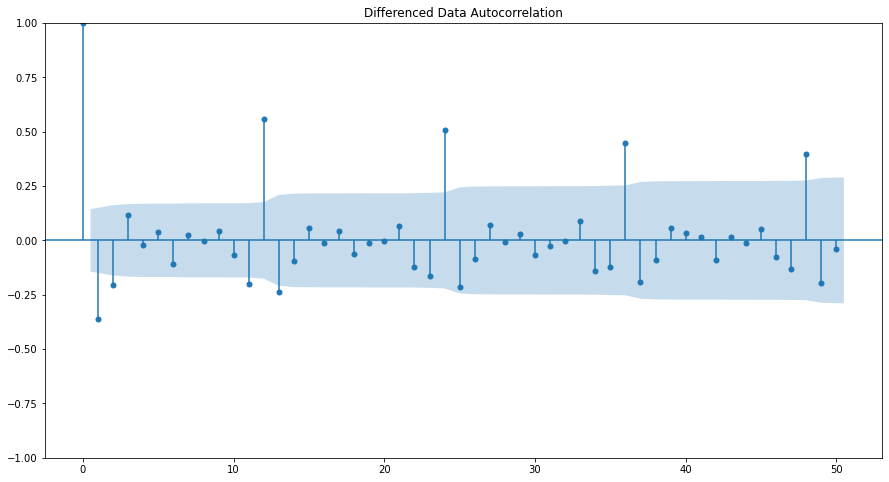

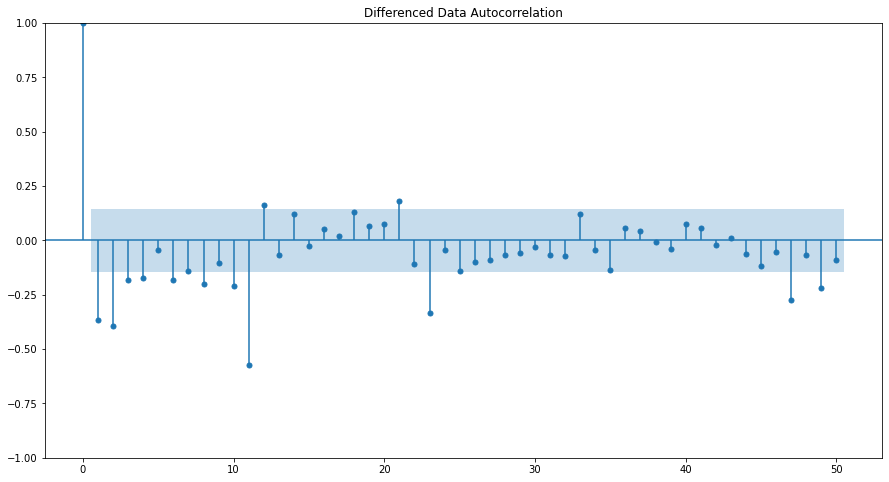

In [227]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


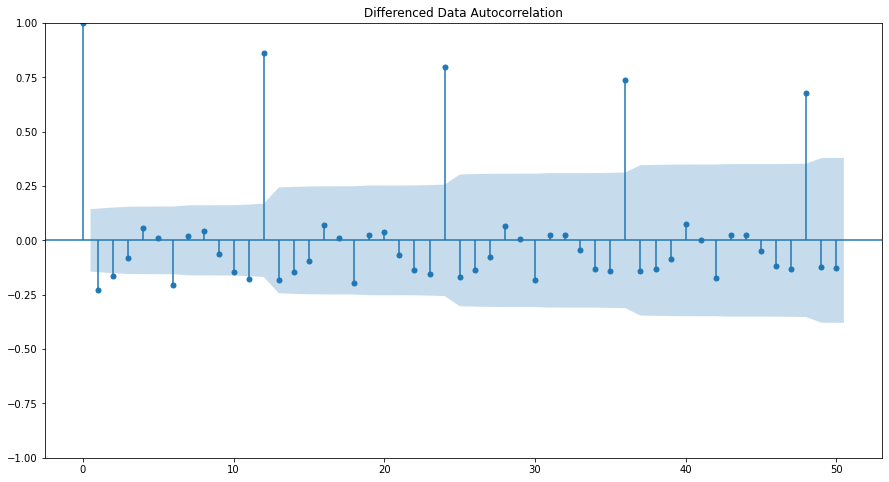

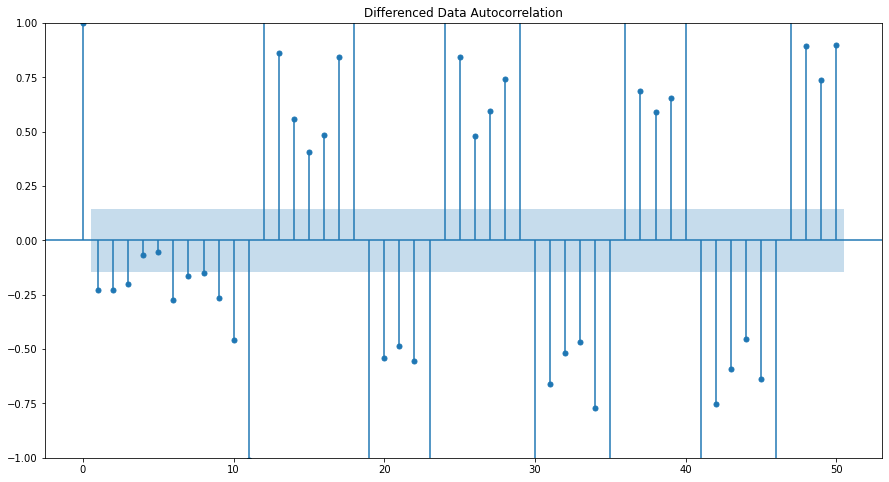

In [228]:
plot_acf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_spar['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

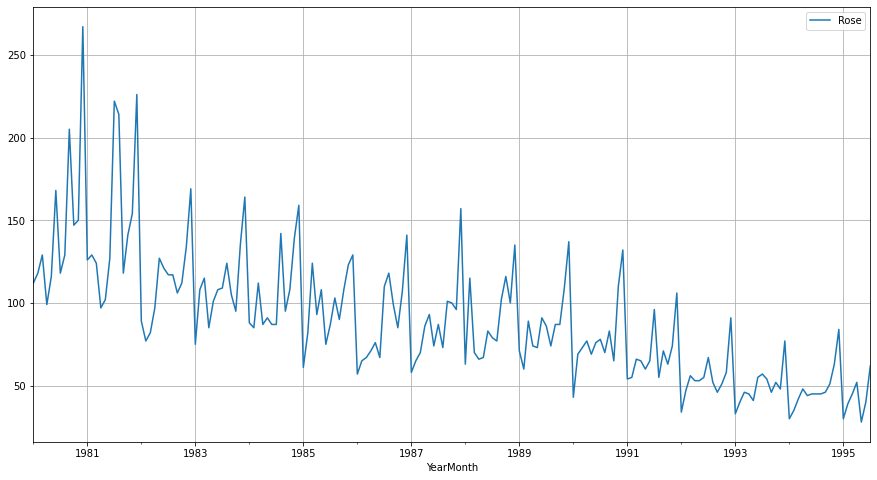

In [229]:
df_rose.plot()
plt.grid();

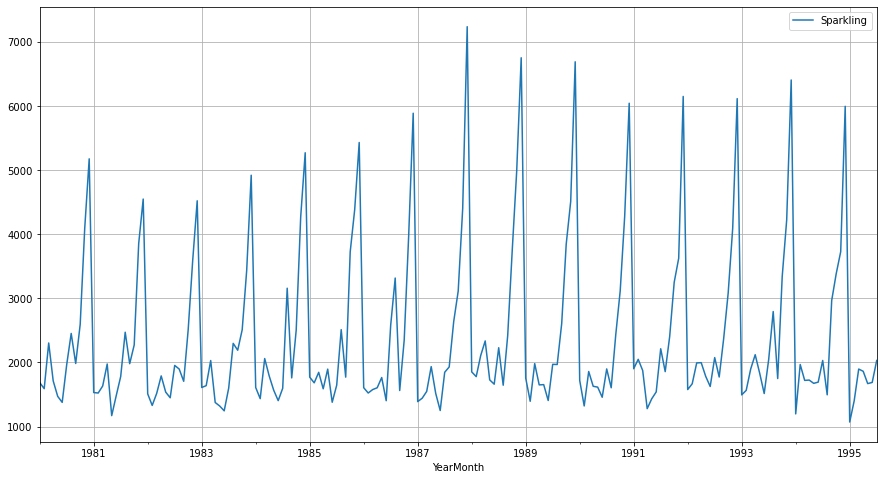

In [230]:
df_spar.plot()
plt.grid();

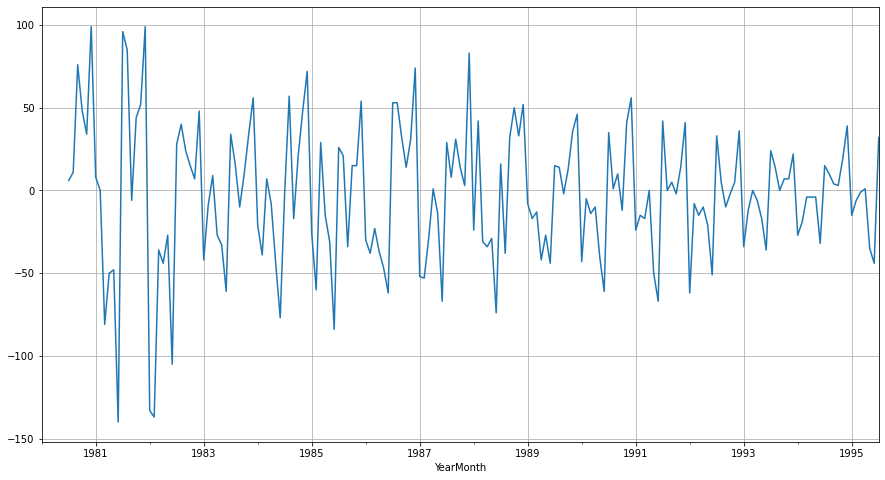

In [231]:
(df_rose['Rose'].diff(6)).plot()
plt.grid();

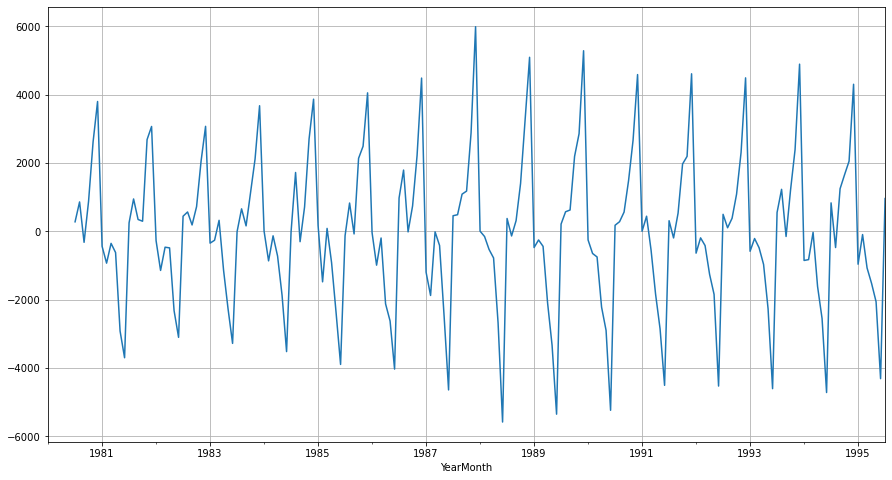

In [232]:
(df_spar['Sparkling'].diff(6)).plot()
plt.grid();

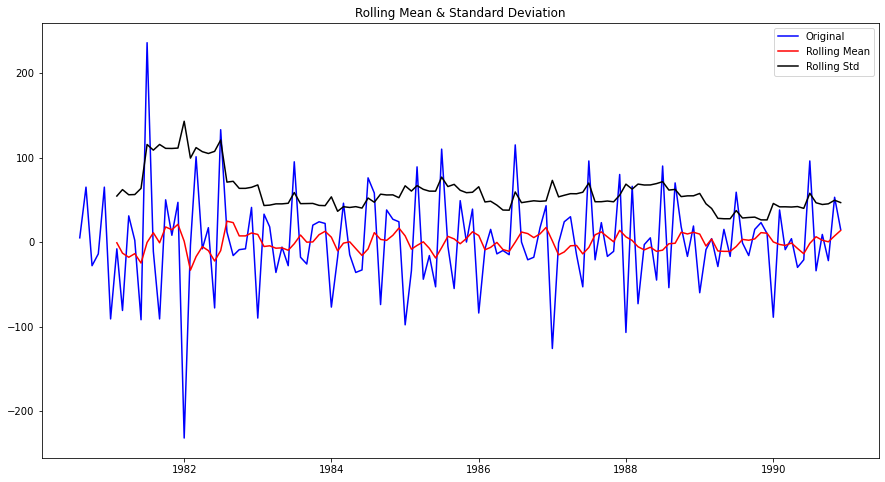

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [233]:
test_stationarity((train_rose['Rose'].diff(6).dropna()).diff(1).dropna())

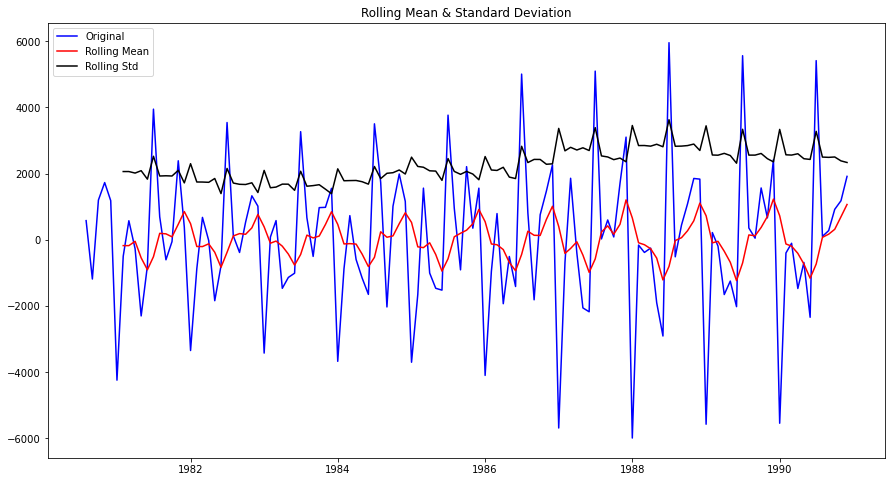

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [234]:
test_stationarity((train_spar['Sparkling'].diff(6).dropna()).diff(1).dropna())

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


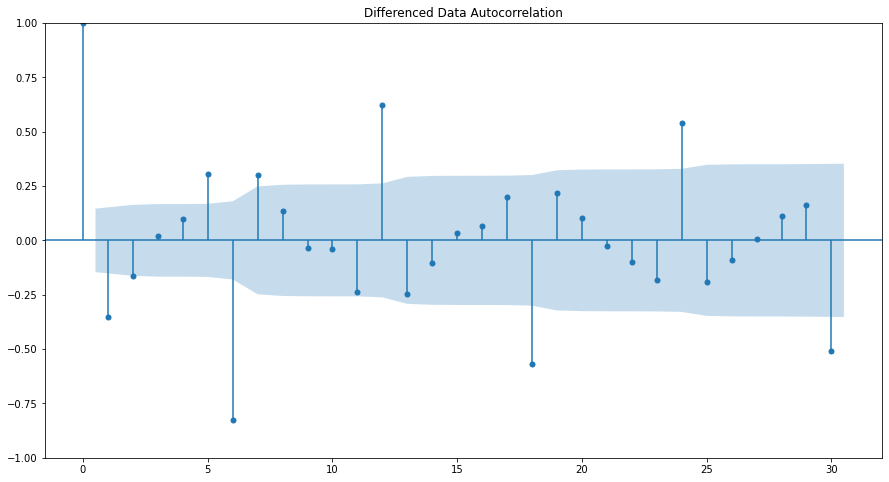

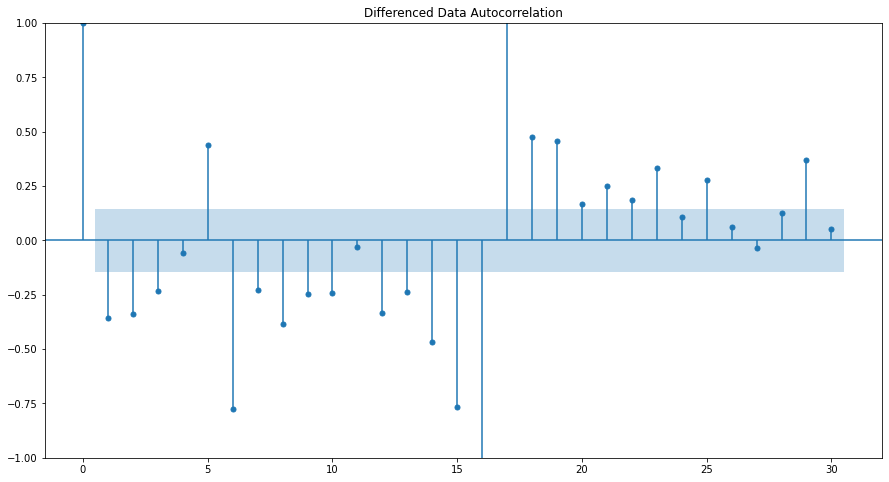

In [235]:
plot_acf(df_rose['Rose'].diff(6).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff(6).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


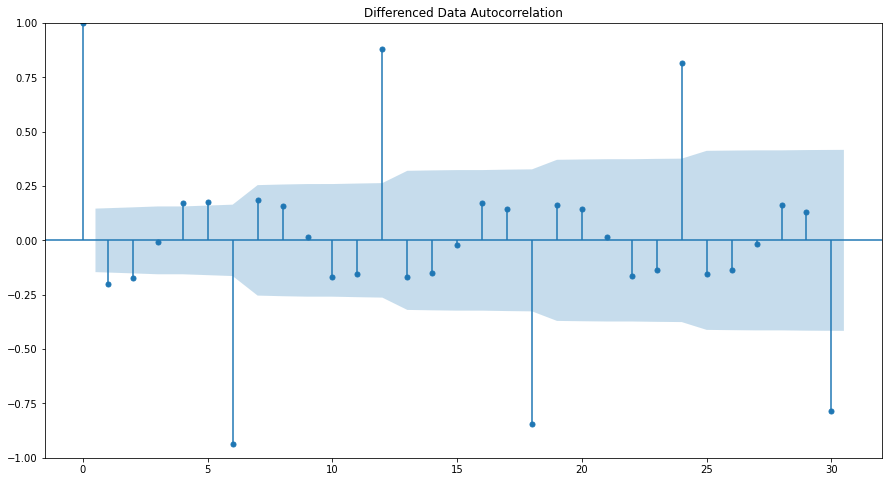

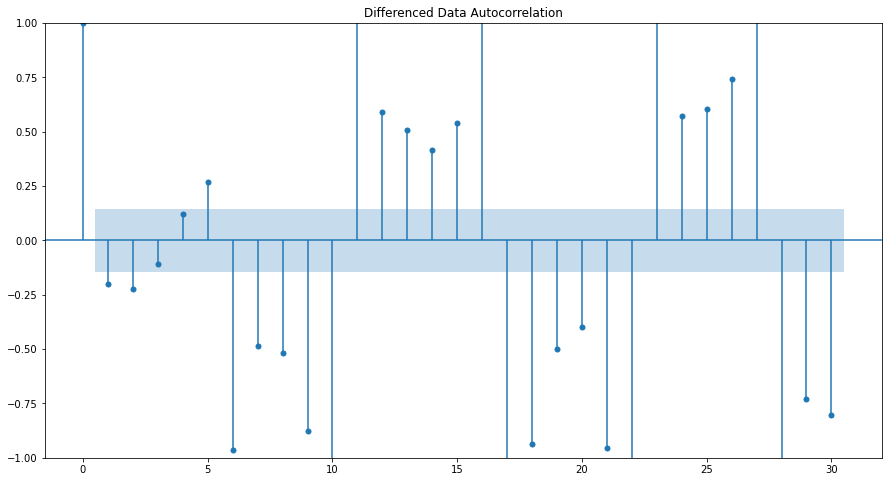

In [236]:
plot_acf(df_spar['Sparkling'].diff(6).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df_spar['Sparkling'].diff(6).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

In [237]:

manual_SARIMA_6_r1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_R1 = manual_SARIMA_6_r1.fit(maxiter=1000)
print(results_manual_SARIMA_6_R1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -470.903
Date:                           Sun, 25 Dec 2022   AIC                            959.806
Time:                                   08:30:20   BIC                            984.110
Sample:                                        0   HQIC                           969.664
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7002      0.120     -5.832      0.000      -0.936      -0.465
ar.L2          0.1834      0.105      1.745

In [238]:

manual_SARIMA_6_s2 = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_S2 = manual_SARIMA_6_s2.fit(maxiter=1000)
print(results_manual_SARIMA_6_S2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -824.123
Date:                           Sun, 25 Dec 2022   AIC                           1662.247
Time:                                   08:30:41   BIC                           1681.150
Sample:                                        0   HQIC                          1669.914
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6035      0.155     -3.885      0.000      -0.908      -0.299
ma.L1         -0.1382      0.603     -0.229

In [239]:
predicted_manual_SARIMA_6_R1 = results_manual_SARIMA_6_R1.get_forecast(steps=len(test_rose))
predicted_manual_SARIMA_6_S1 = results_manual_SARIMA_6_S2.get_forecast(steps=len(test_spar))

In [240]:
predicted_manual_SARIMA_6_R1.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  52.076909  16.825373      19.099784      85.054034
1  63.312161  17.852864      28.321189      98.303132
2  70.201333  17.886013      35.145392     105.257274
3  67.250537  18.062287      31.849105     102.651970
4  73.234183  18.073277      37.811210     108.657155

In [241]:
predicted_manual_SARIMA_6_S1.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1450.891569  431.768803     604.640265    2297.142872
1  1401.609302  446.937946     525.627024    2277.591579
2  1735.902607  451.349019     851.274786    2620.530429
3  1530.783374  453.539051     641.863169    2419.703579
4  1536.498097  453.976457     646.720592    2426.275602

In [242]:
rmse_R =metrics.mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_6_R1.predicted_mean,squared=False)
print(rmse_R)

18.64929301210865


In [243]:
rmse_S =metrics.mean_squared_error(test_spar['Sparkling'],predicted_manual_SARIMA_6_S1.predicted_mean,squared=False)
print(rmse_S)

334.81531010402495


In [244]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['SARIMA(2,1,2)(2,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

temp_resultsDf = pd.DataFrame({'Test RMSE-Sparkling': [rmse_S]}
                           ,index=['SARIMA(1,1,2)(1,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   
ARIMA_S(1,1,2)                                                 NaN   
SARIMA(0,1,2)(1,1,2,6)                                   18.444903   
SARIMA(0,1,2)(2,1,2,12)                                  16.519152   
SARIMA(1,1,2)(0,1,2,12)                                        NaN   
SARIMA(2,1,2)(2,1,2,6)                                   18.649293   
SARIMA(1,1,2)(1,1,2,6)                                         NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN  
ARIMA_S(1,1,2)                                              1316.597320  
SARIMA(0,1,2)(1,1,2,6)                                       558.345168  
SARIMA(0,1,2)(2,1,2,12)                                             NaN  
SARIMA(1,1,2)(0,1,2,12)                                      382.576754  
SARIMA(2,1,2)(2,1,2,6)                                              NaN  
SARIMA(1,1,2)(1,1,2,6)                                       334.815310

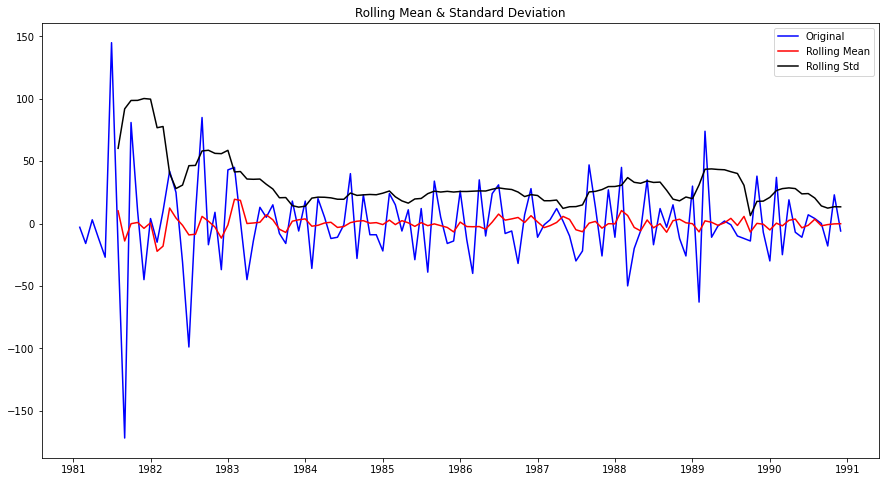

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [245]:
test_stationarity((train_rose['Rose'].diff(12).dropna()).diff(1).dropna())

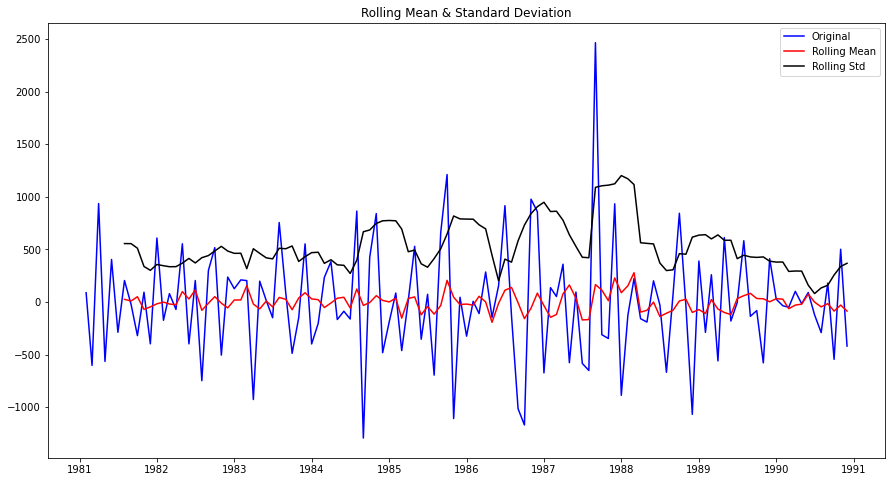

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [246]:
test_stationarity((train_spar['Sparkling'].diff(12).dropna()).diff(1).dropna())

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


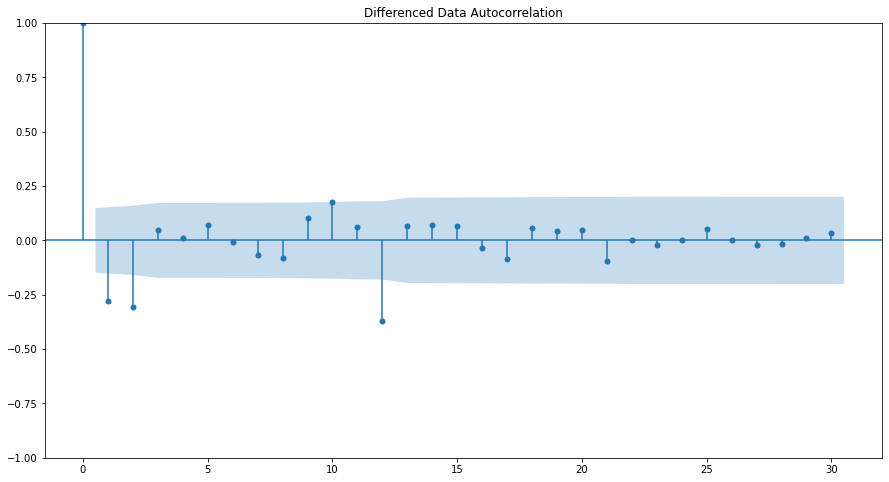

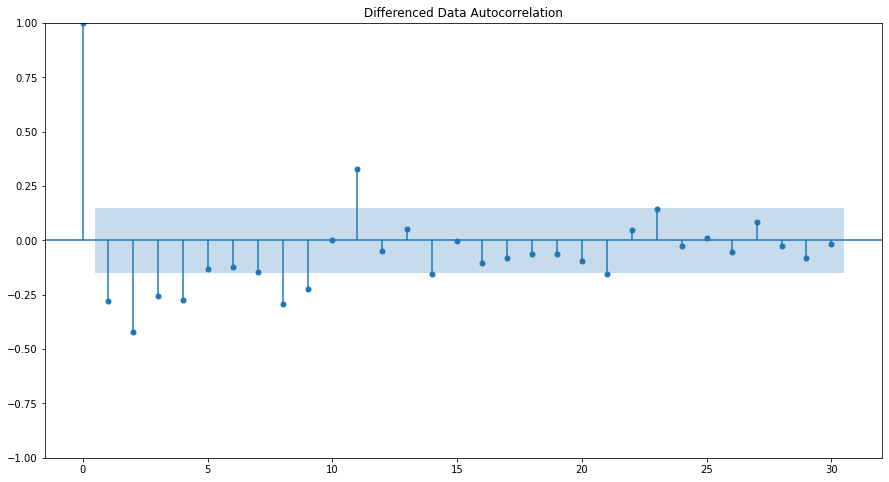

In [247]:
plot_acf(df_rose['Rose'].diff(12).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff(12).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

E:\Anaconda-GL\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


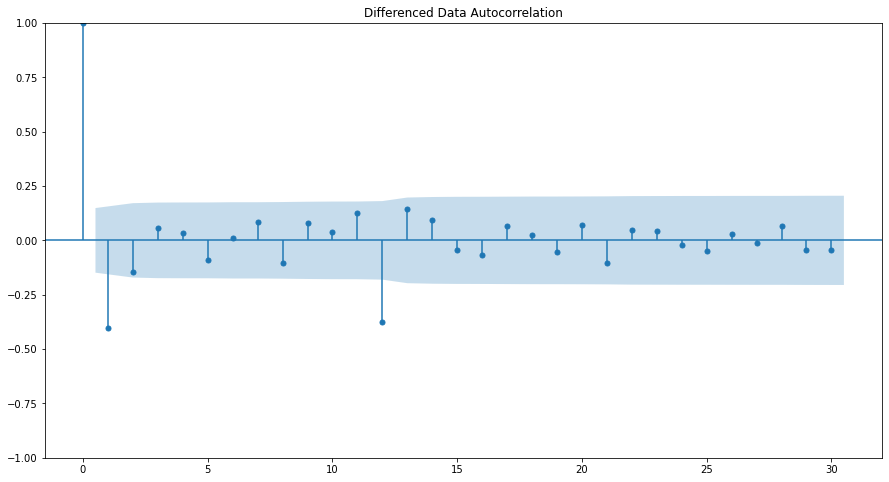

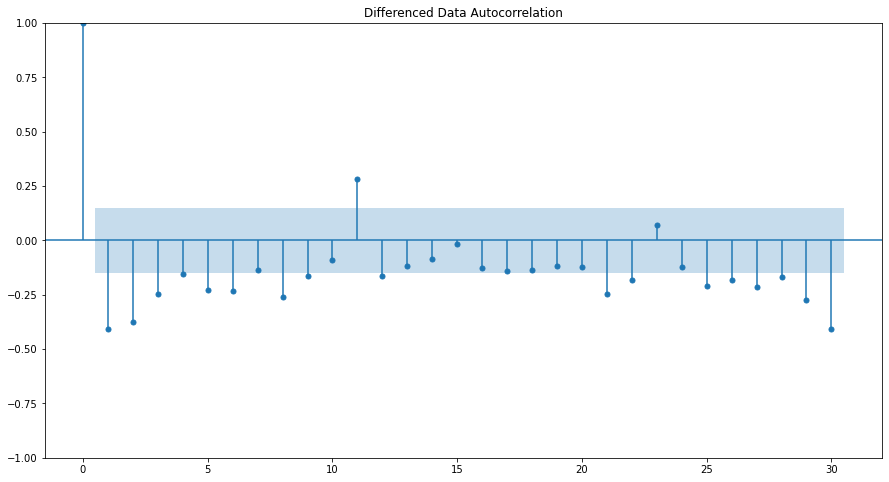

In [248]:
plot_acf(df_spar['Sparkling'].diff(12).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df_spar['Sparkling'].diff(12).dropna().diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

In [249]:

manual_SARIMA_6_r1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_R1 = manual_SARIMA_6_r1.fit(maxiter=1000)
print(results_manual_SARIMA_6_R1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 25 Dec 2022   AIC                            776.996
Time:                                    08:35:06   BIC                            799.692
Sample:                                         0   HQIC                           786.156
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.837      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [250]:

manual_SARIMA_6_s2 = sm.tsa.statespace.SARIMAX(train_spar['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2,12 ),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_S2 = manual_SARIMA_6_s2.fit(maxiter=1000)
print(results_manual_SARIMA_6_S2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -685.069
Date:                            Sun, 25 Dec 2022   AIC                           1384.138
Time:                                    08:35:30   BIC                           1401.790
Sample:                                         0   HQIC                          1391.263
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5751      0.285     -2.017      0.044      -1.134      -0.016
ma.L1         -0.1375      0.238   

In [251]:
predicted_manual_SARIMA_6_R1 = results_manual_SARIMA_6_R1.get_forecast(steps=len(test_rose))
predicted_manual_SARIMA_6_S1 = results_manual_SARIMA_6_S2.get_forecast(steps=len(test_spar))

In [252]:
predicted_manual_SARIMA_6_R1.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  43.036160  14.001039      15.594628      70.477692
1  64.087674  14.167087      36.320693      91.854654
2  66.204964  14.185589      38.401721      94.008208
3  64.057423  14.289680      36.050166      92.064680
4  65.402944  14.291608      37.391907      93.413981

In [253]:
predicted_manual_SARIMA_6_S1.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1448.252119  413.055769     638.677689    2257.826550
1  1382.600305  429.778792     540.249351    2224.951259
2  1726.005802  430.040382     883.142141    2568.869463
3  1642.443563  434.473056     790.892021    2493.995104
4  1505.421954  434.832507     653.165902    2357.678007

In [254]:
rmse_R =metrics.mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_6_R1.predicted_mean,squared=False)
print(rmse_R)

16.56977454263984


In [255]:
rmse_S =metrics.mean_squared_error(test_spar['Sparkling'],predicted_manual_SARIMA_6_S1.predicted_mean,squared=False)
print(rmse_S)

401.5157303347378


In [256]:
temp_resultsDf = pd.DataFrame({'Test RMSE-Rose': [rmse_R]}
                           ,index=['SARIMA(2,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

temp_resultsDf = pd.DataFrame({'Test RMSE-Sparkling': [rmse_S]}
                           ,index=['SARIMA(1,1,1)(1,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE-Rose  \
RegressionOnTime                                         51.451050   
NaiveModel                                               79.738550   
SimpleAverageModel                                       79.738550   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Alpha=0.0987,SimpleExponentialSmoothing                  36.816905   
Alpha=0.0496,SimpleExponentialSmoothing                        NaN   
Alpha=0.1,SimpleExponentialSmoothing                     36.848694   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.591922   
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...       20.359346   
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...             NaN   
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.158543   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...             NaN   
ARIMA_R(0,1,2)                                           37.327049   
ARIMA_S(0,1,0)                                                 NaN   
ARIMA_R(2,1,2)                                           36.891832   
ARIMA_S(1,1,2)                                                 NaN   
SARIMA(0,1,2)(1,1,2,6)                                   18.444903   
SARIMA(0,1,2)(2,1,2,12)                                  16.519152   
SARIMA(1,1,2)(0,1,2,12)                                        NaN   
SARIMA(2,1,2)(2,1,2,6)                                   18.649293   
SARIMA(1,1,2)(1,1,2,6)                                         NaN   
SARIMA(2,1,2)(2,1,2,12)                                  16.569775   
SARIMA(1,1,1)(1,1,2,12)                                        NaN   

                                                    Test RMSE-Sparkling  
RegressionOnTime                                            1275.867052  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Alpha=0.0987,SimpleExponentialSmoothing                             NaN  
Alpha=0.0496,SimpleExponentialSmoothing                     1316.034674  
Alpha=0.1,SimpleExponentialSmoothing                        1375.393398  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               1375.393398  
Alpha=0.070,Beta=0.046,Gamma=4.039,TripleExpone...                  NaN  
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...           402.946854  
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...                  NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           361.397300  
ARIMA_R(0,1,2)                                                      NaN  
ARIMA_S(0,1,0)                                              3864.279352  
ARIMA_R(2,1,2)                                                      NaN  
ARIMA_S(1,1,2)                                              1316.597320  
SARIMA(0,1,2)(1,1,2,6)                                       558.345168  
SARIMA(0,1,2)(2,1,2,12)                                             NaN  
SARIMA(1,1,2)(0,1,2,12)                                      382.576754  
SARIMA(2,1,2)(2,1,2,6)                                              NaN  
SARIMA(1,1,2)(1,1,2,6)                                       334.815310  
SARIMA(2,1,2)(2,1,2,12)                                             NaN  
SARIMA(1,1,1)(1,1,2,12)                                      401.515730

Optimum model - Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing	for Rose wine type 

SARIMA(1,1,2)(0,1,2,12)	 for Sparkling wine type

## Rose Full data model

In [288]:
Full_data_TES_model = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

In [289]:
Full_data_TES_model_autofit = Full_data_TES_model.fit()
Full_data_TES_model_autofit.params

{'smoothing_level': 0.1085442615083252,
 'smoothing_trend': 0.00035305958995097134,
 'smoothing_seasonal': 0.00030368775984986746,
 'damping_trend': nan,
 'initial_level': 154.61229276088991,
 'initial_trend': -0.5872612637752833,
 'initial_seasons': array([0.69714586, 0.79188247, 0.87353567, 0.78042928, 0.85300048,
        0.9240249 , 1.03699927, 1.06860988, 1.00864439, 0.99752867,
        1.15753702, 1.59557529]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [290]:
## Prediction on the next 12 months data

Predicted_Rose_full_data  = Full_data_TES_model_autofit.forecast(steps=12)
Predicted_Rose_full_data.head(12)

1995-08-01    47.582258
1995-09-01    44.331039
1995-10-01    43.260058
1995-11-01    49.520605
1995-12-01    67.320363
1996-01-01    28.997325
1996-02-01    32.482033
1996-03-01    35.320631
1996-04-01    31.107448
1996-05-01    33.483025
1996-06-01    35.728600
1996-07-01    39.489194
Freq: MS, dtype: float64

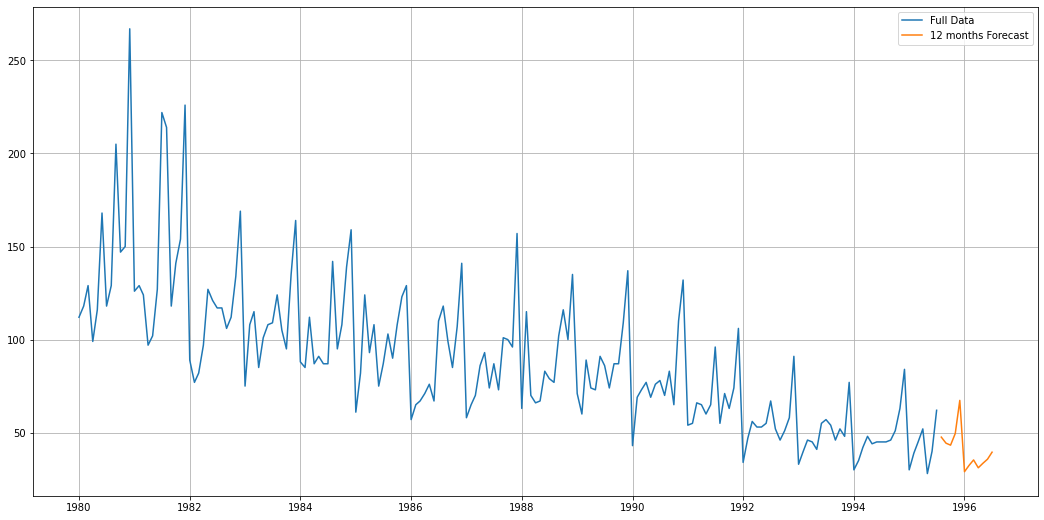

In [291]:
## Plotting on both the Full data and 12 month forecast

plt.figure(figsize=(18,9))
plt.plot(df_rose['Rose'], label='Full Data')
plt.plot(Predicted_Rose_full_data, label='12 months Forecast')
plt.legend(loc='best')
plt.grid();

In [292]:
Full_data_TES_model1 = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='additive',freq='MS')

In [293]:
Full_data_TES_model_autofit = Full_data_TES_model1.fit()
Full_data_TES_model_autofit.params

{'smoothing_level': 0.09975582414083434,
 'smoothing_trend': 3.483355109599214e-06,
 'smoothing_seasonal': 0.00027836216636327953,
 'damping_trend': nan,
 'initial_level': 145.90851281528234,
 'initial_trend': -0.5370049113512577,
 'initial_seasons': array([-28.03787585, -17.191594  ,  -9.08884092, -15.76473027,
        -11.87214613,  -5.88935796,   5.34994533,   5.33882632,
          2.72986795,   1.98164943,  17.10578897,  55.9019769 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [295]:
## Prediction on the next 12 months data

Predicted_Rose_full_data  = Full_data_TES_model_autofit.forecast(steps=12)
Predicted_Rose_full_data.head(12)

1995-08-01    50.132262
1995-09-01    46.986428
1995-10-01    45.701327
1995-11-01    60.288510
1995-12-01    98.547665
1996-01-01    14.070885
1996-02-01    24.380181
1996-03-01    31.945905
1996-04-01    24.733174
1996-05-01    28.088762
1996-06-01    33.534757
1996-07-01    44.233175
Freq: MS, dtype: float64

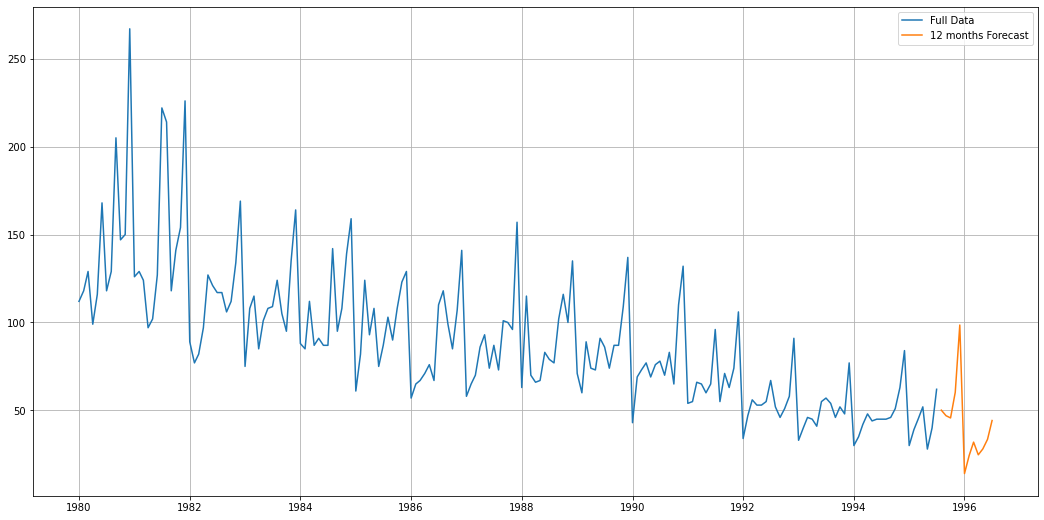

In [296]:
## Plotting on both the Full data and 12 month forecast

plt.figure(figsize=(18,9))
plt.plot(df_rose['Rose'], label='Full Data')
plt.plot(Predicted_Rose_full_data, label='12 months Forecast')
plt.legend(loc='best')
plt.grid();

## Sparkling full data model

In [257]:
full_data_model = sm.tsa.statespace.SARIMAX(df_spar['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda-GL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1086.479
Date:                            Sun, 25 Dec 2022   AIC                           2186.959
Time:                                    08:52:16   BIC                           2207.892
Sample:                                01-01-1980   HQIC                          2195.464
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5964      0.337     -1.772      0.076      -1.256       0.063
ma.L1         -0.2476      0.307   

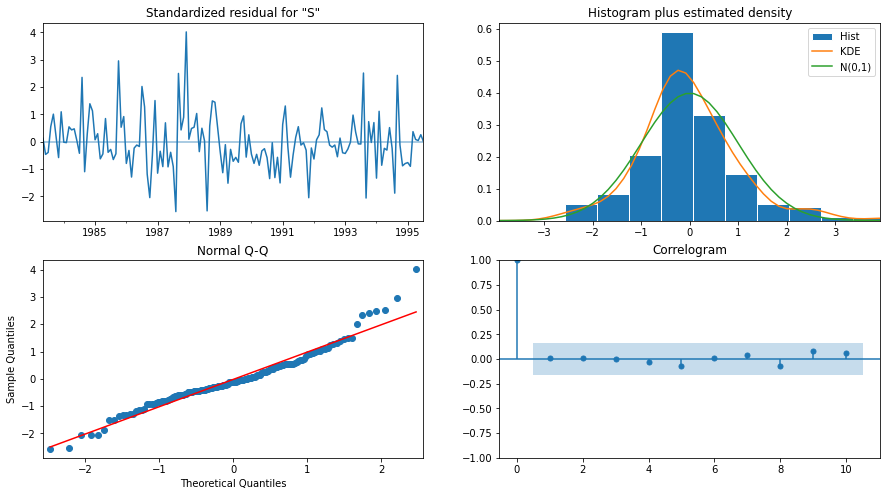

In [258]:
results_full_data_model.plot_diagnostics();

In [259]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [260]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1876.060647  389.457904    1112.737182    2639.384113
1995-09-01  2478.217110  394.168624    1705.660804    3250.773416
1995-10-01  3293.555584  394.318119    2520.706272    4066.404896
1995-11-01  3933.325337  395.602520    3157.958646    4708.692027
1995-12-01  6132.783764  395.653854    5357.316460    6908.251067

In [261]:
rmse = metrics.mean_squared_error(df_spar['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 554.1755090066108


In [262]:
df_spar.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [263]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-06-01', freq='MS'))

In [264]:
pred_full_manual_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-07-01  1876.060647  389.457904    1112.737182    2639.384113
1995-08-01  2478.217110  394.168624    1705.660804    3250.773416
1995-09-01  3293.555584  394.318119    2520.706272    4066.404896
1995-10-01  3933.325337  395.602520    3157.958646    4708.692027
1995-11-01  6132.783764  395.653854    5357.316460    6908.251067
1995-12-01  1244.081710  396.241414     467.462809    2020.700610
1996-01-01  1582.434484  396.438804     805.428707    2359.440261
1996-02-01  1836.383355  396.843319    1058.584743    2614.181968
1996-03-01  1819.012343  397.115073    1040.681102    2597.343583
1996-04-01  1664.539905  397.462382     885.527950    2443.551859
1996-05-01  1615.814946  397.763140     836.213517    2395.416375
1996-06-01  2016.543329  398.090836    1236.299627    2796.787031

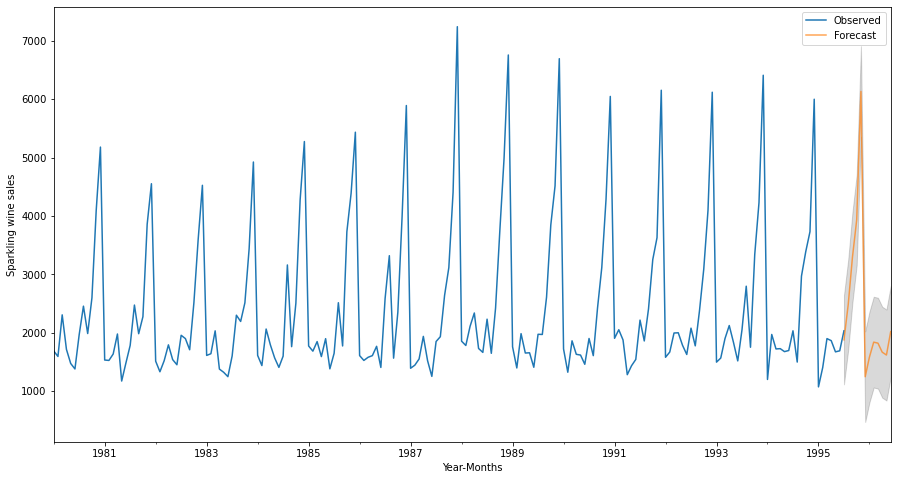

In [265]:
# plot the forecast along with the confidence band

axis = df_spar['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling wine sales')
plt.legend(loc='best')
plt.show()